<div class="alert alert-block alert-info">
    
# The Smith Parasite
    
</div>

<a id = "toc"></a>

1. [Introduction](#introduction)
2. [Exploration](#exploration)
3. [Preprocessing](#preprocessing) 
4. [Feature selection](#feature-selection)
5. [Modelling](#modelling)
6. [Assessment](#assessment)

<div class="alert alert-block alert-success"> <a id = "introduction"></a>
    
## 1. Introduction

- [1.1. Import the needed libraries](#import-libraries)
- [1.2. Import the datasets](#import-datasets)
- [1.3. Copy the datasets](#copy-datasets)

[Back to TOC](#toc)

`INPUT VARIABLES`: numerical and categorical <br>
`OUTPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Answer the question “Who are the people more likely to suffer from the Smith Parasite?”.

<a id = "import-libraries"></a>

### 1.1. Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, ElasticNet, RidgeClassifier
from sklearn.feature_selection import RFE, mutual_info_classif, f_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from datetime import date
import time
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats
from scipy.stats import chi2_contingency, kendalltau
from scipy.spatial.distance import jaccard
import graphviz
import pydotplus

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style = 'whitegrid')

<a id = "import-datasets"></a>

### 1.2. Import the datasets

In [2]:
# importing the training datasets

train_demo = pd.read_excel(r'./data/train_demo.xlsx', sheet_name = 'Sheet1')
train_habits = pd.read_excel(r'./data/train_habits.xlsx', sheet_name = 'Sheet1')
train_health = pd.read_excel(r'./data/train_health.xlsx', sheet_name = 'Sheet1')

In [3]:
# setting the indexes as the PatientID on all datasets

train_demo.set_index('PatientID', inplace = True)
train_habits.set_index('PatientID', inplace = True)
train_health.set_index('PatientID', inplace = True)

In [4]:
# then concatenating the datasets into one, by the indexes, to have all the information needed into one Pandas Dataframe

train = pd.concat([train_demo, train_habits, train_health], axis = 1)
train.head(3)

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       High School Incomplete (10th to 11th grade)        1            No   
1805       High School Incomplete (10th to 11th grade)        1            No   
1557              Elementary School (1st to 9th grade)        1            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1167                     Between one liter and two liters     155      67   
1805                     Between one liter and two liters     173      88   
1557       More than half a liter but less than one liter     162      68   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1167                    358             120             21                2   
1805                    230             142              9                0   
1557                    226             122             26                0   

                     Checkup                                          Diabetes  
PatientID                                                                       
1167       More than 3 years  Neither I nor my immediate family have diabetes.  
1805                Not sure  Neither I nor my immediate family have diabetes.  
1557       More than 3 years  Neither I nor my immediate family have diabetes.

Then we do the same for the testing dataset.

In [5]:
# importing the test datasets

test_demo = pd.read_excel(r'./data/test_demo.xlsx', sheet_name = 'Sheet1')
test_habits = pd.read_excel(r'./data/test_habits.xlsx', sheet_name = 'Sheet1')
test_health = pd.read_excel(r'./data/test_health.xlsx', sheet_name = 'Sheet1')

In [6]:
# setting the indexes as the PatientID on all datasets

test_demo.set_index('PatientID', inplace = True)
test_habits.set_index('PatientID', inplace = True)
test_health.set_index('PatientID', inplace = True)

In [7]:
# then we concatenate the datasets into one, by the indexes

test = pd.concat([test_demo, test_habits, test_health], axis = 1)
test.head(3)

Name  Birth_Year                    Region  \
PatientID                                                                
1343         Mr. Ricardo Sherman        1970             East Midlands   
1727       Mr. Jessie Strickland        1966  Yorkshire and the Humber   
1828          Mr. Robert Foreman        1978             West Midlands   

                                             Education Smoking_Habit  \
PatientID                                                              
1343              Elementary School (1st to 9th grade)           Yes   
1727             University Complete (3 or more years)            No   
1828       High School Incomplete (10th to 11th grade)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1343       I usually consume alcohol every day       No   
1727        I consider myself a social drinker       No   
1828       I usually consume alcohol every day      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1343       Less than 1. I do not consume fruits every day.   
1727       Less than 1. I do not consume fruits every day.   
1828       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1343                     Between one liter and two liters     172      80   
1727       More than half a liter but less than one liter     171      80   
1828                     Between one liter and two liters     171      78   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1343                    203             172             20                2   
1727                    225             130             21                0   
1828                    237             130             24                1   

                     Checkup  \
PatientID                      
1343                Not sure   
1727                Not sure   
1828       More than 3 years   

                                                    Diabetes  
PatientID                                                     
1343       I have/had pregnancy diabetes or borderline di...  
1727                                      I do have diabetes  
1828       I have/had pregnancy diabetes or borderline di...

<a id = "copy-datasets"></a>

### 1.3. Copy the datasets

In [8]:
# we should keep a copy of our original datasets in case we make some permanent modifications that we should not have done

train_original = train.copy()
test_original = test.copy()

<div class="alert alert-block alert-success"> <a id = "exploration"></a>
    
## 2. Exploration

- [2.1. Variable types](#variable-types)
- [2.2. Descriptive statistics](#descriptive-statistics)
- [2.3. Visualizations](#visualizations)
    - [2.3.1. Histograms](#histograms)
    - [2.3.2. Box plots](#box-plots)
    - [2.3.3. Numerical variables relationships](#numerical-relationships)
    - [2.3.4. Bar plots](#bar-plots)
    - [2.3.5. Variables vs. target](#variables-vs-target)
    
[Back to TOC](#toc)

Firstly, we start by checking the shape of our dataset.

In [9]:
train.shape

(800, 18)

<a id = "variable-types"></a>

### 2.1. Variable types

In [10]:
# checking the data types of the variables of the training dataset and if there are any missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

From this information, we can see that variable `Education` has missing values.

We also see that `Smoking_Habit` is stored as a string, and not as a binary variable (since it is the answer of a yes/no question). The same happens with `Exercise`.

<a id = "descriptive-statistics"></a>

### 2.2. Descriptive statistics

In [11]:
# getting the main descriptive statistics only for the numerical variables

train.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

The first problem we can see is the minimum value of the variable `Age`. 1855 seems like an outlier, since the Smith Parasite is a recently discovered parasite, so we should expect the people from our dataset to be alive in 2022.

Looking at the `High_Cholesterol` maximum value, we can see that it is far away from the third quartile, so probabily we are in the presence of an outlier (maybe error of measurment, since the normal range of the cholesterol in blood is <200).

For the `Blood_Pressure` maximum value, we also can see that maybe there was some measurment error of this variable, since 200 is a high value for blood pressure in rest (the medical normal range is 90-120, and it is considered elevated in the range 140-180)

In [12]:
# getting the main descriptive statistics for the remaining cathegorical variables

train.describe(include = ['O']).T

count unique                                               top  \
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   

               freq  
Name              2  
Region          154  
Education       239  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364  
Checkup         429  
Diabetes        392

Another problem we can notice in this data set is the repetition of a `Name` (Mr. Gary Miller appears twice), so we should check for duplicates in our dataset.

Again we see that the variable `Education` has missing values. We also can see the mode of each cathegorical variable (this is, the value that appears the most in the dataset).

In [13]:
# checking duplicate observations

train.duplicated().sum()

0

Since there are no duplicate rows in our training dataset, we should assume that there are two patients with the same name, but different IDs and different information as we can see in the cell below.

In [14]:
# getting the observations for whose name is 'Mr. Gary Miller'

train[train.loc[:, 'Name'] == 'Mr. Gary Miller']

Name  Birth_Year      Region  \
PatientID                                            
1221       Mr. Gary Miller        1959  North West   
1694       Mr. Gary Miller        1983  South West   

                                       Education  Disease Smoking_Habit  \
PatientID                                                                 
1221       University Complete (3 or more years)        0            No   
1694             I never attended school / Other        0            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1221        I consider myself a social drinker       No   
1694       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1221                     1 to 2 pieces of fruit in average   
1694       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1221                               Less than half a liter     172      65   
1694       More than half a liter but less than one liter     178      61   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1221                    258             130             17                6   
1694                    223             118             15                5   

            Checkup                                          Diabetes  
PatientID                                                              
1221       Not sure  Neither I nor my immediate family have diabetes.  
1694       Not sure  Neither I nor my immediate family have diabetes.

<a id = "visualizations"></a>

### 2.3. Visualizations

The way that we work with metric features is different from the way we deal with the non-metric features, so we need to create lists with the different names of the features and objects with only the information about the types of features that we want.

In [15]:
# creating an object named data that will contain the independent variables and another object named target that will 
# contain the dependent variable/target, in this case 'Disease'.

data = train.drop('Disease', axis = 1)
target = train.loc[:, 'Disease']

In [16]:
# defining metric and non-metric features 

non_metric_features = list(data.select_dtypes(exclude = np.number).set_index(train.index).columns)
metric_features = list(data.select_dtypes(include = np.number).set_index(train.index).columns)

In [17]:
# defining categorical features and ordinal features

categorical_features = ['Region', 'Smoking_Habit', 'Exercise', 'Diabetes', 'Checkup']
ordinal_features = ['Education', 'Drinking_Habit', 'Fruit_Habit', 'Water_Habit']

<a id = "histograms"></a>

#### 2.3.1. Histograms

We can plot all numeric variables' histograms in one figure, to see some insights.

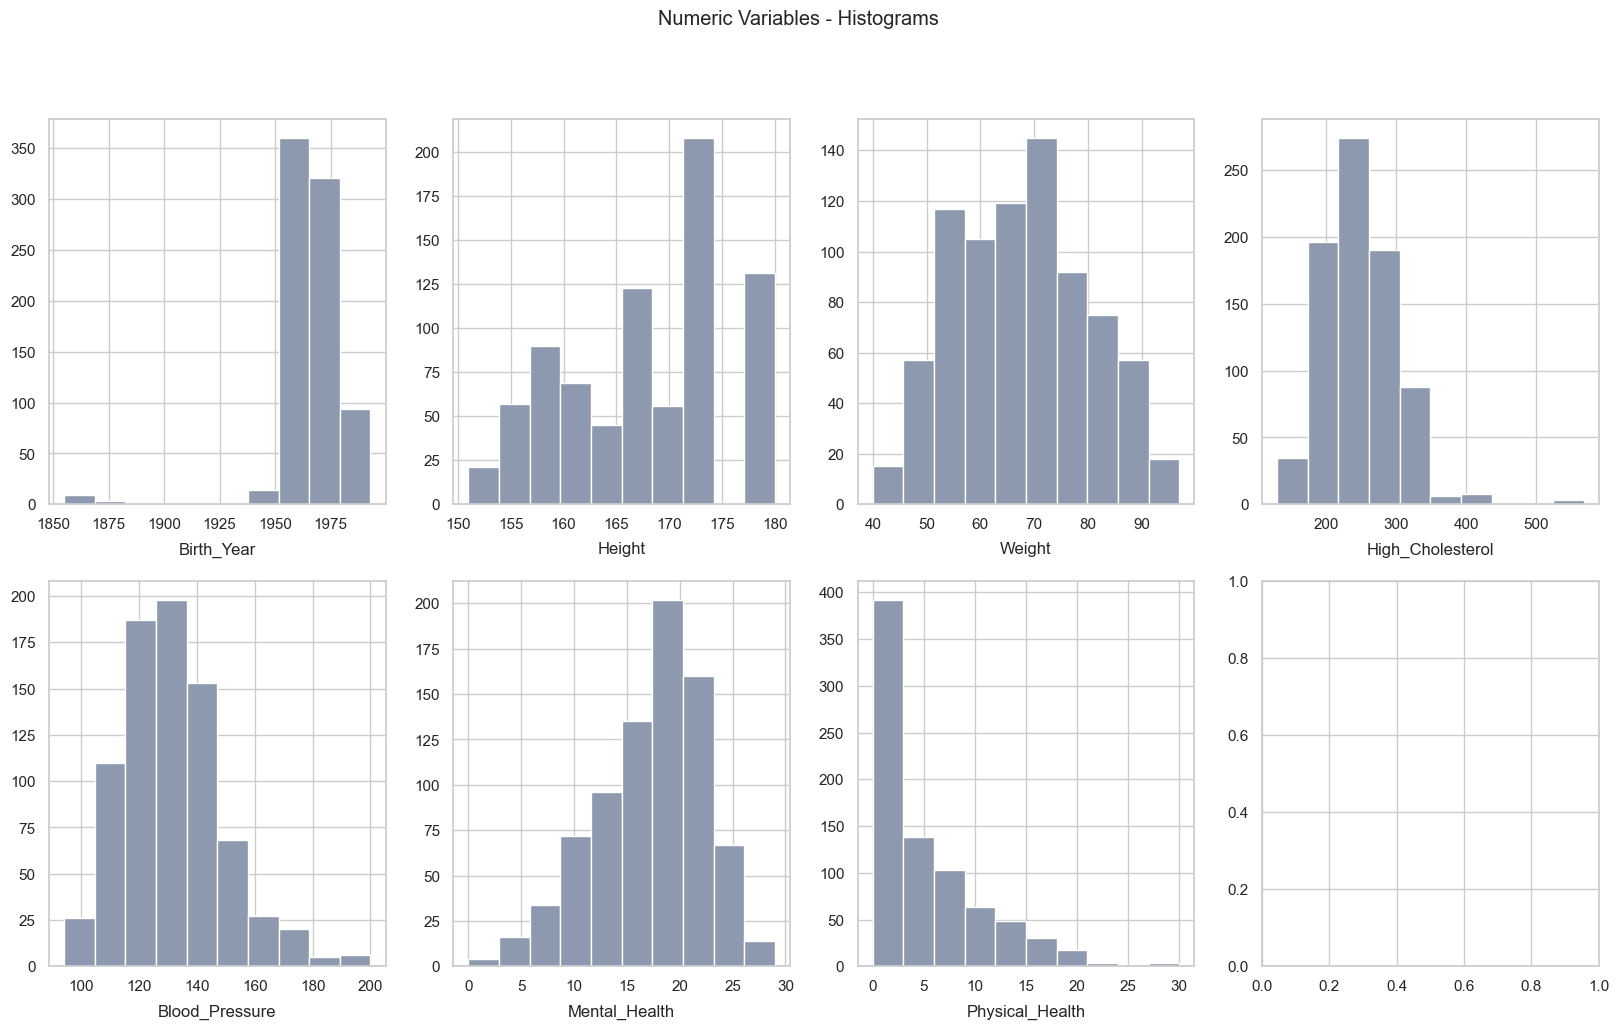

In [18]:
# preparing the figure by creating individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize = (20, 11))

# ploting the data
# iterating across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(train[feat], bins = 10, color = '#8d99ae')
    ax.set_title(feat, y = -0.15)
    
# adding a centered title to the figure:
title = 'Numeric Variables - Histograms'
plt.suptitle(title)

# showing the plot
plt.show()

<a id = "box-plots"></a>

#### 2.3.2. Box plots

And we can also plot all numeric variables' box plots in the same figure.

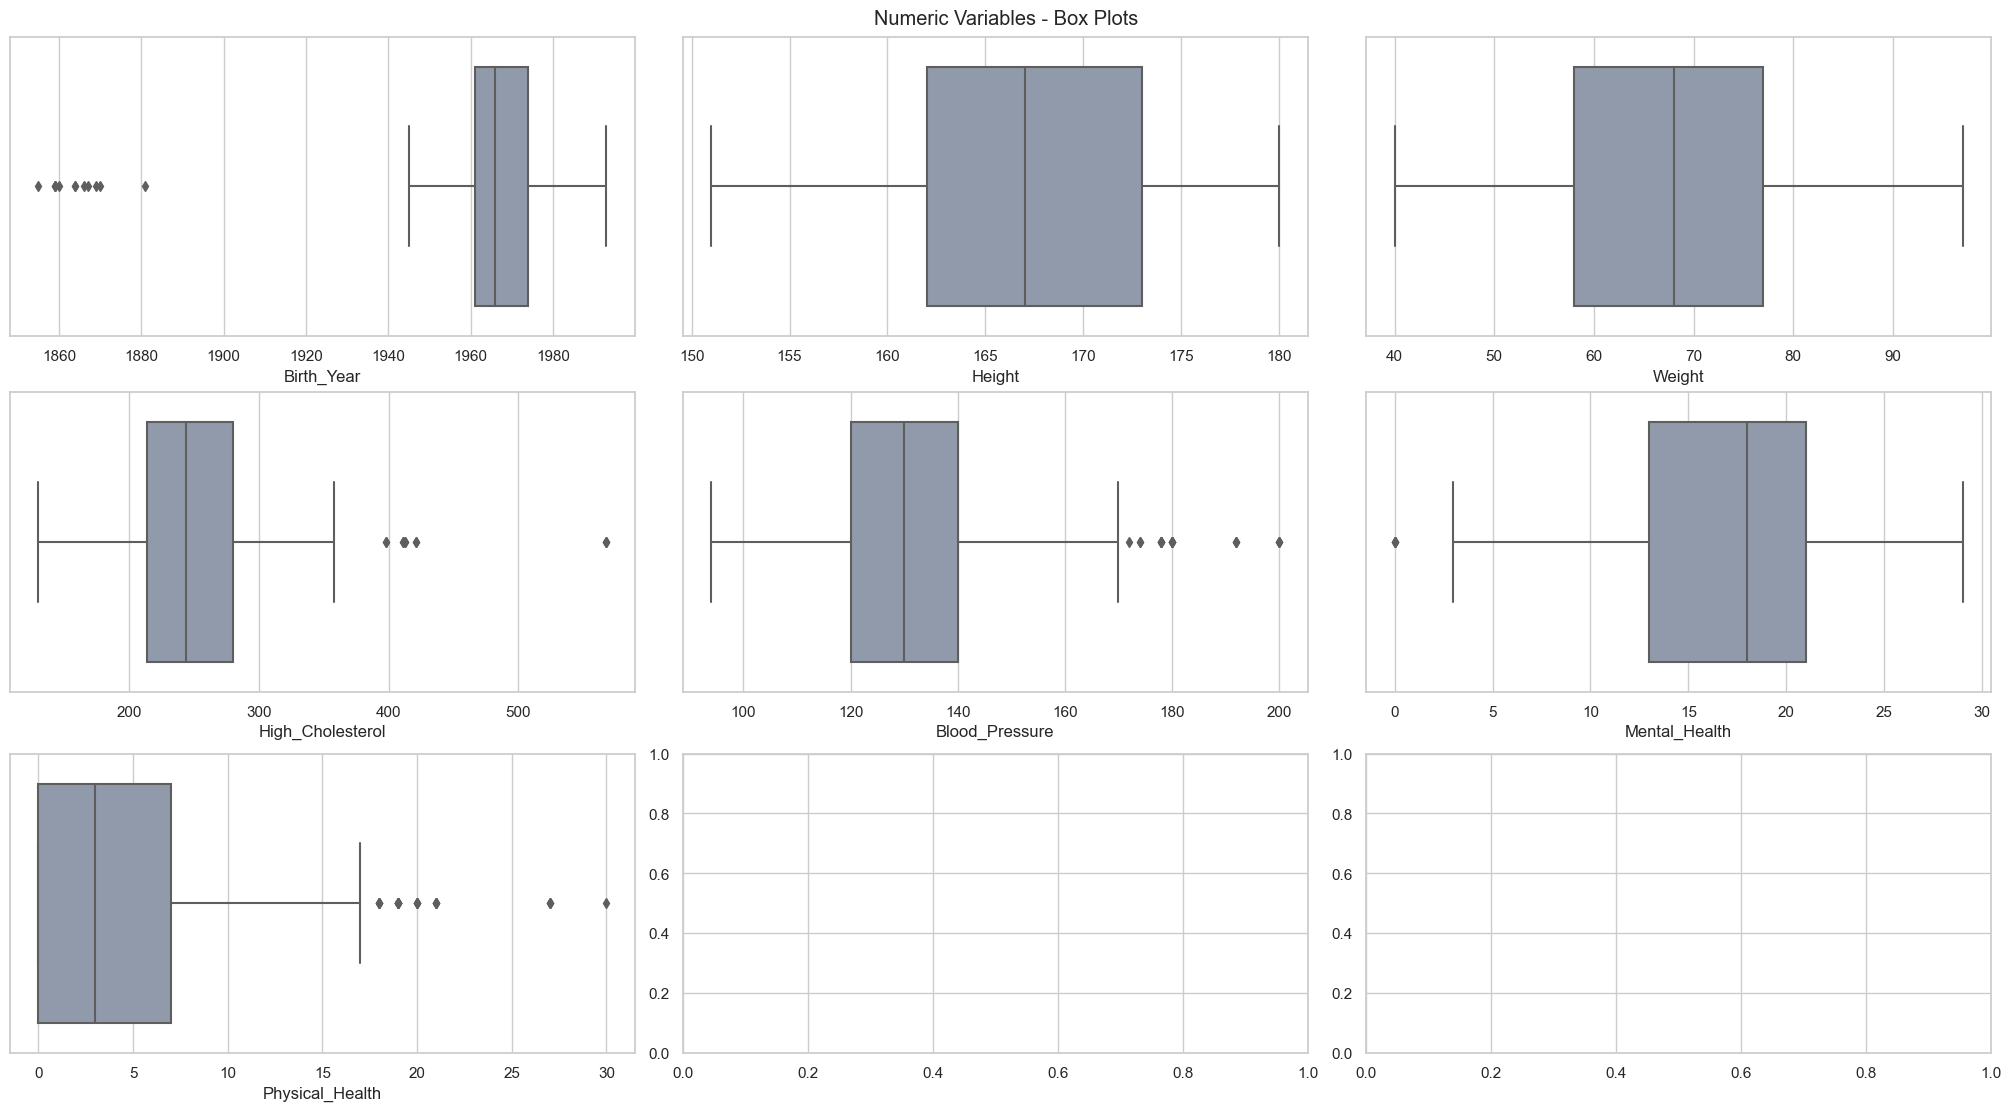

In [19]:
# preparing the figure by creating individual axes where each box-plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize = (20, 11), constrained_layout = True)

# ploting the data
# iterating across axes objects and associate each box-plot:
for ax, feat in zip(axes.flatten(), metric_features):
    chart = sns.boxplot(x = train[feat], ax = ax, color = '#8d99ae', orient = 'h')

# adding a centered title to the figure:
title = 'Numeric Variables - Box Plots'
plt.suptitle(title)

# showing the plot
plt.show()

<a id = "numerical-relationships"></a>

#### 2.3.3. Numerical variables relationships

For numerical variables we can still analyse the the relationship between all variables (to see some correlations, etc.).

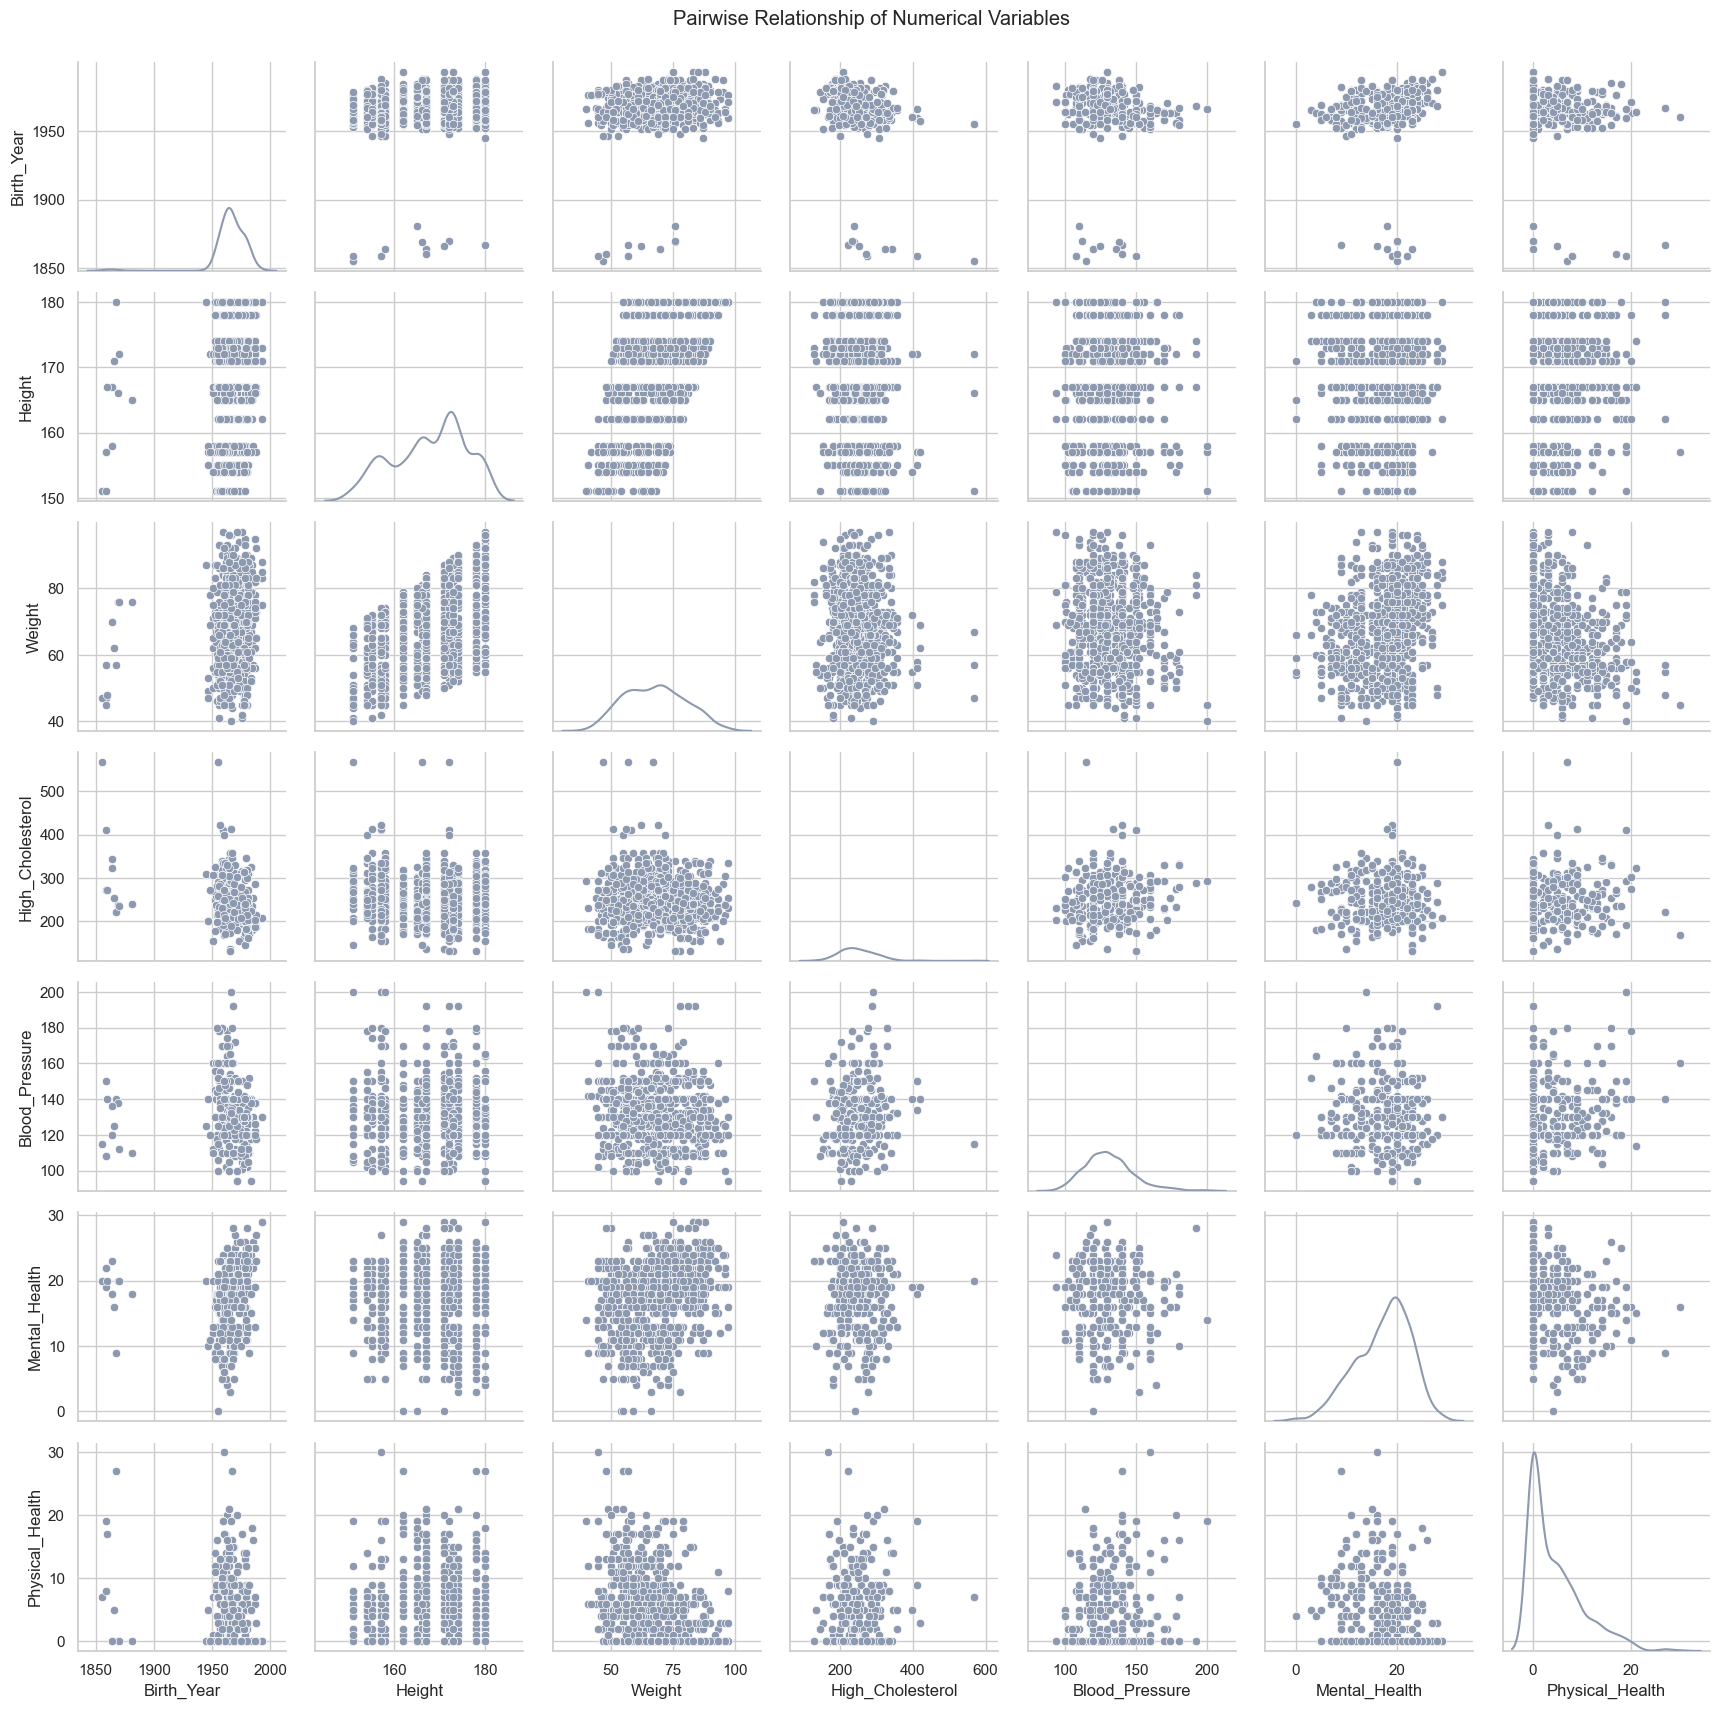

In [20]:
# setting pairplot, and in the diagonal of the figure the histograms already plotted before
chart = sns.PairGrid(train[metric_features])
chart.map_upper(sns.scatterplot, color = '#8d99ae')
chart.map_lower(sns.scatterplot, color = '#8d99ae')
chart.map_diag(sns.kdeplot, color = '#8d99ae')

# defining the layout
plt.subplots_adjust(top = 0.95)
plt.suptitle('Pairwise Relationship of Numerical Variables')

# showing the plot
plt.show()

<a id = "bar-plots"></a>

#### 2.3.4. Bar plots

Using the same logic from the multiple box plot figure above, we can build a multiple bar plot figure for each non-metric variable, in order to extract some useful information.

In [21]:
# we do not want to plot the Name variable in a bar chart, since it does not provide us any useful information

non_metric_features_name = list(set(non_metric_features) - set(['Name']))

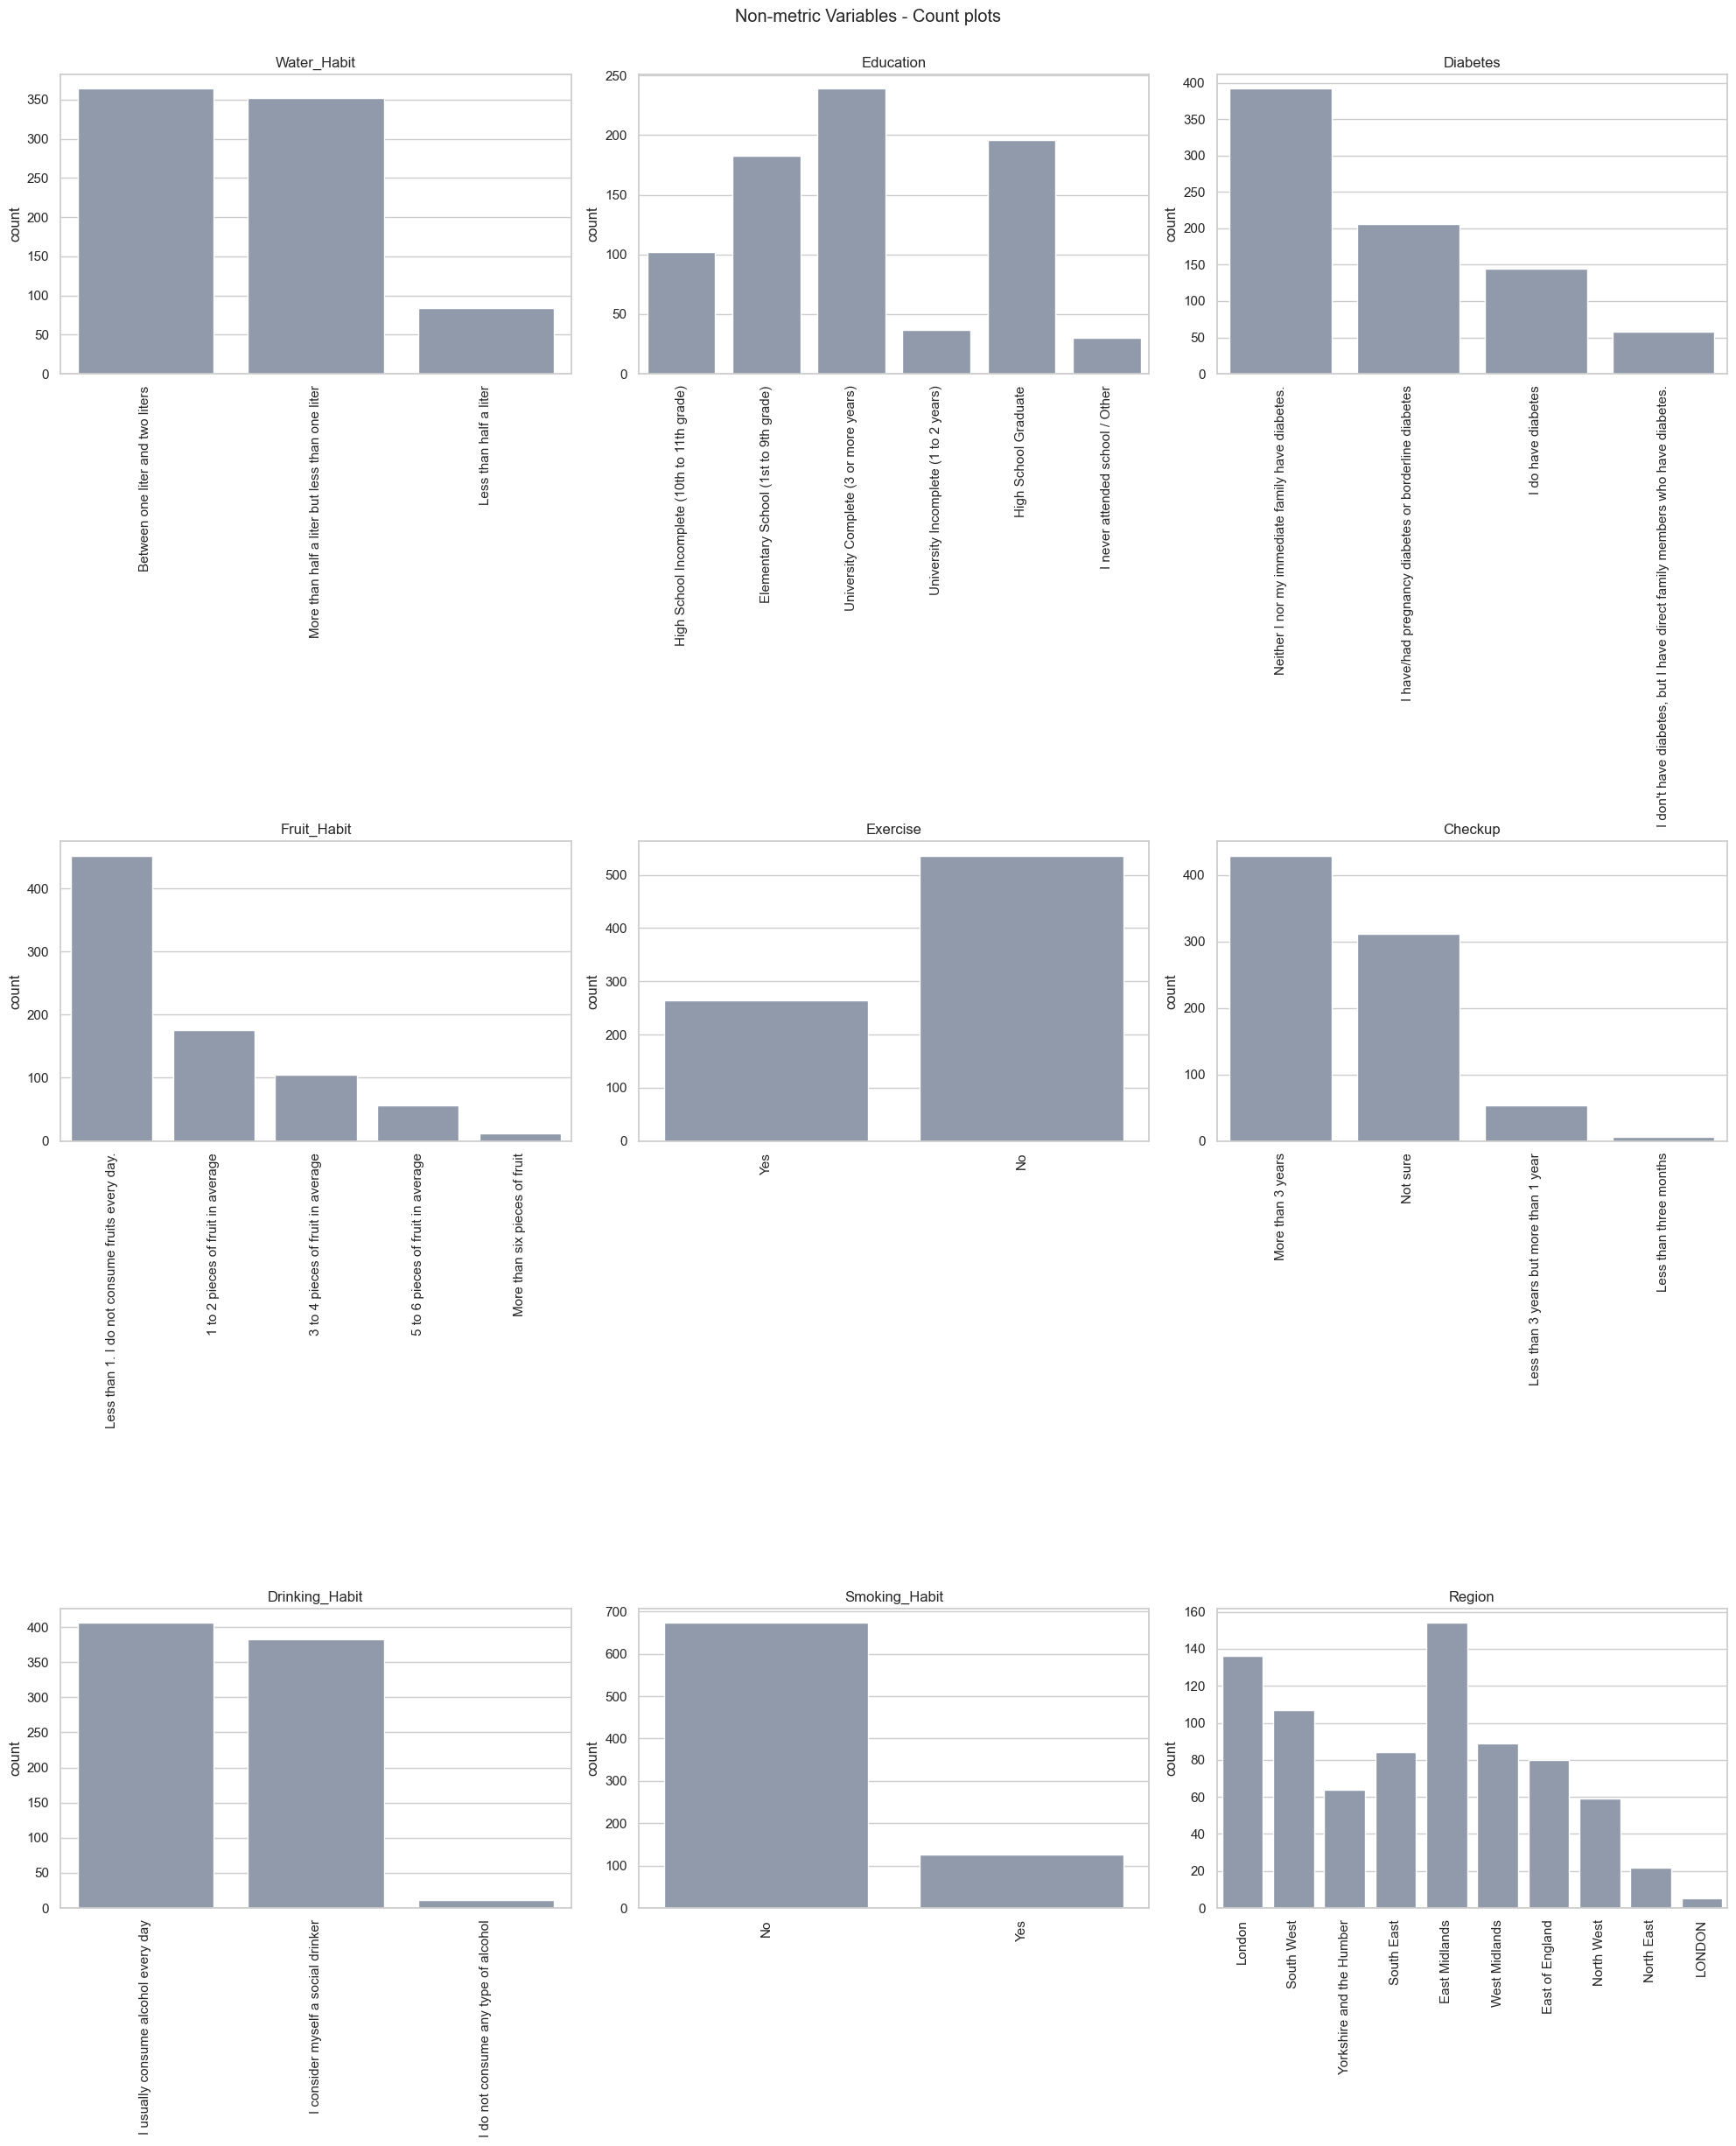

In [22]:
# preparing the figure by create individual axes where each bar chart will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features_name) / 3), figsize = (20, 25))

# ploting the data
# iterating across axes objects and associating each bar chart:
for ax, feat in zip(axes.flatten(), non_metric_features_name):
    chart = sns.countplot(x = train[feat], color = '#8d99ae', ax = ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 'vertical')
    chart.set_title(feat)
    chart.set(xlabel = None)
    plt.tight_layout()
    
# adding a centered title to the figure:
title = 'Non-metric Variables - Count plots'
fig.subplots_adjust(top = 0.95)
plt.suptitle(title)
    
# showing the plot
plt.show()

From these bar charts, we can say that the majority of the patients in our training dataset does not smoke more than 10
cigars daily and does not exercise (more than 30 minutes) 3 times per week or more. Additionally, most of the patients did not make any check-up in the past 3 months. 

Specifically looking at the `Region` bar chart, we can see that there is an inconsistency in the writing style of this variable, since London appears in two bars, one with a capital letter in the beginning of the word, and other with all capital letters, so we should correct this.

<a id = "variables-vs-target"></a>

#### 2.3.5. Variables vs. target

We should see how the variables behave when there is and isn't disease, as it is the main variable we want to predict.

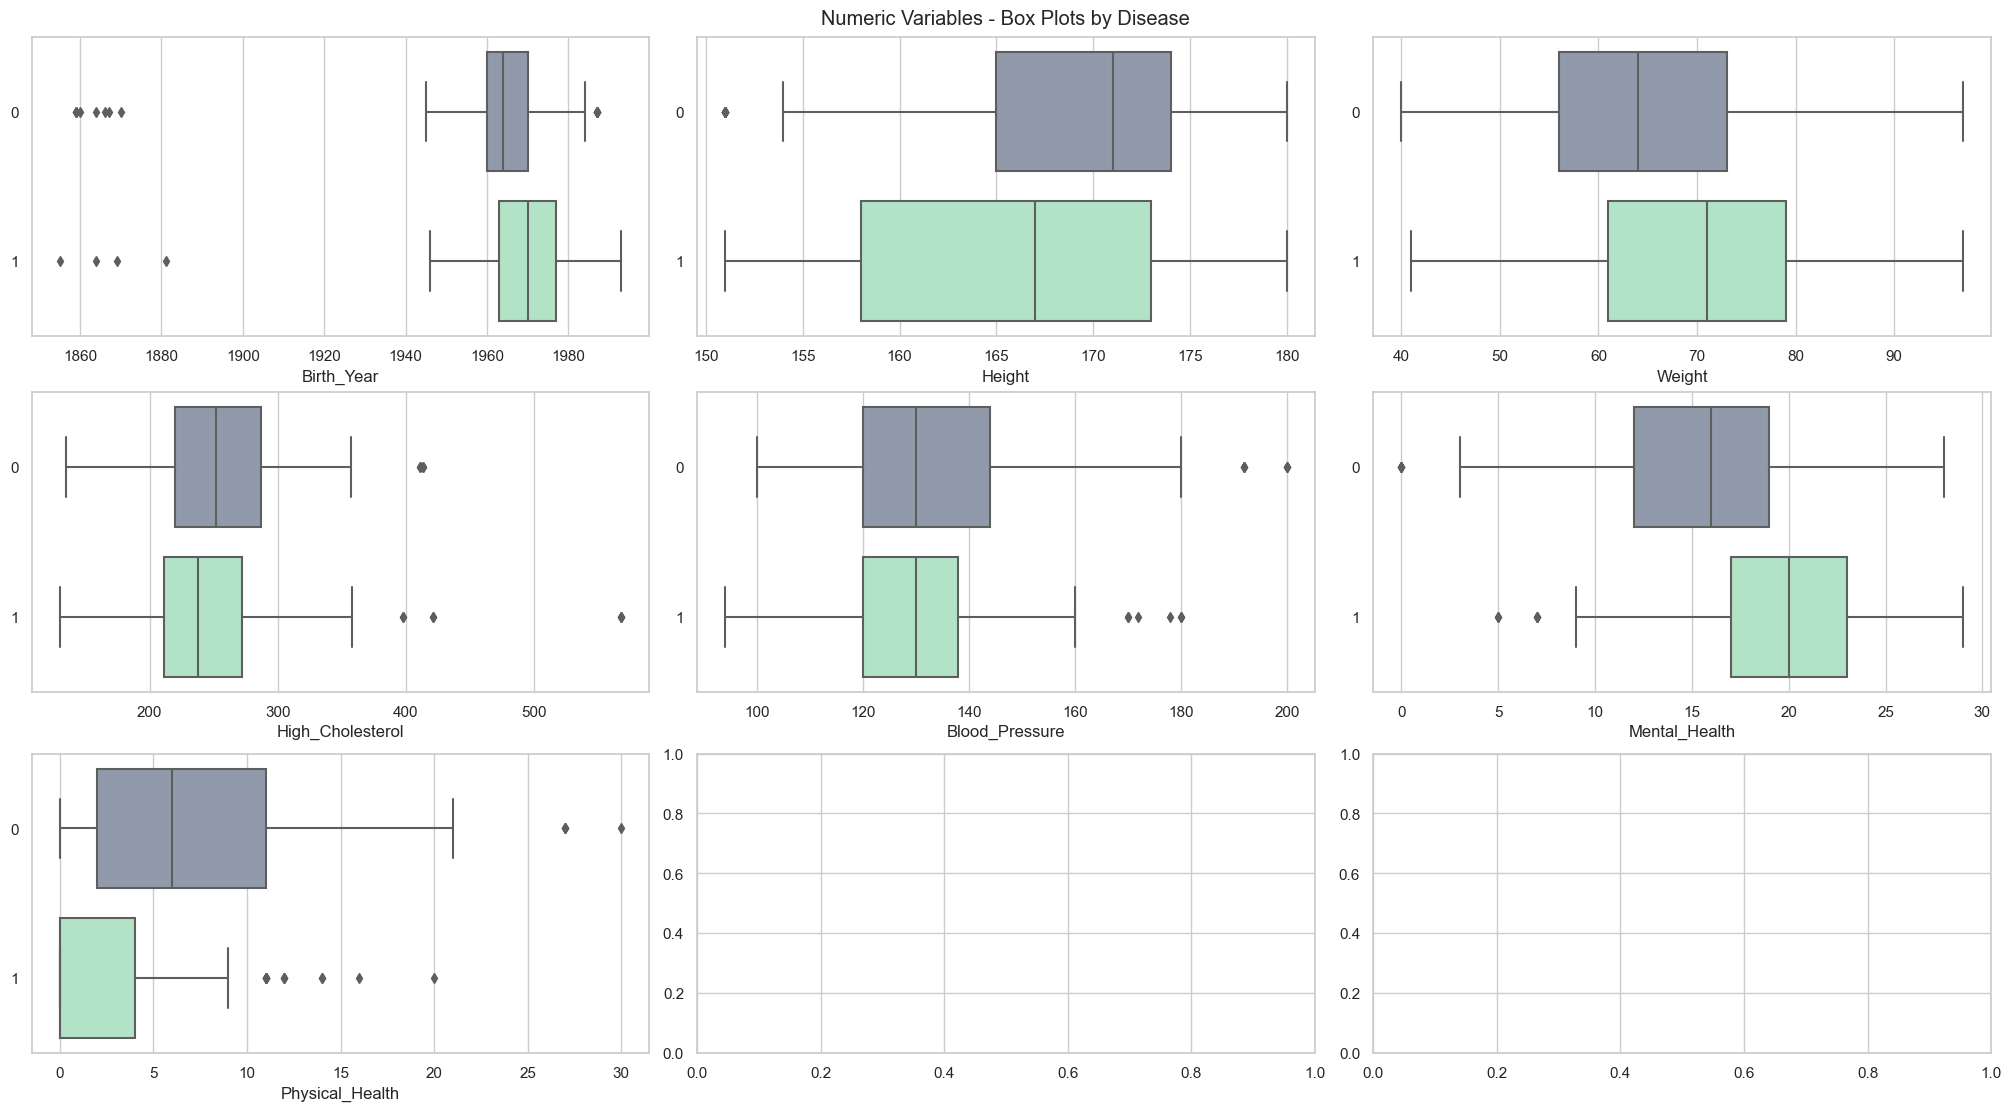

In [23]:
# plot the numerical variables in a box plot according to the target (disease)

# preparing the figure
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize = (20, 11), constrained_layout = True)

# ploting the data
for ax, f in zip(axes.flatten(), metric_features):
    sns.boxplot(y = 'Disease', data = train, ax = ax, x = f, palette = ['#8d99ae', '#abebc6'], orient = 'h')
    ax.set_ylabel('') 

# layout
plt.suptitle('Numeric Variables - Box Plots by Disease')
plt.show()

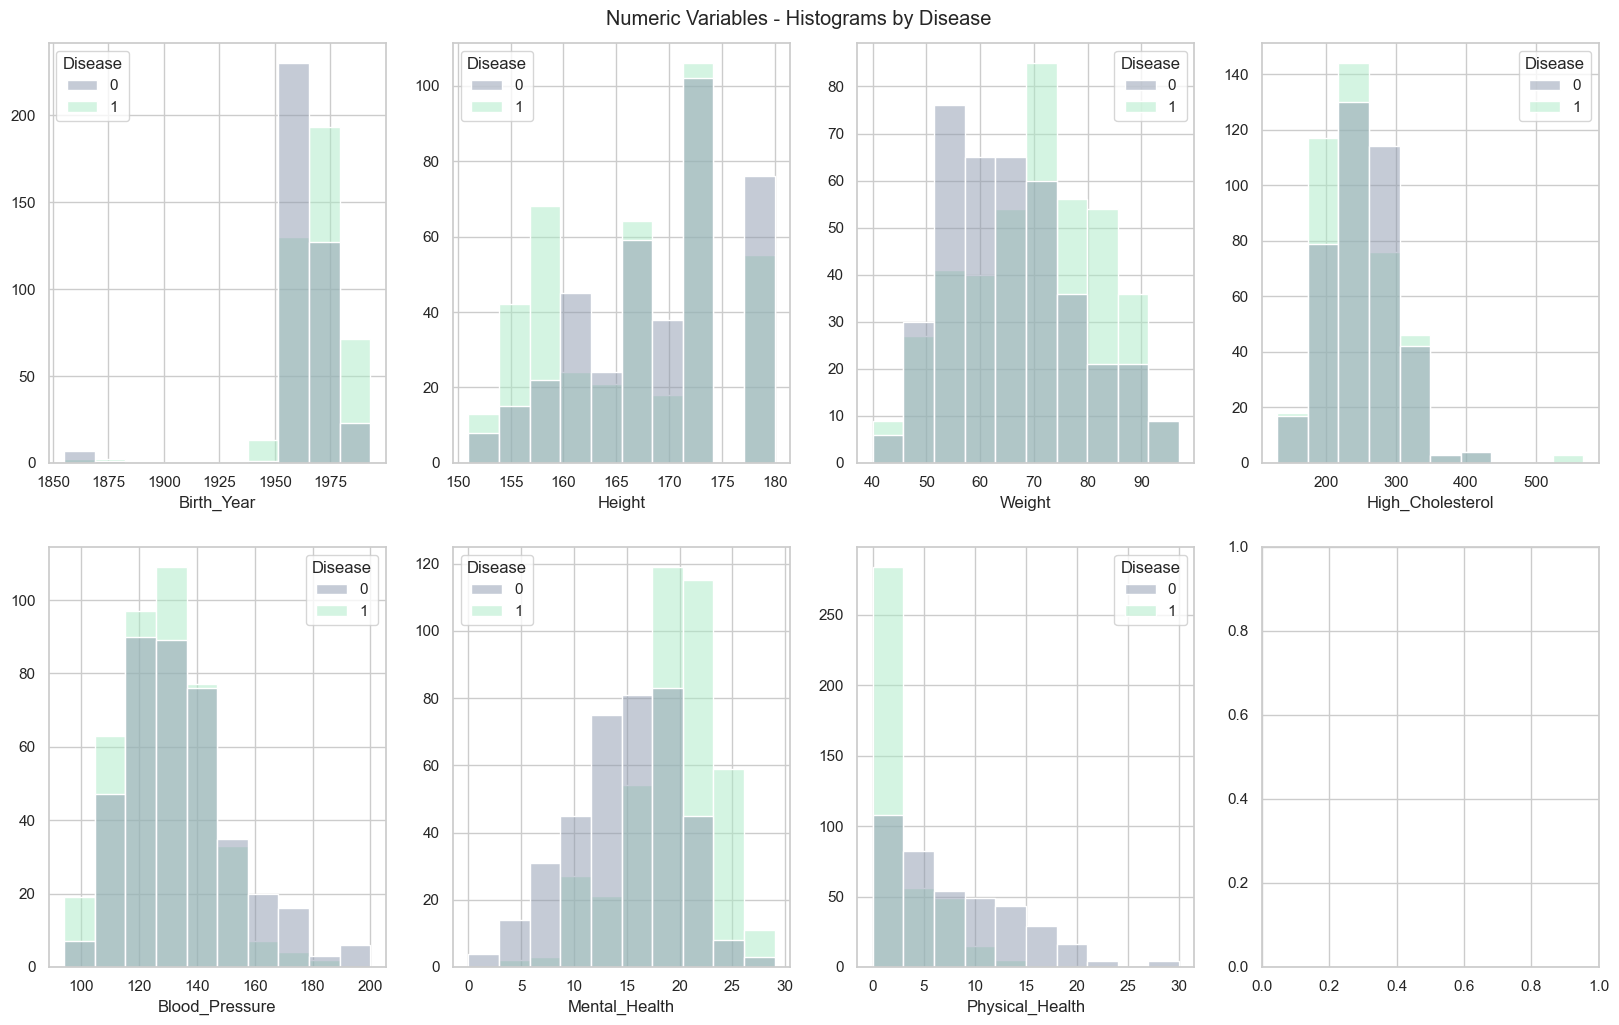

In [24]:
# plot the numerical variables in a histogram according to the target (disease)

# preparing the figure by creating individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize = (20, 11))

# ploting the data
# iterating across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features):
    chart = sns.histplot(ax = ax, data = train, x = train[feat], hue = 'Disease', bins = 10, palette = ['#8d99ae', '#abebc6'])
    chart.set(ylabel = None)
    
# adding a centered title to the figure:
title = 'Numeric Variables - Histograms by Disease'
fig.subplots_adjust(top = 0.95)
plt.suptitle(title)

# showing the plot
plt.show()

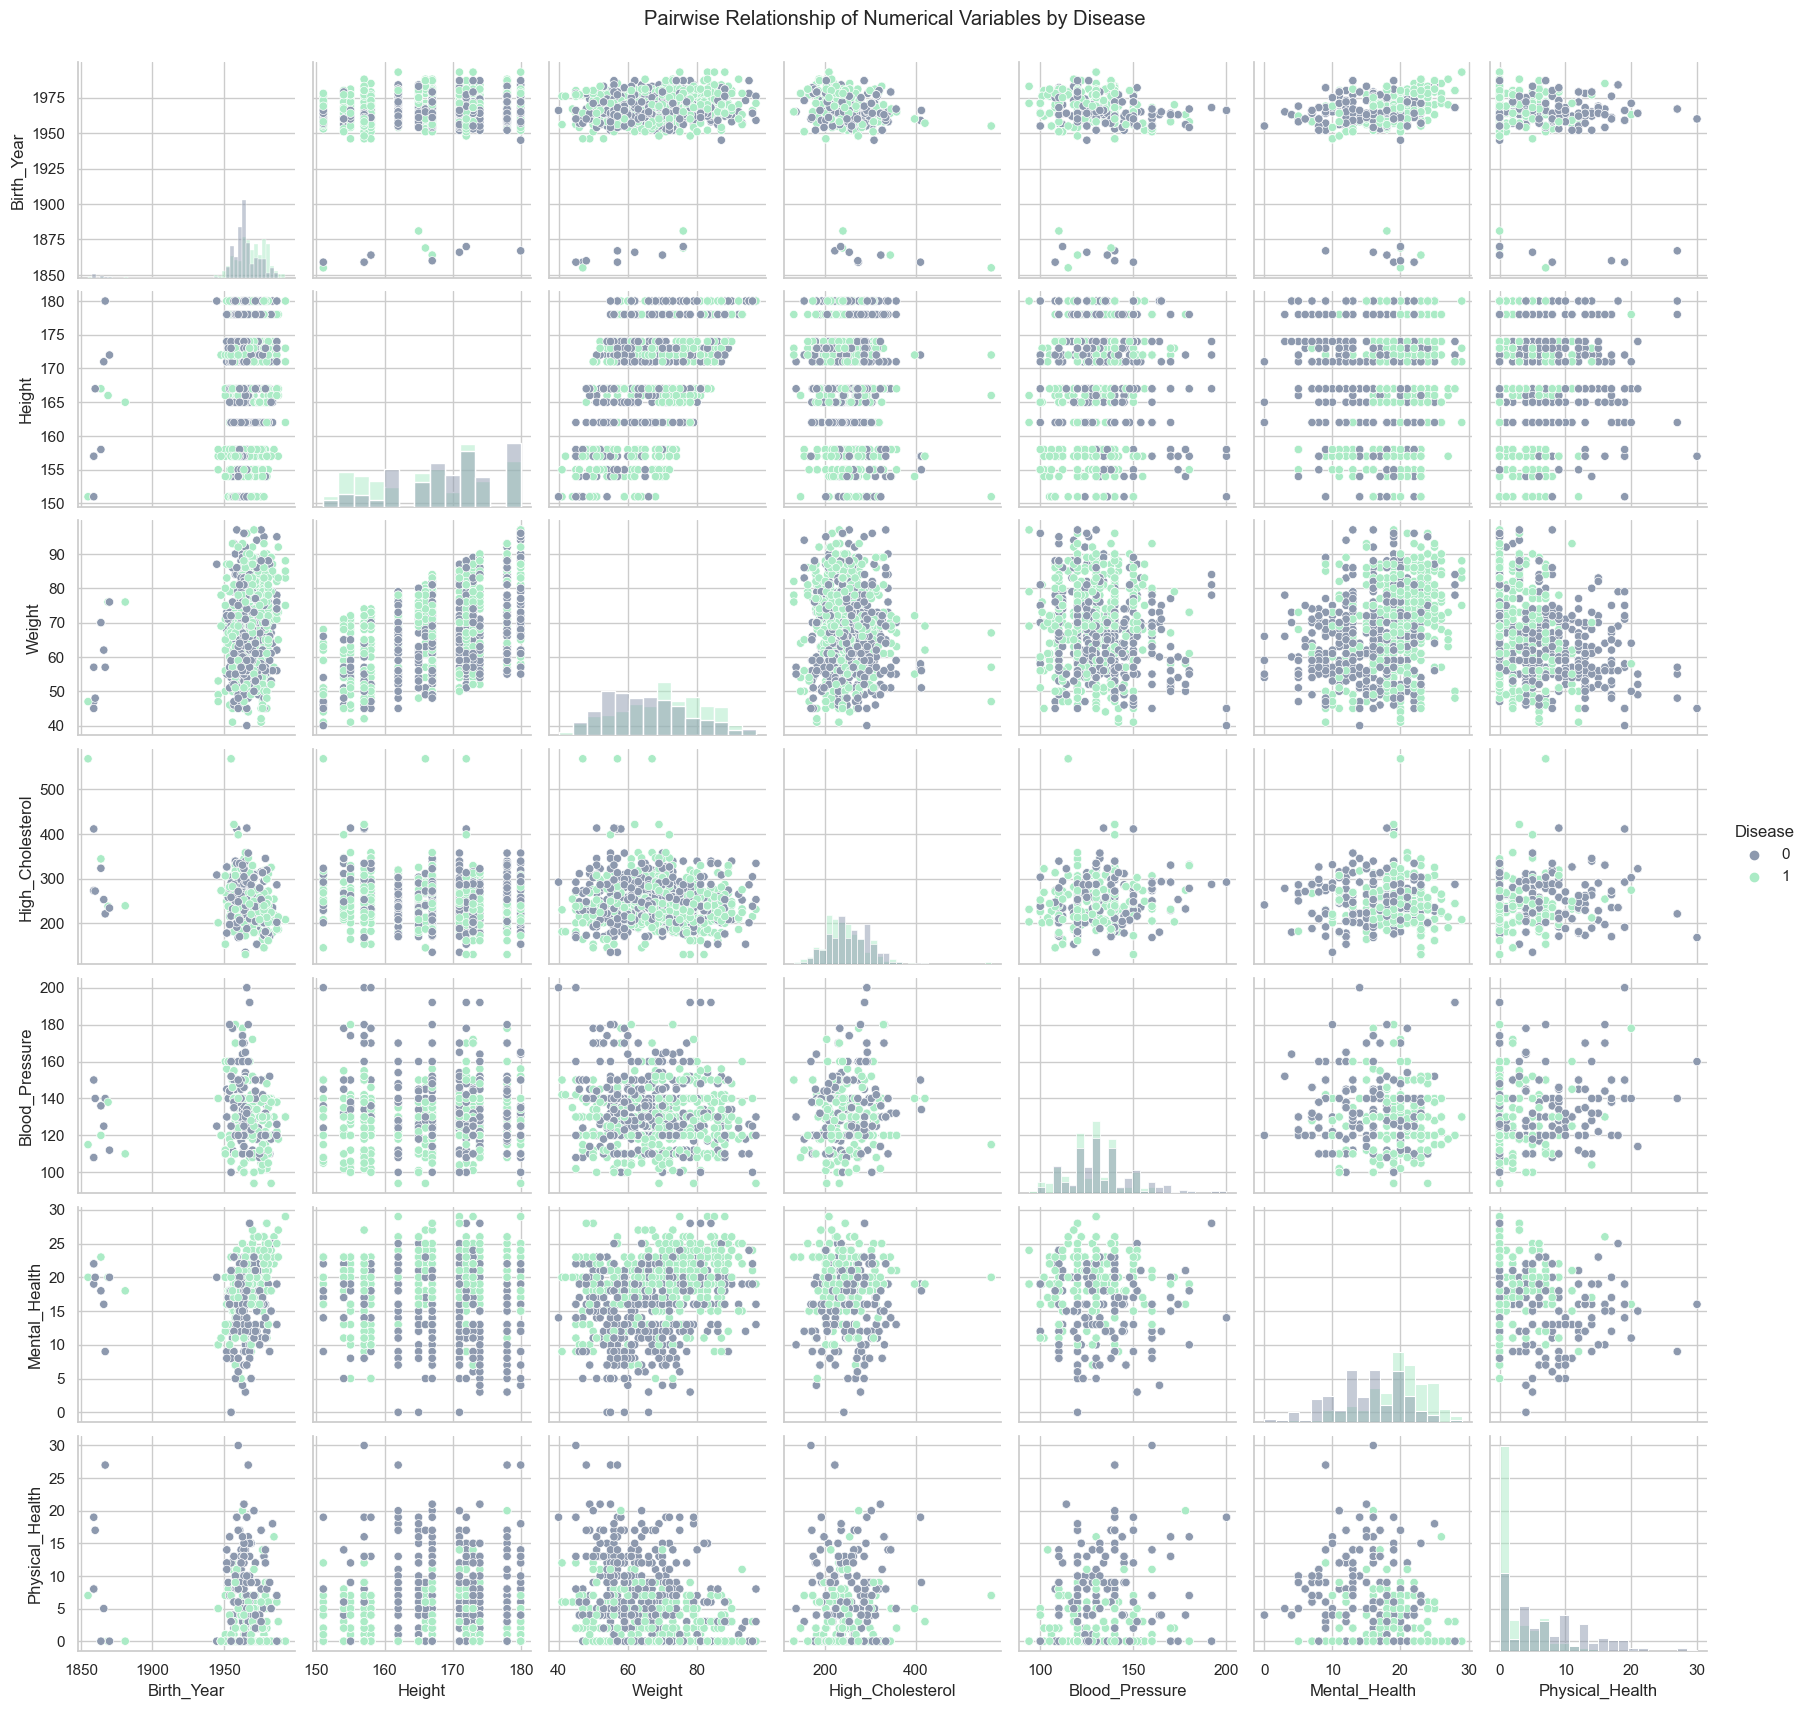

In [25]:
# pairwise relationship of numerical variables using a categorical variable hue

# setting pairplot
sns.pairplot(train[metric_features + ['Disease']], diag_kind = "hist", hue = 'Disease',
             palette = ['#8d99ae', '#abebc6'])

# layout
plt.subplots_adjust(top = 0.95)
plt.suptitle('Pairwise Relationship of Numerical Variables by Disease')

plt.show()

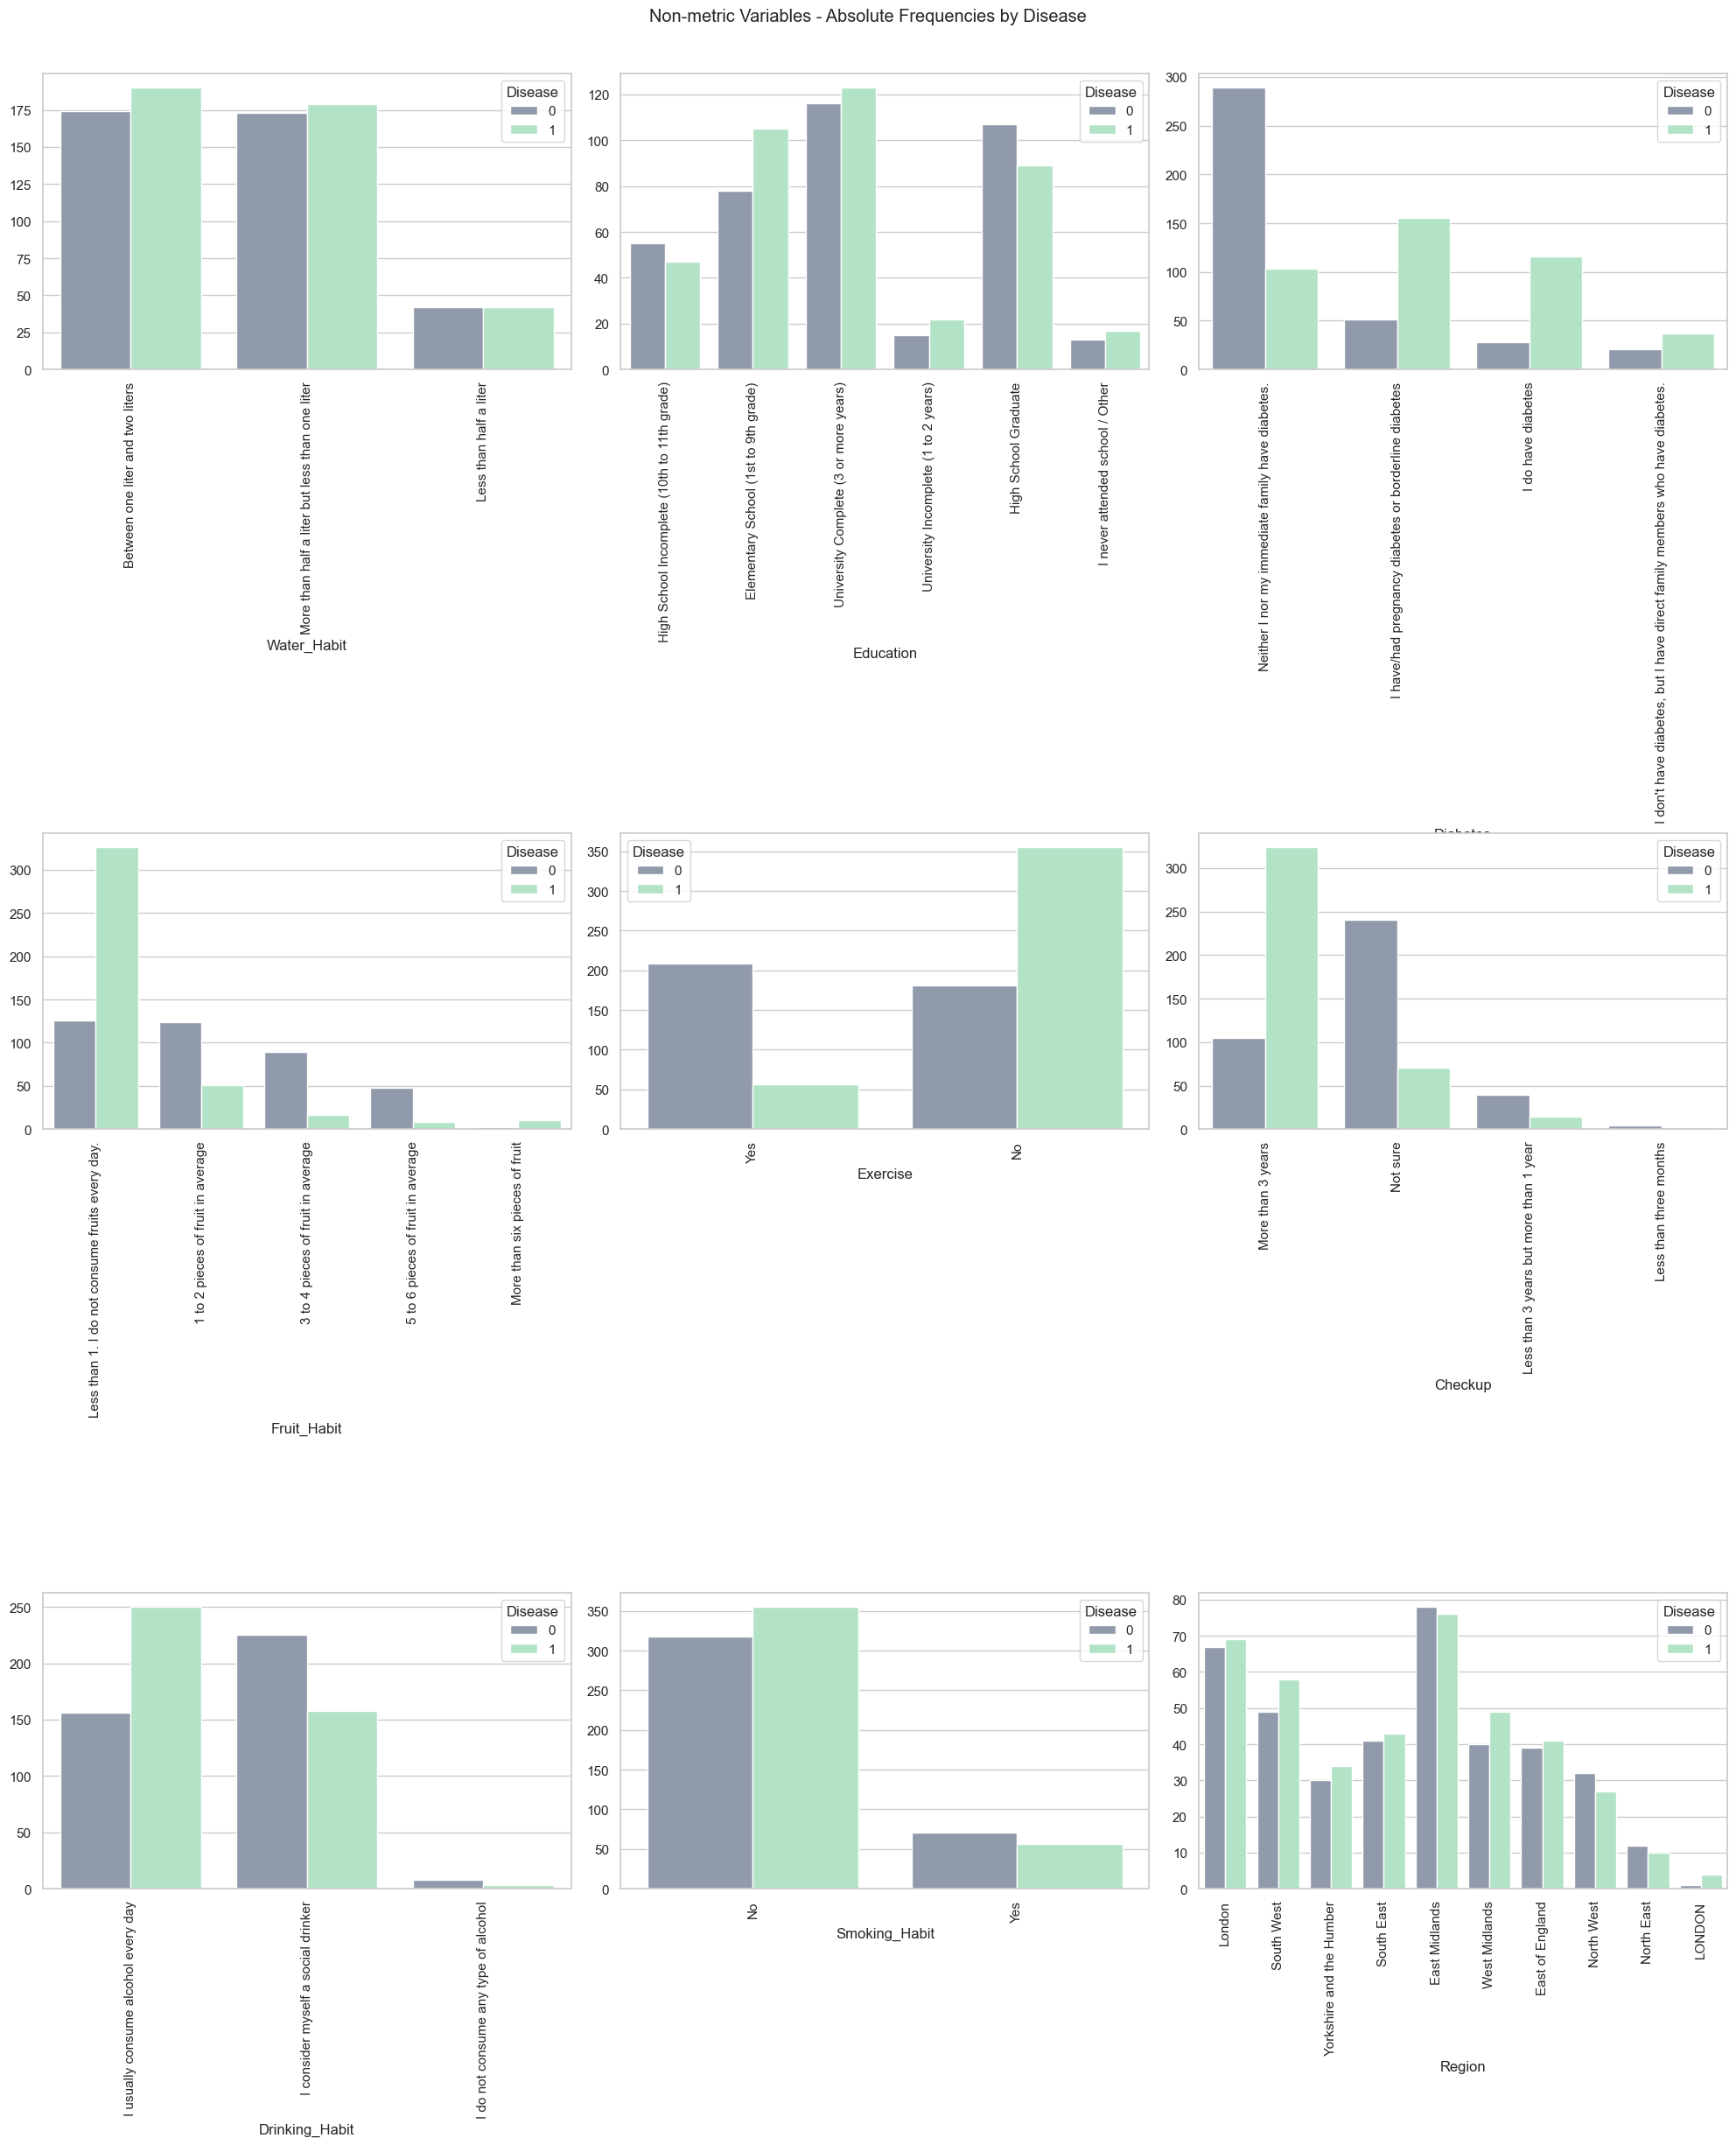

In [26]:
# plot the non metric variables in a bar chart according to the target (disease)

# preparing the figure
fig, axes = plt.subplots(3, ceil(len(non_metric_features_name) / 3), figsize = (20, 25))

# ploting the data
for ax, x in zip(axes.flatten(), non_metric_features_name):
    chart = sns.countplot(x = x, hue = 'Disease', data = train, ax = ax, palette = ['#8d99ae', '#abebc6'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 'vertical')
    chart.set(ylabel = None)
    plt.tight_layout()
    
# layout
plt.suptitle('Non-metric Variables - Absolute Frequencies by Disease')
fig.subplots_adjust(top = 0.95)
plt.show()

<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>
    
## 3. Preprocessing

- [3.1. Duplicates](#duplicates)
- [3.2. New features](#new-features)
- [3.3. Strange values and outliers](#strange-values-outliers)
    - [3.3.1. IQR method](#iqr-method)
    - [3.3.2. Manual filtering](#manual-filtering)
- [3.4. Missing values](#missing-values)
    - [3.4.1. Mode](#mode-fill-nan)
    - [3.4.2. Mode of a subset](#mode-subset-fill-nan)
    - [3.4.3. Delete](#delete-fill-nan)
    - [3.4.4. Naive Bayes to fill missing values](#naive-bayes-fill-nan)
- [3.5. Data types](#data-types)
    - [3.5.1. One-hot encoding](#one-hot-encoding)
    - [3.5.2. Ordinal encoding](#ordinal-encoding)
    - [3.5.3. MinMax scaling](#min-max-scaling)
    - [3.5.4. Standard scaling](#standard-scaling)
    - [3.5.5. Robust scaling](#robust-scaling)
- [3.6 Data reduction](#data-reduction)
    - [3.6.1. Principal component analysis](#pca)
    
[Back to TOC](#toc)

### Problems:
- Duplicates?
- New features?
- Strange values?
- Missing values?
- Data types?

<a id = "duplicates"></a>

### 3.1. Duplicates

In [27]:
# checking duplicate observations

train.duplicated().sum()

0

As we saw before there were no duplicate observations.

<a id = "new-features"></a>

### 3.2. New features

We can create multiple new variables in order to try to extract some useful information. Some examples are:
- `Age` gives us the age of the patient, based on the `BirthYear` and the current year.
- `Gender` gives us the gender of the patient, based on the presence of *Mrs.* or *Mr.* in the variable `Name`
- `BMI` (Body Mass Index) given by the formula $ BMI = \frac{weight (kg)}{height (m) ^ 2} $

In [28]:
# defining a function to create new variables to our dataset

def creating_new_features(df):
    # creating a variable 'Age' based on 'Birth_Year'
    df['Age'] = date.today().year - df['Birth_Year']
    
    # creating a variable 'Gender' based on the presence of Mrs. or Mr. in the variable 'Name'
    df['Gender'] = np.where(df['Name'].str.contains('Mr\.'), 'Male', 'Female')
    
    # creating a variable 'BMI' (Body Mass Index) based on the weight and height
    df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
    
    return df

In [29]:
# using the function in our training dataset

train = creating_new_features(train)

In [30]:
# updating our lists with the metric and non-metric features
metric_features.append('Age')
non_metric_features.append('Gender')
non_metric_features_name.append('Gender')
categorical_features.append('Gender')
metric_features.append('BMI')

# updating our data, train_num and train_cat
data = train.drop('Disease', axis = 1)

<a id = "strange-values-outliers"></a>

### 3.3. Strange values and outliers

As we said before when analysing the bar charts for non-numerical variables, the `Region` 'London' appears in two manners, with capital letters and with lower case letters, so we should correct this.

In [31]:
# defining a function that replaces the problem found in Region

def replace_region(df):
    # replacing LONDON values in the Region variable by London
    df.loc[:, 'Region'] = df.loc[:, 'Region'].replace(['LONDON'], 'London')
    
    return df

In [32]:
# using the function in our training dataset

train = replace_region(train)

In [33]:
# updating our data

data = train.drop('Disease', axis = 1)

We can check if there are any kind of mismatches, inconsistencies, **incoherence** and redundancies. For example, we can check if there are patients under 16 years that already have a degree.

In [34]:
train[(train['Age'] <= 16) & (train['Education'] == "University Complete (3 or more years)")]

Empty DataFrame
Columns: [Name, Birth_Year, Region, Education, Disease, Smoking_Habit, Drinking_Habit, Exercise, Fruit_Habit, Water_Habit, Height, Weight, High_Cholesterol, Blood_Pressure, Mental_Health, Physical_Health, Checkup, Diabetes, Age, Gender, BMI]
Index: []

[0 rows x 21 columns]

<div class="alert alert-block alert-info">

</font> <font color = '#3a7f8f'> **Disclaimer:** </font>

We know that when the entire data is used for training the model using different algorithms, the problem of evaluating the models and selecting the most optimal model remains, since we want to know which model makes a better prediction on future or unseen datasets than all other models. So we need to have some mechanism arises wherein the model is trained on one data set and tested on another dataset.

We already have the dataset split in two (the training dataset and testing dataset), but in order to select the best model we should have a validation dataset. We can use several methods: **hold-out method** (used for big datasets), **cross-validation method** (for the generality of the cases) and **leave-one-out method** (for small datasets). 

The appropriate method in this case is the cross-validation method (maybe with stratified k-fold). But, we have several preprocessing steps we should do after the split, to make sure that any validation information is not used in the training phase of our models. So, here we are just defining functions to deal with the different preprocessing problems, and then later on the project we can use them.

In [35]:
# creating a copy of our dataset to test the different functions we are going to create

train_demo = train.copy()
data_demo = train_demo.drop('Disease', axis = 1)

We should as well solve the problem with the **outliers**. So, we can use two methods: the IQR method (based on the interquartile range) and a manual method (defined with our understanding of the data).

<a id = "iqr-method"></a>

#### 3.3.1. IQR method

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers.

In [36]:
def IQR_method(df, mf):
    
    # calculating the quartiles and the correspondent inter quartil range
    q25 = df[mf].quantile(.25)
    q75 = df[mf].quantile(.75)
    iqr = (q75 - q25)
    
    # defining the limits to search for outliers
    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr
    
    # applying the calculated measures to filter the observations in our dataset and transforming the result into a pandas series
    filter = []
    for metric in mf:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filter.append(df[metric].between(llim, ulim, inclusive = 'both'))
    filter = pd.Series(np.all(filter, 0), index = df.index)

    # applying the filter to our dataframe
    df_filter = df[filter]

    return df_filter

In [37]:
# function that removes outliers by IQR method, when the data is split into dependent and independent variables

def x_y_IQR_method(x, y, mf):
    
    # calculating the quartiles and the correspondent inter quartil range
    q25 = x[mf].quantile(.25)
    q75 = x[mf].quantile(.75)
    iqr = (q75 - q25)
    
    # defining the limits to search for outliers
    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr
    
    # applying the calculated measures to filter the observations in our dataset and transforming the result into a pandas series
    filter = []
    for metric in mf:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filter.append(x[metric].between(llim, ulim, inclusive = 'both'))
    filter = pd.Series(np.all(filter, 0), index = x.index)

    # applying the filter to our dataframe
    x_filter = x[filter]
    y_filter = y[filter]
    
    return x_filter, y_filter

In [38]:
# testing our function

train_iqr = IQR_method(train_demo, metric_features)
print('Percentage of data kept after removing outliers:', np.round(train_iqr.shape[0] / train_demo.shape[0] * 100, 4))

Percentage of data kept after removing outliers: 92.25


As we can notice, this approach is problematic since it removes too much observations (around 8%).

<a id = "manual-filtering"></a>

#### 3.3.2 Manual filtering

In [39]:
def manual_method(df):
    
    # defining the limits to search for outliers
    filter = (
        (df['Birth_Year'] >= 1900)
    )
    
    # applying the filter to our dataframe
    df_filter = df[filter]
    
    return df_filter

In [40]:
# function that removes outliers by the manual method, when the data is split into dependent and independent variables

def x_y_manual_method(x, y):
    
    # defining the limits to search for outliers
    filter = (
        (x['Birth_Year'] >= 1900)
    )
    
    # applying the filter to our dataframes
    x_filter = x[filter]
    y_filter = y[filter]
    
    return x_filter, y_filter

In [41]:
# testing our function

train_manual = manual_method(train_demo)
print('Percentage of data kept after removing outliers:', np.round(train_manual.shape[0] / train_demo.shape[0] * 100, 4))

Percentage of data kept after removing outliers: 98.5


So, in this case we are removing 1.5% of our observations, which is acceptable. So we will keep this approach, but should as well test our models with the dataset with the outliers in order to see the diference in the performance.

On the manual filter we only included the variable `Birth_Year` since it is the only variable that is not acceptable in our case. In the variables `High_Cholesterol` and `Blood_Pressure` we see maximum values that are unlikely to happen, they are still possible, so we should consider them instead of droping them.

In [42]:
# keeping the manual method to remove the outliers

train_demo = train_manual
data_demo = train_demo.drop('Disease', axis = 1)
target_demo = train_demo['Disease']

<a id = "missing-values"></a>

### 3.4. Missing values

As we saw before, there are missing values (NaN) in the variable `Education`. We can check if there are missing values encoded as empty strings, or other types not recognized by pandas, by setting them to NaN and then counting the total of NaN in each variable.

In [43]:
# replacing other types of missing values not recognized by pandas with NaN
missing_values = ['n/a', 'na', '--', '']
train.replace(missing_values, np.nan, inplace = True)

# storing the indexes of the observations with missing values and checking the number of missing values
nans_index = train_demo.isna().any(axis = 1)
train_demo.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           12
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Age                  0
Gender               0
BMI                  0
dtype: int64

<a id = "mode-fill-nan"></a>

#### 3.4.1. Mode

We can use the mode to fill the missing values, since they appear on a categorical feature.

In [44]:
# function that uses the mode to impute the missing values in a dataset

def input_nan_mode(df, missing_feat):
    
    # calculating the mode of the variable that has missing values to use it to fill them
    mode = df.loc[:, missing_feat].mode().loc[0]
    
    # filling the missing values (inplace = True to save the changes directly in the dataset)
    df[missing_feat].fillna(mode, inplace = True)
    
    return df

In [45]:
# function that uses the mode to impute the missing values in a dataset that is splitted, so it only uses information from 
# the training dataset

def train_val_input_nan_mode(train, validation, missing_feat):
    
    # calculating the mode of the variable that has missing values in the training dataset
    mode = train.loc[:, missing_feat].mode().loc[0]
    
    train[missing_feat].fillna(mode, inplace = True)
    validation[missing_feat].fillna(mode, inplace = True)
    
    return train, validation

In [46]:
# creating a copy to inpute the missing values with the mode

data_mode = data_demo.copy()

In [47]:
# testing our function
data_mode = input_nan_mode(data_mode, 'Education')

# and seeing the rows with the imputed NaNs
data_mode.loc[nans_index, :]

Name  Birth_Year         Region  \
PatientID                                                    
1653          Mr. David Lamothe        1966  East Midlands   
1085         Mr. Robert Swenson        1978     South West   
1048       Mrs. Margaret Wysong        1956  East Midlands   
1128          Mr. John Castillo        1970     South East   
1241          Mr. Tommy Jenkins        1955         London   
1195              Mr. John Hess        1963         London   
1296          Mr. Terry Roberts        1955     South East   
1904        Mr. Manuel Rothwell        1967  East Midlands   
1664          Mrs. Jan Campbell        1956  East Midlands   
1802              Mrs. Mary Rey        1959     South West   
1618             Mr. Dana Morse        1973     South West   
1831              Mr. Levi Auld        1964         London   

                                       Education Smoking_Habit  \
PatientID                                                        
1653       University Complete (3 or more years)           Yes   
1085       University Complete (3 or more years)            No   
1048       University Complete (3 or more years)            No   
1128       University Complete (3 or more years)            No   
1241       University Complete (3 or more years)            No   
1195       University Complete (3 or more years)           Yes   
1296       University Complete (3 or more years)            No   
1904       University Complete (3 or more years)            No   
1664       University Complete (3 or more years)            No   
1802       University Complete (3 or more years)            No   
1618       University Complete (3 or more years)            No   
1831       University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1653        I consider myself a social drinker      Yes   
1085       I usually consume alcohol every day       No   
1048        I consider myself a social drinker       No   
1128       I usually consume alcohol every day       No   
1241        I consider myself a social drinker       No   
1195       I usually consume alcohol every day       No   
1296       I usually consume alcohol every day       No   
1904       I usually consume alcohol every day       No   
1664       I usually consume alcohol every day       No   
1802       I usually consume alcohol every day      Yes   
1618       I usually consume alcohol every day       No   
1831       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1653       Less than 1. I do not consume fruits every day.   
1085       Less than 1. I do not consume fruits every day.   
1048                     1 to 2 pieces of fruit in average   
1128                         More than six pieces of fruit   
1241       Less than 1. I do not consume fruits every day.   
1195       Less than 1. I do not consume fruits every day.   
1296       Less than 1. I do not consume fruits every day.   
1904       Less than 1. I do not consume fruits every day.   
1664       Less than 1. I do not consume fruits every day.   
1802       Less than 1. I do not consume fruits every day.   
1618       Less than 1. I do not consume fruits every day.   
1831                         More than six pieces of fruit   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1653       More than half a liter but less than one liter     167      49   
1085                     Between one liter and two liters     165      72   
1048       More than half a liter but less than one liter     166      67   
1128                               Less than half a liter     167      74   
1241                               Less than half a liter     172      55  

<a id = "mode-subset-fill-nan"></a>

#### 3.4.2. Mode of a subset

We could fill the missing values with the mode (for `Education`) of a certain subset of our dataset. For example, if we are classifying patients according to whether or not they exercise, we may replace the missing values with the mode value for patients in the same category as that of the given observation.

In [48]:
# function that uses the mode of a subset to impute the missing values in a dataset

def input_nan_mode_subset(df, missing_feat, variable):
    
    # calculating the modes by grouping according to the variable passed
    modes_subset = df.groupby(variable)[missing_feat].transform(lambda x: x.mode()[0])
    
    # filling the missing values (inplace = True to save the changes directly in the dataset)
    df[missing_feat].fillna(modes_subset, inplace = True)
    
    return df

In [49]:
# function that uses the mode of a subset to impute the missing values in a dataset that is splitted, so it only uses 
# information from the training dataset

def train_val_input_nan_mode_subset(train, validation, missing_feat, variable):
    
    # calculating the mode of the variable that has missing values in the training dataset
    modes_subset = train.groupby(variable)[missing_feat].transform(lambda x: x.mode()[0])
    
    train[missing_feat].fillna(modes_subset, inplace = True)
    validation[missing_feat].fillna(modes_subset, inplace = True)
    
    return train, validation

In [50]:
# creating a copy to inpute the missing values with the mode of a subset

data_mode_subset = data_demo.copy()

In [51]:
# testing our function
data_mode_subset = input_nan_mode_subset(data_mode_subset, 'Education', 'Region')

# and seeing the rows with the imputed NaNs
data_mode_subset.loc[nans_index, :]

Name  Birth_Year         Region  \
PatientID                                                    
1653          Mr. David Lamothe        1966  East Midlands   
1085         Mr. Robert Swenson        1978     South West   
1048       Mrs. Margaret Wysong        1956  East Midlands   
1128          Mr. John Castillo        1970     South East   
1241          Mr. Tommy Jenkins        1955         London   
1195              Mr. John Hess        1963         London   
1296          Mr. Terry Roberts        1955     South East   
1904        Mr. Manuel Rothwell        1967  East Midlands   
1664          Mrs. Jan Campbell        1956  East Midlands   
1802              Mrs. Mary Rey        1959     South West   
1618             Mr. Dana Morse        1973     South West   
1831              Mr. Levi Auld        1964         London   

                                       Education Smoking_Habit  \
PatientID                                                        
1653                        High School Graduate           Yes   
1085       University Complete (3 or more years)            No   
1048                        High School Graduate            No   
1128        Elementary School (1st to 9th grade)            No   
1241       University Complete (3 or more years)            No   
1195       University Complete (3 or more years)           Yes   
1296        Elementary School (1st to 9th grade)            No   
1904                        High School Graduate            No   
1664                        High School Graduate            No   
1802       University Complete (3 or more years)            No   
1618       University Complete (3 or more years)            No   
1831       University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1653        I consider myself a social drinker      Yes   
1085       I usually consume alcohol every day       No   
1048        I consider myself a social drinker       No   
1128       I usually consume alcohol every day       No   
1241        I consider myself a social drinker       No   
1195       I usually consume alcohol every day       No   
1296       I usually consume alcohol every day       No   
1904       I usually consume alcohol every day       No   
1664       I usually consume alcohol every day       No   
1802       I usually consume alcohol every day      Yes   
1618       I usually consume alcohol every day       No   
1831       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1653       Less than 1. I do not consume fruits every day.   
1085       Less than 1. I do not consume fruits every day.   
1048                     1 to 2 pieces of fruit in average   
1128                         More than six pieces of fruit   
1241       Less than 1. I do not consume fruits every day.   
1195       Less than 1. I do not consume fruits every day.   
1296       Less than 1. I do not consume fruits every day.   
1904       Less than 1. I do not consume fruits every day.   
1664       Less than 1. I do not consume fruits every day.   
1802       Less than 1. I do not consume fruits every day.   
1618       Less than 1. I do not consume fruits every day.   
1831                         More than six pieces of fruit   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1653       More than half a liter but less than one liter     167      49   
1085                     Between one liter and two liters     165      72   
1048       More than half a liter but less than one liter     166      67   
1128                               Less than half a liter     167      74   
1241                               Less than half a liter     172      55  

<a id = "delete-fill-nan"></a>

#### 3.4.3. Delete

"As a general rule of thumb, only features that are missing in excess of 60% of their values should be considered for complete removal" (*Fundamentals of Machine Learning for Predictive Data Analytics Algorithms*), so, in this case, we should not remove the variable `Education`. In the other hand, the 12 observations with missing values represent 1.52284% of the training dataset, so deleting them should not be problematic.

In [52]:
# creating a function to drop the missing values

def delete_nan(df):
    
    # deleting the observations that contain missing values (inplace = True to save the changes directly in the dataset)
    df.dropna(inplace = True)
    
    return df

In [53]:
# creating a copy to inpute the missing values with the mode

data_delete = data_demo.copy()

In [54]:
# testing our function
data_delete = delete_nan(data_delete)

# and seeing that the rows with the missing values do not exist anymore
data_delete.loc[nans_index, :]

Empty DataFrame
Columns: [Name, Birth_Year, Region, Education, Smoking_Habit, Drinking_Habit, Exercise, Fruit_Habit, Water_Habit, Height, Weight, High_Cholesterol, Blood_Pressure, Mental_Health, Physical_Health, Checkup, Diabetes, Age, Gender, BMI]
Index: []

<a id = "naive-bayes-fill-nan"></a>

#### 3.4.4. Naive Bayes to fill missing values

"There are other, more complex approaches to imputation. For example, we can actually build a predictive model that estimates a replacement for a missing value based on the feature values that are present in a dataset for a given instance" (*Fundamentals of Machine Learning for Predictive Data Analytics Algorithms*). So we could try to predict `Education` of the observations based on the other features using a Gaussian Naive Bayes algorithm. We need to have our data encoded, so we will use OrdinalEncoder to do so, and we should keep in mind that we are assuming that the likelihood of each feature is a Gaussian distribution, and assuming that all the features in the data are independent of one another, which is not the case here.

In [55]:
# function that uses the predictions of a gaussian naive bayes to impute the missing values in a dataset

def input_nan_gnb(df, nmf, missing_feat):
    
    # first we have to encode our dataframe using Ordinal Encoder
    # creating one instance of the encoder
    enc = OrdinalEncoder()

    # fitting the encoder to the data and assigning it to a dataframe
    df_aux = pd.DataFrame(enc.fit_transform(df.loc[:, nmf]), columns = nmf, index = df.index)
    
    # reassigning df to contain the oe variables
    df = pd.concat([df.drop(columns = nmf), df_aux], axis = 1)
    
    # creating a Naive Bayes classifier instance to inpute the missing data
    modelGNB = GaussianNB()
    
    # where the independent variables are all the features except the one with missing values
    # and the dependent variable is the feature we are trying to predict
    modelGNB.fit(X = df.drop(missing_feat, axis = 1).loc[df[missing_feat].notna(), :], y = df.loc[df[missing_feat].notna(), missing_feat])

    # assigning the missing values calculated with Naive Bayes to the dataframe
    df.loc[df[missing_feat].isnull(), missing_feat] = modelGNB.predict(df.drop(missing_feat, axis = 1))[df[missing_feat].isnull()]
      
    # reversing the encoding to the original form of the non-metric features
    df[nmf] = enc.inverse_transform(df[nmf])
    
    return df

In [56]:
# function that uses the predictions of a gaussian naive bayes to impute the missing values in a dataset that is splitted,
# so it only uses information from the training dataset

def train_val_input_nan_gnb(train, validation, missing_feat, nmf):
    
    # first we have to encode our dataframe using Ordinal Encoder
    # creating one instance of the encoder
    enc = OrdinalEncoder()

    # fitting the encoder to the data and assigning it to a dataframe
    train_aux = pd.DataFrame(enc.fit_transform(train.loc[:, nmf]), columns = nmf, index = train.index)
    validation_aux = pd.DataFrame(enc.fit_transform(validation.loc[:, nmf]), columns = nmf, index = validation.index)
    
    # reassigning df to contain the oe variables
    train = pd.concat([train.drop(columns = nmf), train_aux], axis = 1)
    validation = pd.concat([validation.drop(columns = nmf), validation_aux], axis = 1)
    
    # creating a Naive Bayes classifier instance to inpute the missing data
    modelGNB = GaussianNB()
    
    # where the independent variables are all the features except the one with missing values
    # and the dependent variable is the feature we are trying to predict
    # the model is fitted using only the training dataset
    modelGNB.fit(X = train.drop(missing_feat, axis = 1).loc[train[missing_feat].notna(), :],
                 y = train.loc[train[missing_feat].notna(), missing_feat])

    # assigning the missing values calculated with Naive Bayes to the dataframe
    train.loc[train[missing_feat].isnull(), missing_feat] = modelGNB.predict(train.drop(missing_feat, axis = 1))[train[missing_feat].isnull()]
    validation.loc[validation[missing_feat].isnull(), missing_feat] = modelGNB.predict(validation.drop(missing_feat, axis = 1))[validation[missing_feat].isnull()]
     
    # reversing the encoding to the original form of the non-metric features
    train[nmf] = enc.inverse_transform(train[nmf])
    validation[nmf] = enc.inverse_transform(validation[nmf])
    
    return train, validation

In [57]:
# creating a new copy to explore the categorical naive bayes imputation

data_GNB = data_demo.copy()

In [58]:
# testing our function
data_GNB = input_nan_gnb(data_GNB, non_metric_features, 'Education')

# and seeing rows with NaNs imputed
data_GNB.loc[nans_index, non_metric_features]

Name         Region  \
PatientID                                        
1653          Mr. David Lamothe  East Midlands   
1085         Mr. Robert Swenson     South West   
1048       Mrs. Margaret Wysong  East Midlands   
1128          Mr. John Castillo     South East   
1241          Mr. Tommy Jenkins         London   
1195              Mr. John Hess         London   
1296          Mr. Terry Roberts     South East   
1904        Mr. Manuel Rothwell  East Midlands   
1664          Mrs. Jan Campbell  East Midlands   
1802              Mrs. Mary Rey     South West   
1618             Mr. Dana Morse     South West   
1831              Mr. Levi Auld         London   

                                       Education Smoking_Habit  \
PatientID                                                        
1653                        High School Graduate           Yes   
1085       University Complete (3 or more years)            No   
1048       University Complete (3 or more years)            No   
1128       University Complete (3 or more years)            No   
1241       University Complete (3 or more years)            No   
1195                        High School Graduate           Yes   
1296       University Complete (3 or more years)            No   
1904        Elementary School (1st to 9th grade)            No   
1664       University Complete (3 or more years)            No   
1802       University Complete (3 or more years)            No   
1618        Elementary School (1st to 9th grade)            No   
1831       University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1653        I consider myself a social drinker      Yes   
1085       I usually consume alcohol every day       No   
1048        I consider myself a social drinker       No   
1128       I usually consume alcohol every day       No   
1241        I consider myself a social drinker       No   
1195       I usually consume alcohol every day       No   
1296       I usually consume alcohol every day       No   
1904       I usually consume alcohol every day       No   
1664       I usually consume alcohol every day       No   
1802       I usually consume alcohol every day      Yes   
1618       I usually consume alcohol every day       No   
1831       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1653       Less than 1. I do not consume fruits every day.   
1085       Less than 1. I do not consume fruits every day.   
1048                     1 to 2 pieces of fruit in average   
1128                         More than six pieces of fruit   
1241       Less than 1. I do not consume fruits every day.   
1195       Less than 1. I do not consume fruits every day.   
1296       Less than 1. I do not consume fruits every day.   
1904       Less than 1. I do not consume fruits every day.   
1664       Less than 1. I do not consume fruits every day.   
1802       Less than 1. I do not consume fruits every day.   
1618       Less than 1. I do not consume fruits every day.   
1831                         More than six pieces of fruit   

                                              Water_Habit            Checkup  \
PatientID                                                                      
1653       More than half a liter but less than one liter           Not sure   
1085                     Between one liter and two liters  More than 3 years   
1048       More than half a liter but less than one liter  More than 3 years   
1128                               Less than half a liter  More than 3 years   
1241                               Less than half a liter           Not sure   
1195                     Between one liter and two liters  More than 3 years   
1296                     Between one liter and two liters  More t

We should start by using the most simple method, so we keep the mode imputation for now.

In [59]:
# keeping the mode imputation to fill the missing values

data_demo = data_mode
train_demo = pd.concat([data_demo, target_demo], axis = 1)

<a id = "data-types"></a>

### 3.5. Data types

As we said before, `Smoking_Habit` and `Exercise` should be encoded as 1 or 0, since they store an answer to a yes or no question, so we should have a binary variable. We could do this transformation with One-hot enconding, assuring as well that we create a binary column for each category.

<a id = "one-hot-encoding"></a>

#### 3.5.1. One-hot encoding

In [60]:
# defining a function to perform one-hot encoding to the non metric features specified as input

def ohc(df, nmf):
    
    # defining an instance of OneHotEncoder
    encoder = OneHotEncoder(sparse = False, drop = 'first')
    
    # use it to encode our variables
    ohc_feat = encoder.fit_transform(df.loc[:, nmf])
    
    # after this we get the new names of the features, and transform this new information into a pandas dataframe
    ohc_feat_names = encoder.get_feature_names_out()
    ohc_df = pd.DataFrame(columns = ohc_feat_names, data = ohc_feat, index = df.index)
    
    # reassigning df to contain the ohc variables and non_metric_features to contain the new names of the encoded variables
    df_ohc = pd.concat([df.drop(columns = nmf), ohc_df], axis = 1)
    encoded_nmf = ohc_feat_names.tolist()
    
    return df_ohc, encoded_nmf

In the modelling phase, we should solve the problem with missing values before encoding the variables, since this method will create a binary column called `Education_nan` (to the "category" missing value).

In [61]:
# creating a copy to apply one-hot enconding (already without missing values)

data_ohc = data_demo.copy()

In [62]:
# testing our function

data_ohc, encoded_categorical_features = ohc(data_ohc, categorical_features)

data_ohc.head().T

PatientID                                                                                      1167  \
Name                                                                             Mrs. Stephanie Gay   
Birth_Year                                                                                     1965   
Education                                               High School Incomplete (10th to 11th grade)   
Drinking_Habit                                                  I usually consume alcohol every day   
Fruit_Habit                                         Less than 1. I do not consume fruits every day.   
Water_Habit                                                        Between one liter and two liters   
Height                                                                                          155   
Weight                                                                                           67   
High_Cholesterol                                                                                358   
Blood_Pressure                                                                                  120   
Mental_Health                                                                                    21   
Physical_Health                                                                                   2   
Age                                                                                              57   
BMI                                                                                       27.887617   
Region_East of England                                                                          0.0   
Region_London                                                                                   1.0   
Region_North East                                                                               0.0   
Region_North West                                                                               0.0   
Region_South East                                                                               0.0   
Region_South West                                                                               0.0   
Region_West Midlands                                                                            0.0   
Region_Yorkshire and the Humber                                                                 0.0   
Smoking_Habit_Yes                                                                               0.0   
Exercise_Yes                                                                                    1.0   
Diabetes_I don't have diabetes, but I have dire...                                              0.0   
Diabetes_I have/had pregnancy diabetes or borde...                                              0.0   
Diabetes_Neither I nor my immediate family have...                                              1.0   
Checkup_Less than three months                                                                  0.0   
Checkup_More than 3 years                                                                       1.0   
Checkup_Not sure                                                                                0.0   
Gender_Male                                                                                     0.0   

PatientID                                                                                      1805  \
Name                                                                               Mr. Sherman Nero   
Birth_Year                                                                                     1969   
Education                                               High School Incomplete (10th to 11th grade)   
Drinking_Habit                                                   I consider myself a social drinker   
Fruit_Habit                                         Less than 1. I do not consume fruits every day.   
Water_Habit                                                        Between one liter 

In [63]:
# keeping the one-hot encoding for the categorical variables

data_demo = data_ohc
train_demo = pd.concat([data_demo, target], axis = 1)

<a id = "ordinal-encoding"></a>

#### 3.5.2. Ordinal encoding

We know that encoding is a required pre-processing step when working with categorical data. And sometimes, we do not want to have lots of binary variables just to represent one single initial variable with multiple categories. So, we use ordinal encoding to assign an integer value to each unique category value. Also, this kind of encoding is more appropriate for ordinal features (features that implicitly have an order).

In [64]:
# defining a function to perform ordinal encoding to the non metric features specified as input

def oe(df, nmf):
    
    # defining the categories for the variables (it does not make sense to encode Name)
    # ordinal features have a specific order
    # categorical features were just included here to make the function work (they don't have order)
    categories = {
        'Name': list(train['Name'].value_counts().index),
        'Region': list(train['Region'].value_counts().index),
        'Education': ['I never attended school / Other', 'Elementary School (1st to 9th grade)', 'High School Incomplete (10th to 11th grade)', 'High School Graduate', 'University Incomplete (1 to 2 years)', 'University Complete (3 or more years)'],
        'Smoking_Habit': list(train['Smoking_Habit'].value_counts().index),
        'Drinking_Habit': ['I do not consume any type of alcohol', 'I consider myself a social drinker', 'I usually consume alcohol every day'],
        'Exercise': list(train['Exercise'].value_counts().index),
        'Fruit_Habit': ['Less than 1. I do not consume fruits every day.', '1 to 2 pieces of fruit in average', '3 to 4 pieces of fruit in average', '5 to 6 pieces of fruit in average', 'More than six pieces of fruit'],
        'Water_Habit': ['Less than half a liter', 'More than half a liter but less than one liter', 'Between one liter and two liters'],
        'Checkup': list(train['Checkup'].value_counts().index),
        'Diabetes': list(train['Diabetes'].value_counts().index),
        'Gender': list(train['Gender'].value_counts().index)
    }
    
    # defining the categories we want to use (in case we want to use this function to encode only some of the non metric features)
    ordinal_categories = [categories[feature] for feature in nmf]
            
    # defining an instance of OrdinalEncoder
    encoder = OrdinalEncoder(categories = ordinal_categories)
    
    # encoding our variables
    oe_df = pd.DataFrame(encoder.fit_transform(df.loc[:, nmf]), columns = nmf, index = df.index)
    
    # reassigning df to contain the oe variables
    df_oe = pd.concat([df.drop(columns = nmf), oe_df], axis = 1)
    
    return df_oe

In [65]:
# creating a copy to apply ordinal enconding (already without missing values)

data_oe = data_demo.copy()

In [66]:
# testing our function

data_oe = oe(data_oe, ordinal_features)
data_oe.head()

Name  Birth_Year  Height  Weight  High_Cholesterol  \
PatientID                                                                     
1167       Mrs. Stephanie Gay        1965     155      67               358   
1805         Mr. Sherman Nero        1969     173      88               230   
1557          Mr. Mark Boller        1974     162      68               226   
1658         Mr. David Caffee        1958     180      66               313   
1544         Mr. Gerald Emery        1968     180      58               277   

           Blood_Pressure  Mental_Health  Physical_Health  Age        BMI  \
PatientID                                                                   
1167                  120             21                2   57  27.887617   
1805                  142              9                0   53  29.402920   
1557                  122             26                0   48  25.910684   
1658                  125             13                8   64  20.370370   
1544                  125             18                2   54  17.901235   

           ...  Diabetes_I have/had pregnancy diabetes or borderline diabetes  \
PatientID  ...                                                                  
1167       ...                                                0.0               
1805       ...                                                0.0               
1557       ...                                                0.0               
1658       ...                                                1.0               
1544       ...                                                1.0               

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1167                                                     1.0           
1805                                                     1.0           
1557                                                     1.0           
1658                                                     0.0           
1544                                                     0.0           

           Checkup_Less than three months  Checkup_More than 3 years  \
PatientID                                                              
1167                                  0.0                        1.0   
1805                                  0.0                        0.0   
1557                                  0.0                        1.0   
1658                                  0.0                        0.0   
1544                                  0.0                        1.0   

           Checkup_Not sure  Gender_Male  Education  Drinking_Habit  \
PatientID                                                             
1167                    0.0          0.0        2.0             2.0   
1805                    1.0          1.0        2.0             1.0   
1557                    0.0          1.0        1.0             1.0   
1658                    1.0          1.0        5.0             2.0   
1544                    0.0          1.0        4.0             1.0   

           Fruit_Habit  Water_Habit  
PatientID                            
1167               0.0          2.0  
1805               0.0          2.0  
1557               0.0          1.0  
1658               0.0          1.0  
1544               1.0          1.0  

[5 rows x 31 columns]

In [67]:
# keeping the ordinal encoding for the ordinal variables

data_demo = data_oe
train_demo = pd.concat([data_demo, target], axis = 1)

Since we will use methods that are based on measures of how far apart data points are, we need to **scale our data**. By scaling our variables, we can compare different variables on equal footing, because, for these algorithms, a change of "1" in any numeric feature is given the same importance. We can create different functions, according to different methods of scaling and apply them to our dataset (only for the metric features). 

Although, we should keep in mind that the scaling should be done after the splitting into training dataset and validation dataset, since we should not include any information from the validation dataset into the training. So, we will rescale the data when we are creating the models and splitting the data, in the modelling phase.

<a id = "min-max-scaling"></a>

#### 3.5.3. MinMax scaling

MinMax scaling is used because it will preserve the shape of the dataset (no distortion) and also because it is the least disruptive to the information in the original data. We should keep in mind that this does not reduce the importance of outliers, but in our case it is not problematic since our data is relatively clean. 

In [68]:
# defining a function that uses MinMax scaler to scale the data

def minmax_scaler(df, mf):
    
    # defining an instance of MinMaxScaler
    scaler = MinMaxScaler().fit(df.loc[:, mf])
    
    # scaling the data
    scaled_feat = scaler.transform(df.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    df.loc[:, mf] = scaled_feat
    
    return df

In [69]:
# defining a function that uses MinMax scaler to scale the data in a dataset that is splitted, so it only uses information
# from the training dataset

def train_val_minmax_scaler(train, validation, mf):
    
    # defining an instance of MinMaxScaler
    scaler = MinMaxScaler().fit(train.loc[:, mf])
    
    # scaling the data
    scaled_train = scaler.transform(train.loc[:, mf])
    scaled_validation = scaler.transform(validation.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    train.loc[:, mf] = scaled_train
    validation.loc[:, mf] = scaled_validation
        
    return train, validation

In [70]:
# creating a copy of the dataset to apply MinMaxScaler

data_minmax = data_demo.copy()

In [71]:
# testing our function and checking the descriptive statistics

data_minmax = minmax_scaler(data_minmax, metric_features)
data_minmax[metric_features].describe().T

count      mean       std  min       25%       50%  \
Birth_Year        788.0  0.470654  0.187390  0.0  0.333333  0.437500   
Height            788.0  0.581787  0.274176  0.0  0.379310  0.551724   
Weight            788.0  0.490048  0.212049  0.0  0.333333  0.491228   
High_Cholesterol  788.0  0.270522  0.114491  0.0  0.189498  0.260274   
Blood_Pressure    788.0  0.350409  0.161087  0.0  0.245283  0.339623   
Mental_Health     788.0  0.597278  0.186381  0.0  0.448276  0.620690   
Physical_Health   788.0  0.150423  0.179111  0.0  0.000000  0.100000   
Age               788.0  0.529346  0.187390  0.0  0.395833  0.562500   
BMI               788.0  0.538928  0.277845  0.0  0.295632  0.563699   

                       75%  max  
Birth_Year        0.604167  1.0  
Height            0.758621  1.0  
Weight            0.649123  1.0  
High_Cholesterol  0.340753  1.0  
Blood_Pressure    0.433962  1.0  
Mental_Health     0.724138  1.0  
Physical_Health   0.233333  1.0  
Age               0.666667  1.0  
BMI               0.773891  1.0

As we can notice in the table above, the minimum and maximum value of all features are now 0 and 1, respectively, as a consequence of the min-max scaling.

<a id = "standard-scaling"></a>

#### 3.5.4. Standard scaling

In [72]:
# defining a function that uses Starndard scaler to scale the data

def standard_scaler(df, mf):
    
    # defining an instance of StandardScaler
    scaler = StandardScaler().fit(df.loc[:, mf])
    
    # scaling the data
    scaled_feat = scaler.transform(df.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    df.loc[:, mf] = scaled_feat
    
    return df

In [73]:
# defining a function that uses Standard scaler to scale the data in a dataset that is splitted, so it only uses information
# from the training dataset

def train_val_standard_scaler(train, validation, mf):
    
    # defining an instance of MinMaxScaler
    scaler = StandardScaler().fit(train.loc[:, mf])
    
    # scaling the data
    scaled_train = scaler.transform(train.loc[:, mf])
    scaled_validation = scaler.transform(validation.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    train.loc[:, mf] = scaled_train
    validation.loc[:, mf] = scaled_validation
        
    return train, validation

In [74]:
# creating a copy to apply ZScore scaler

data_standard = data_demo.copy()

In [75]:
# testing our function and checking the descriptive statistics

data_standard = standard_scaler(data_standard, metric_features)
data_standard[metric_features].describe().T

count          mean       std       min       25%       50%  \
Birth_Year        788.0 -1.052289e-14  1.000635 -2.513217 -0.733269 -0.177035   
Height            788.0 -3.854785e-16  1.000635 -2.123298 -0.738962 -0.109718   
Weight            788.0 -3.832242e-16  1.000635 -2.312480 -0.739519  0.005568   
High_Cholesterol  788.0  2.434601e-16  1.000635 -2.364330 -0.708142 -0.089565   
Blood_Pressure    788.0  3.629359e-16  1.000635 -2.176660 -0.653020 -0.067005   
Mental_Health     788.0 -3.325033e-16  1.000635 -3.206650 -0.799959  0.125691   
Physical_Health   788.0 -2.930538e-17  1.000635 -0.840363 -0.840363 -0.281697   
Age               788.0  2.400787e-16  1.000635 -2.826628 -0.712939  0.177035   
BMI               788.0 -1.388624e-15  1.000635 -1.940907 -0.876213  0.089210   

                       75%       max  
Birth_Year        0.712939  2.826628  
Height            0.645374  1.526315  
Weight            0.750655  2.406403  
High_Cholesterol  0.613816  6.375554  
Blood_Pressure    0.519010  4.035101  
Mental_Health     0.681081  2.162122  
Physical_Health   0.463192  4.746303  
Age               0.733269  2.513217  
BMI               0.846199  1.660514

As we can see, all variables have now mean 0 and standard deviation 1, as a consequence of the standardization. The problem is that standard scaling shoud be used when we know that the data distribution is normal, which is not the case, so maybe it is not the best option.

<a id = "robust-scaling"></a>

#### 3.5.5. Robust scaling

The RobustScaler scales the data according to the quantile range, so outliers have less influence than in other methods. The problem with this scaler is that the range of the scaled variables is larger than using the other two methods.

In [76]:
# defining a function that uses Robust scaler to scale the data

def robust_scaler(df, mf):
    
    # defining an instance of RobustScaler
    scaler = RobustScaler().fit(df.loc[:, mf])
    
    # scaling the data
    scaled_feat = scaler.transform(df.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    df.loc[:, mf] = scaled_feat
    
    return df

In [77]:
# defining a function that uses Robust scaler to scale the data in a dataset that is splitted, so it only uses information
# from the training dataset

def train_val_robust_scaler(train, validation, mf):
    
    # defining an instance of MinMaxScaler
    scaler = RobustScaler().fit(train.loc[:, mf])
    
    # scaling the data
    scaled_train = scaler.transform(train.loc[:, mf])
    scaled_validation = scaler.transform(validation.loc[:, mf])

    # and then we assign the scaled data to the dataframe
    train.loc[:, mf] = scaled_train
    validation.loc[:, mf] = scaled_validation
        
    return train, validation

In [78]:
# creating a copy to apply robust scaler

data_robust = data_demo.copy()

In [79]:
# testing our function and checking the descriptive statistics

data_robust = robust_scaler(data_robust, metric_features)
data_robust[metric_features].describe().T

count      mean       std       min       25%           50%  \
Birth_Year        788.0  0.122413  0.691903 -1.615385 -0.384615  0.000000e+00   
Height            788.0  0.079257  0.722827 -1.454545 -0.454545  0.000000e+00   
Weight            788.0 -0.003737  0.671489 -1.555556 -0.500000  0.000000e+00   
High_Cholesterol  788.0  0.067752  0.756935 -1.720755 -0.467925  0.000000e+00   
Blood_Pressure    788.0  0.057170  0.853762 -1.800000 -0.500000  0.000000e+00   
Mental_Health     788.0 -0.084867  0.675630 -2.250000 -0.625000  0.000000e+00   
Physical_Health   788.0  0.216099  0.767620 -0.428571 -0.428571  0.000000e+00   
Age               788.0 -0.122413  0.691903 -2.076923 -0.615385  0.000000e+00   
BMI               788.0 -0.051794  0.580950 -1.178648 -0.560506 -2.825973e-16   

                       75%       max  
Birth_Year        0.615385  2.076923  
Height            0.545455  1.181818  
Weight            0.500000  1.611111  
High_Cholesterol  0.532075  4.890566  
Blood_Pressure    0.500000  3.500000  
Mental_Health     0.375000  1.375000  
Physical_Health   0.571429  3.857143  
Age               0.384615  1.615385  
BMI               0.439494  0.912269

We should use MinMaxScaler for the reasons mentioned above.

In [80]:
# keeping the min max scaler for the metric features

data_demo = data_minmax
train_demo = pd.concat([data_demo, target_demo], axis = 1)

<a id = "data-reduction"></a>

### 3.6 Data reduction



<a id = "pca"></a>

#### 3.6.1. Principal component analysis

In PCA we search for k n-dimensional orthogonal vectors that can best be used to represent the data. So, the original data is projected onto a smaller space, and then we can reduce the dimensionality of our data (*Data Mining. Concepts and Techinques*).

In [81]:
# creating a copy to apply PCA

data_pca = data_demo.copy()

In [82]:
# creating an instance of the principal component analysis and fitting to the data we have and transforming it
pca = PCA(random_state = 5)
pca_feat = pca.fit_transform(data_pca[metric_features])

# getting the number of principal components
pca_feat.shape

(788, 9)

In [83]:
# output PCA table

pd.DataFrame(
    {'Eigenvalue': pca.explained_variance_,
     'Difference': np.insert(np.diff(pca.explained_variance_), 0, 0),
     'Proportion': pca.explained_variance_ratio_,
     'Cumulative': np.cumsum(pca.explained_variance_ratio_)},
    index = range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference    Proportion  Cumulative
1  1.402152e-01    0.000000  3.754685e-01    0.375469
2  8.249777e-02   -0.057717  2.209126e-01    0.596381
3  7.038402e-02   -0.012114  1.884744e-01    0.784856
4  2.761100e-02   -0.042773  7.393676e-02    0.858792
5  2.303985e-02   -0.004571  6.169613e-02    0.920488
6  1.747180e-02   -0.005568  4.678600e-02    0.967274
7  1.203876e-02   -0.005433  3.223740e-02    0.999512
8  1.823031e-04   -0.011856  4.881713e-04    1.000000
9  1.936102e-30   -0.000182  5.184495e-30    1.000000

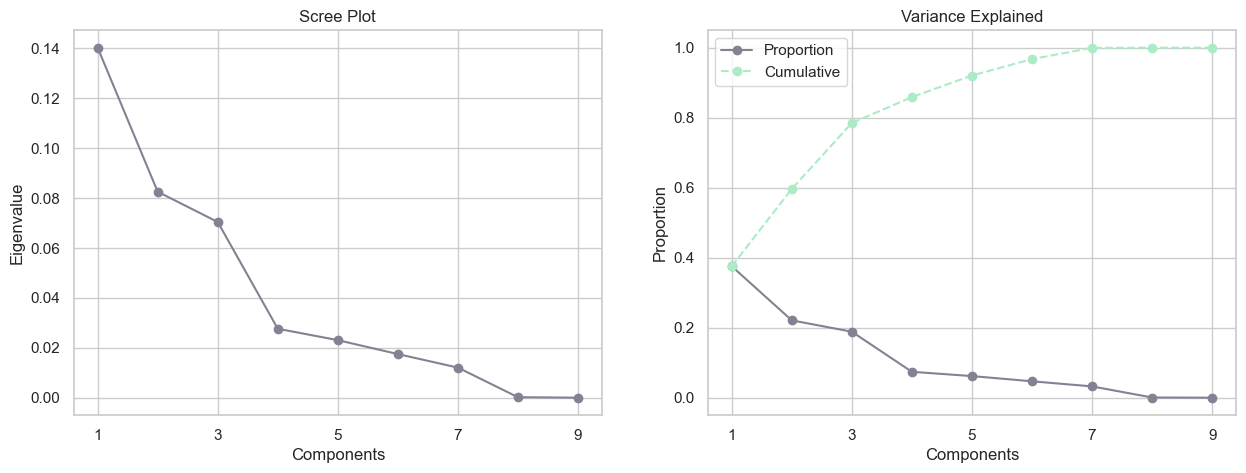

In [84]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# drawing plots
ax1.plot(pca.explained_variance_, marker = '.', markersize = 12, color = '#828293')
ax2.plot(pca.explained_variance_ratio_, marker = '.', markersize = 12, label = 'Proportion', color = '#828293')
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker = '.', markersize = 12, linestyle = '--', label = 'Cumulative',
         color = '#abebc6')

# customizations
ax2.legend()
ax1.set_title('Scree Plot')
ax2.set_title('Variance Explained')
ax1.set_ylabel('Eigenvalue')
ax2.set_ylabel('Proportion')
ax1.set_xlabel('Components')
ax2.set_xlabel('Components')
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

Analysing the two plots, we can conclude (using the elbow method) that the ideal number of principal components to retain is 4. So, we can perform PCA again with only 4 principal components. We can see that in order to explain nearly 90% of the variance we have to use 5 principal components.

In [85]:
# creating an instance of the principal component analysis and fitting to the data we have and transforming it
pca = PCA(n_components = 4, random_state = 5).fit(data_pca[metric_features])
pca_feat = pca.transform(data_pca[metric_features])

# getting the names of the principal components
pca_feat_names = [f'PC{i}' for i in range(pca.n_components_)]

# converting the pca to a dataframe
pca_df = pd.DataFrame(pca_feat, index = data_pca.index, columns = pca_feat_names)

# reassigning df_pca to contain the new created pca variables
data_pca = pd.concat([data_pca, pca_df], axis = 1)
data_pca.head()

Name  Birth_Year    Height    Weight  \
PatientID                                                       
1167       Mrs. Stephanie Gay    0.416667  0.137931  0.473684   
1805         Mr. Sherman Nero    0.500000  0.758621  0.842105   
1557          Mr. Mark Boller    0.604167  0.379310  0.491228   
1658         Mr. David Caffee    0.270833  1.000000  0.456140   
1544         Mr. Gerald Emery    0.479167  1.000000  0.315789   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1167               0.520548        0.245283       0.724138         0.066667   
1805               0.228311        0.452830       0.310345         0.000000   
1557               0.219178        0.264151       0.896552         0.000000   
1658               0.417808        0.292453       0.448276         0.266667   
1544               0.335616        0.292453       0.620690         0.066667   

                Age       BMI  ...  Checkup_Not sure  Gender_Male  Education  \
PatientID                      ...                                             
1167       0.583333  0.830206  ...               0.0          0.0        2.0   
1805       0.500000  0.945490  ...               1.0          1.0        2.0   
1557       0.395833  0.679802  ...               0.0          1.0        1.0   
1658       0.729167  0.258296  ...               1.0          1.0        5.0   
1544       0.520833  0.070444  ...               0.0          1.0        4.0   

           Drinking_Habit  Fruit_Habit  Water_Habit       PC0       PC1  \
PatientID                                                                 
1167                  2.0          0.0          2.0 -0.114206  0.506132   
1805                  1.0          0.0          2.0 -0.458097 -0.156016   
1557                  1.0          0.0          1.0 -0.233831  0.333300   
1658                  2.0          0.0          1.0  0.262606 -0.527133   
1544                  1.0          1.0          1.0  0.264567 -0.428190   

                PC2       PC3  
PatientID                      
1167      -0.220249 -0.026249  
1805      -0.236915 -0.171874  
1557       0.145707  0.078719  
1658      -0.100235 -0.043888  
1544       0.276867  0.057913  

[5 rows x 35 columns]

In [86]:
def color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #f87c7a'
    elif val > 0.45:
        color = 'background-color: #86e4b8'
    else:
        color = ''
    return color

# we can obtain the loadings (the correlation between PCs and original features) and compare the metric features with the
# principal components that we have
loadings = data_pca.corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(color_red_or_green)

Looking at this dataframe we see that `Principal Component 1` behaves almost the same as `Height` but in an inverse way, `Principal Component 2` behaves almost the same as `Birth_Year` and `Age` (so it nearly explains the age of the patients), `Principal Component 0` is the most informative component, as it is highly correlated with 4 of our metric features. We can also see that `High_Cholesterol` is not really represented by a principal component.

The problem with principal component analysis is the **interpretability**, since we cannot understand how the features we have are contributing to separate the target classes. 

Here, we can visualize in a 2-dimensional projection of the multi-dimensional dataset that we have using the principal component analysis technique, and then we visualize the contribution of each feature to the two principal components (visualization of the red and green dataframe below). "By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space… but because we’ve transformed our data in these different “directions,” we’ve made sure to keep all original variables in our model" (from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

In [87]:
# computing the first 2 principal components in order to visualize them in a plot
pca2 = PCA(n_components = 2).fit(data_pca[metric_features])
x_reduced = pca2.transform(data_pca[metric_features])
pca2_feat_names = [f'PC{i}' for i in range(pca2.n_components_)]
# transforming them in a dataframe
pca2_df = pd.DataFrame(x_reduced, index = data_pca.index, columns = pca2_feat_names)

# creating a dataframe with the 2 first principal components and the target variable
pca2_target = pd.concat([pca2_df, target_demo], axis = 1)
# defining a list with the possible values for the target
possible_target = list(pca2_target['Disease'].unique())

In [88]:
# doing the same as before, but now only with two principal components
data2_pca = pd.concat([data_pca, pca2_df], axis = 1)
data2_pca.head()

loadings2 = data_pca.corr().loc[metric_features, pca2_feat_names]
loadings2.style.applymap(color_red_or_green)

To visualize the relationships of the features to the principal components, we need to introduce feature vectors on the same PCA plane. "We can iteratively vary each individual feature keeping all other features constant and perform PCA transform for each iteration to understand the effect of that particular feature on both the principal components".

From https://github.com/anirb1nag/ML-Hobby-Projects/blob/master/Understanding%20Feature%20Mapping%20on%20Principal%20Components.ipynb

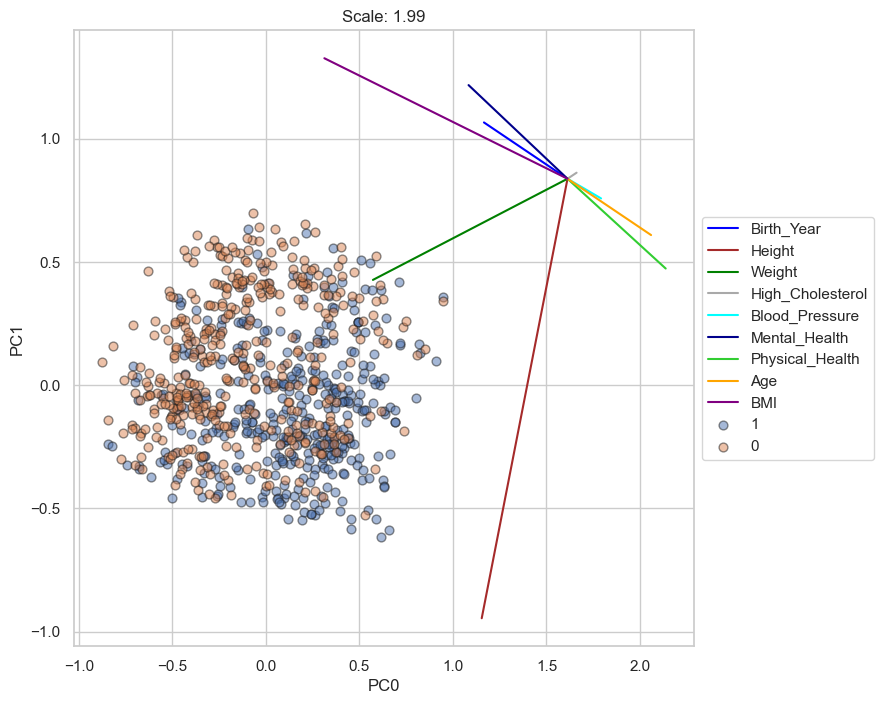

In [89]:
# getting the variations of the PC, resulting of changing the features one at a time
f = np.zeros((2, len(metric_features)))
feature_map = []
for k in range(len(metric_features)):
    fk = f.copy()
    fk[:, k] = [0, 1]
    fk_reduced = pca.transform(fk)
    feature_map += [fk_reduced]
feature_map = np.array(feature_map)

# scale of the plot
scale = 1 / np.mean(abs(feature_map))
feature_map = feature_map * scale

# style
colors = ['blue', 'brown', 'green', 'darkgray', 'cyan', 'darkblue', 'limegreen', 'orange', 'purple', 'red', 'teal']
plt.figure(figsize = (10, 8))

# plotting the feature vectors
ax = plt.subplot(111)
for k in range(len(metric_features)):
    plt.plot(feature_map[k, : , 0], feature_map[k, : , 1], color = colors[k], label = metric_features[k])

# plotting the observations
for t in range(len(possible_target)):
    plt.scatter(pca2_target[pca2_target['Disease'] == t].iloc[:, 0], pca2_target[pca2_target['Disease'] == t].iloc[:, 1],
                edgecolor = 'k', s = 40, alpha = 0.5, label = possible_target[t])

# style
plt.title('Scale: ' + str(round(scale, 2)))
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()

# shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# put a legend to the right of the current axis
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()

As we can see in the plot above, we have the whole dataset projected into the two first principal components, and we can visualize the contribution of each individual feature along these two principal components.

The length of each feature vector represents how sensitive the principal components are towards that feature, while the direction of the feature vector represent which component is getting more affected (positively or negatively) by that particular feature. These results emphasize the previous ones presented on the red and green dataframe. We can see that `Height` is affecting negatively the `Principal Component 1` (vector is pointing below, to the negative part of y-axis) and `Physical_Health` is affecting positively the `Principal Component 0` (pointing right, to the positive part of x-axis), while `BMI`, `Mental_Health` and `Weight` are pointing left, to the negative side of x-axis, meaning that they are affecting negatively the `Principal Component 0`. But, as we can see in the representation of the observations, we cannot distinguish very well the two target values using only the Principal Components (maybe because 2 PC only explain nearly 60% of the variance). So, the Principal Component approach may not be the best one. 

Site: https://medium.com/@anirbannag/how-to-make-pca-a-more-interpretable-visualization-tool-4cf8cd4e504b

<div class="alert alert-block alert-success"> <a id = "feature-selection"></a>
    
## 4. Feature selection

- [4.1. Filter methods](#filter-methods)
    - [4.1.1. Univariate variables](#univariate-variables)
    - [4.1.2. Spearman correlation](#spearman-correlation)
    - [4.1.3. ANOVA](#anova)
    - [4.1.4. Kendall's rank correlation coefficient](#kendall-s)
    - [4.1.5. Chi-square for categorical data](#chi-square)
    - [4.1.6. Mutual information for categorical data](#mutual-information)
    - [4.1.7. Visualize the weight of the dependent variable in categorical data](#weight-dependent-variable)
- [4.2. Wrapper methods](#wrapper-methods)
    - [4.2.1. RFE method](#rfe-method)
- [4.3. Embedded methods](#embedded-methods)
    - [4.3.1. Lasso regression](#lasso-regression)
    - [4.3.2. Ridge regression](#ridge-regression)
    - [4.3.3. Elastic net](#elastic-net)
    - [4.3.4. Decision tree](#feature-decision-tree)
- [Final insights](#final-insights)

[Back to TOC](#toc)

For some methods we are using in feature selection, we need to split the data in train and validation, so we will do the split and deal with the preprocessing problems after the split (using the functions defined before), like removing the outliers, filling the missing values, scaling the metric features and encoding the non-metric features.

In [90]:
# splitting our dataset into train (70%) and validation (30%)

feat_x_train, feat_x_val, feat_y_train, feat_y_val = train_test_split(data, target, test_size = 0.3, random_state = 5,
                                                                      stratify = target, shuffle = True)

In [91]:
# removing the outliers in the training dataset using the function created before

feat_x_train, feat_y_train = x_y_manual_method(feat_x_train, feat_y_train)

In [92]:
# filling the missing values with the mode using the function created before

feat_x_train, feat_x_val = train_val_input_nan_mode(feat_x_train, feat_x_val, 'Education')

In [93]:
# dividing the training and the validation datasets into numerical and non numerical data

feat_x_train_num = feat_x_train.loc[:, metric_features]
feat_x_train_nnum = feat_x_train.loc[:, non_metric_features]

feat_x_val_num = feat_x_val.loc[:, metric_features]
feat_x_val_nnum = feat_x_val.loc[:, non_metric_features]

In [94]:
# scaling the data with the MinMax scaler using the function created before

feat_x_train_num_scaled, feat_x_val_num_scaled = train_val_minmax_scaler(feat_x_train_num, feat_x_val_num, metric_features)

<a id = "filter-methods"></a>

### 4.1. Filter methods

<a id = "univariate-variables"></a>

#### 4.1.1 Univariate variables

If a feature is univariate (has 0 variance), we should drop it, since it does not provide any predictive capacity.

In [95]:
data.var()

Birth_Year           237.834129
Height                63.630749
Weight               146.736164
High_Cholesterol    2659.117390
Blood_Pressure       290.794354
Mental_Health         28.999725
Physical_Health       29.693666
Age                  237.834129
BMI                   13.386918
dtype: float64

So, in this case, there are no univariate features.

<a id = "spearman-correlation"></a>

#### 4.1.2. Spearman correlation

The spearman correlation assesses how well the relationship between two variables can be described using a monotonic function, and it is equal to the pearson correlation between the rank values of those two variables.

First we need to create a new dataframe with all the training data, but containing also the dependent variable, so we can check if any of the independent variables are correlated with the target.

In [96]:
# creating a dataframe with the scaled metric features and the dependent variable

all_train_num = feat_x_train_num_scaled.join(feat_y_train)
all_train_num.head()

Birth_Year    Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                                     
1961         0.382979  0.137931  0.192982          0.278539        0.056604   
1045         0.723404  0.793103  0.631579          0.228311        0.433962   
2006         0.382979  0.551724  0.666667          0.194064        0.433962   
1806         0.404255  0.931034  0.473684          0.342466        0.528302   
1134         0.468085  0.793103  0.701754          0.417808        0.132075   

           Mental_Health  Physical_Health       Age       BMI  Disease  
PatientID                                                               
1961            0.379310         0.133333  0.617021  0.323535        1  
1045            0.827586         0.000000  0.276596  0.618307        1  
2006            0.724138         0.000000  0.617021  0.836323        1  
1806            0.310345         0.066667  0.595745  0.317330        0  
1134            0.655172         0.000000  0.531915  0.718822        1

In [97]:
def spearman_correlation(all_num_scaled):

    # defining a function to plot the correlation between the variables
    def cor_heatmap(cor):
        plt.figure(figsize = (12, 10))
        sns.heatmap(data = cor, annot = True, cmap = sns.diverging_palette(100, 20, as_cmap = True), fmt = '.1')
        plt.show()

    # defining the correlation table
    cor_spearman = all_num_scaled.corr(method = 'spearman')

    # calling the function above to plot the correlation table
    return cor_heatmap(cor_spearman)

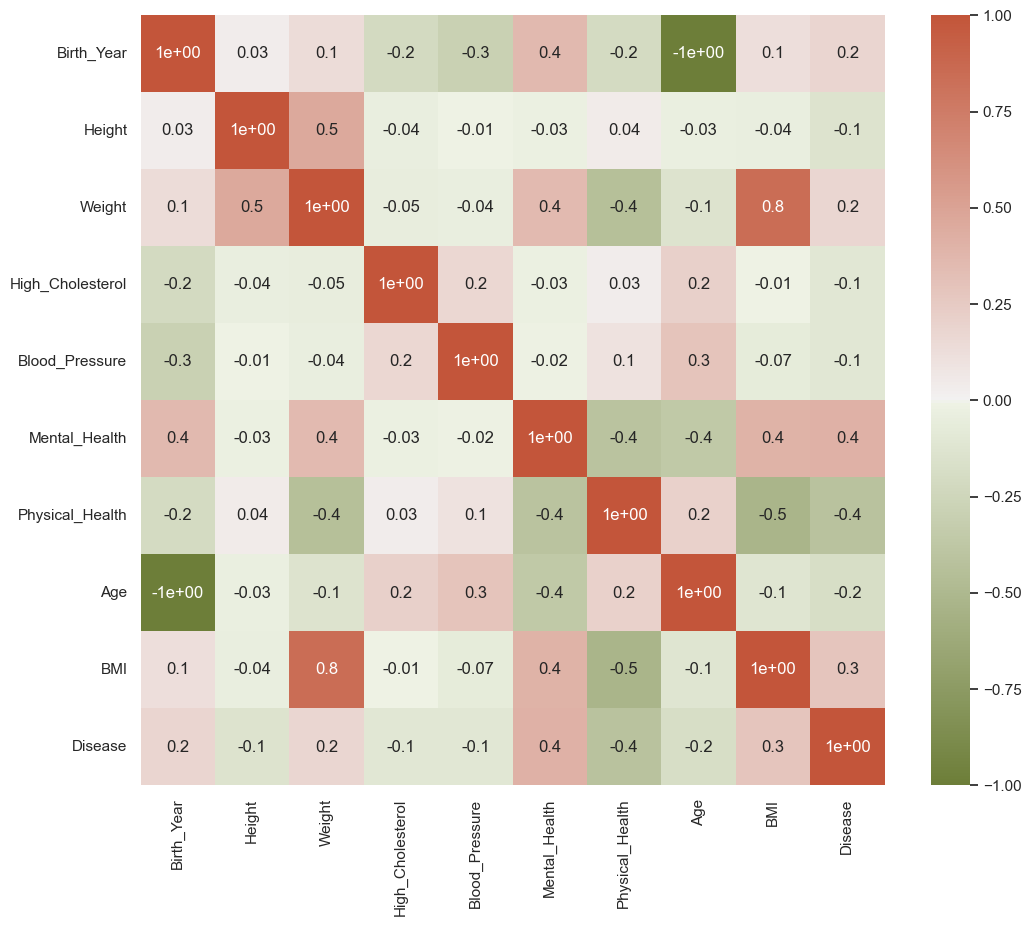

In [98]:
spearman_correlation(all_train_num)

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - `Weight` vs `BMI` (0.8) <br>
    - `Age` vs `Birth_Year` (-1) <br>

<a id = "anova"></a>

#### 4.1.3. ANOVA

ANOVA is a method that checks if the mean of two or more groups are significantly different from each other. The null-hypothesis is: the means of all groups are equal; and the alternative-hypothesis is: at least one mean of one group is different. So, if the mean of a metric feature regarding one category of the target is significantly different from the mean of the same metric feature regarding the other target category, we conclude that the feature has impact on the target, so we should keep it for the model training. And the other way around.

We want to use features that have the highest possible F-score and the lowest possible p-value (if the p-value is lower than the statistical significance, in this case we will consider 5%, we reject the null-hypothesis, meaning that we have statistical evidence that at least one mean of one group is different, which is good for the predictive capacity of our feature).

https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w

In [99]:
# creating a SelectKBest instance to select features with best ANOVA F-Values
anova_selector = SelectKBest(score_func = f_classif, k = 'all')

# applying the selector to the features and target
anova_selector.fit(feat_x_train_num_scaled, feat_y_train)

SelectKBest(k='all')

In [100]:
# assigning the values to a dataframe

anova = pd.DataFrame(data = (anova_selector.scores_, anova_selector.pvalues_), columns = feat_x_train_num_scaled.columns, index = ['ANOVA F-statistic', 'ANOVA p-value'])
anova

Birth_Year     Height     Weight  High_Cholesterol  \
ANOVA F-statistic    15.17284  15.713804  14.293966          3.614313   
ANOVA p-value         0.00011   0.000083   0.000174          0.057809   

                   Blood_Pressure  Mental_Health  Physical_Health       Age  \
ANOVA F-statistic        9.814862   1.075276e+02     1.243680e+02  15.17284   
ANOVA p-value            0.001824   3.989286e-23     3.605297e-26   0.00011   

                            BMI  
ANOVA F-statistic  4.907843e+01  
ANOVA p-value      7.240804e-12

Here we have the F-statistic and the p-value for each feature. So, looking at the p-values we conclude that we reject the null-hypothesis for all features at a 5% level of significance, meaning that we have statistical evidence that at least the means of the patients with the disease and the mean of the patients without the disease for every metric feature are different. Looking at the variable `High_Cholesterol`, we can say that we will almost not reject the null-hypothesis (the p-value is really close to the significance level), so we should not include this feature in the model.

<a id = "kendall-s"></a>

#### 4.1.4. Kendall's rank correlation coefficient

The strength of the association between two variables is known as the correlation test, and we can measure non-parametric correlation (non-linear dependences) with Kendall (tau), measuring how likely it is for two variables to move in the same direction, but not necessarily at a constant rate. The Kendall's rank correlation coefficient is the test statistic when we want to test if two variables are statistically dependent. This test is non-parametric, so we do not need to depend on the distributions of the variables. Under the null-hypothesis, we have independence of X and Y, so the distribution of tau has mean of 0. 

https://www.phdata.io/blog/data-science-stats-review/

In [101]:
# calculating Kendall correlation

kendall_tau_list = []
kendall_p_list = []
for feature in feat_x_train_num_scaled:
    tau, p_value = stats.kendalltau(feat_x_train_num_scaled[feature], feat_y_train)
    kendall_tau_list.append(tau)
    kendall_p_list.append(p_value)

In [102]:
# assigning the values to a dataframe

kendall = pd.DataFrame(data = (kendall_tau_list, kendall_p_list), columns = feat_x_train_num_scaled.columns, index = ['Kendall coefficient', 'Kendall p-value'])
kendall

Birth_Year    Height    Weight  High_Cholesterol  \
Kendall coefficient    0.151985 -0.118670  0.145543         -0.086521   
Kendall p-value        0.000018  0.001032  0.000037          0.013479   

                     Blood_Pressure  Mental_Health  Physical_Health       Age  \
Kendall coefficient       -0.088075   3.462007e-01    -3.631991e-01 -0.151985   
Kendall p-value            0.014053   4.392517e-22     2.038426e-22  0.000018   

                              BMI  
Kendall coefficient  2.346549e-01  
Kendall p-value      1.803978e-11

So, looking at the p-values of the test, we conclude that we reject the null hypothesis for all features at a 5% significance level (meaning that we have statistical evidence that all features and the target are statistically dependent). Therefore, we consider that this test does not discard any metric variable.

However, as this test is based on the ranked values of each variable, it will work with numerical features, but it can also be used with ordinal features.

In [103]:
# calculating Kendall correlation for the ordinal features
ordinal_kendall_tau_list = []
ordinal_kendall_p_list = []
for feature in oe(feat_x_train_nnum, ordinal_features)[ordinal_features]:
    tau, p_value = stats.kendalltau(oe(feat_x_train_nnum, ordinal_features)[feature], feat_y_train)
    ordinal_kendall_tau_list.append(tau)
    ordinal_kendall_p_list.append(p_value)
    
# assigning the values to a dataframe
ordinal_kendall = pd.DataFrame(data = (ordinal_kendall_tau_list, ordinal_kendall_p_list), columns = oe(feat_x_train_nnum, ordinal_features)[ordinal_features].columns, index = ['Kendall coefficient', 'Kendall p-value'])
ordinal_kendall

Education  Drinking_Habit   Fruit_Habit  Water_Habit
Kendall coefficient  -0.040759    2.296672e-01 -4.298502e-01     0.015399
Kendall p-value       0.289636    6.006385e-08  7.032687e-27     0.708673

We do not reject the null-hypothesis for the variables `Education` and `Water_Habit` at a 5% significance level, because their p-values are bigger than 0.05. So, we consider that these variables and the target are statistically independent, therefore they are not important predictors.

<a id = "chi-square"></a>

#### 4.1.5. Chi-square for categorical data

We can check the importance of the non metric independent variables in the target. So, we will defnie a function that will follow the steps of chi-square to check if a independent variable is an important predictor.

In [104]:
def TestIndependence(x, y, variable, alpha = 0.05):   
    
    # firstly we compute a simple cross tabulation
    dfObserved = pd.crosstab(y, x)
    
    # then we perform the chi-square test of independence of the variables in the contingency table
    # we get the test statistic, the p-value of the test, the degrees of fredoom and the expected frequencies
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # then we transform the expected frequencies, based on the marginal sums of the table, into a pandas dataframe
    dfExpected = pd.DataFrame(expected, columns = dfObserved.columns, index = dfObserved.index)
    
    # and we make the decision of either the variable is helpful or not
    if p < alpha:
        result = "{0} is IMPORTANT for prediction".format(variable)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(variable)
        
    print(result)

In [105]:
for variable in feat_x_train_nnum:
    TestIndependence(feat_x_train_nnum.loc[:, variable], feat_y_train, variable)

Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is NOT an important predictor. (Discard Smoking_Habit from model)
Drinking_Habit is IMPORTANT for prediction
Exercise is IMPORTANT for prediction
Fruit_Habit is IMPORTANT for prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for prediction
Diabetes is IMPORTANT for prediction
Gender is IMPORTANT for prediction


According to chi-square, we should discard for the final model `Name`, `Region`, `Education`, `Smoking_Habit` and `Water_Habit`.

<a id = "mutual-information"></a>

#### 4.1.6. Mutual information for categorical data

Mutual information measures the entropy drops under the condition of the target value (https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8). The higher the value of mutual information, the better, because it means that the relationship between that certain feature and the target is close. Mutual information is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

$$ MI(feature;target) = Entropy(feature) - Entropy(feature|target) $$

The problem with mutual information is that mutual information is not a metric and is not normalized, so it is difficult to compare it in different datasets, etc.

In [106]:
# creating a function to plot the importance of the features

def plot_importance(coef, name):
    
    # sorting the values of the coefficients given by the lasso regression
    imp_coef = coef.sort_values()
    
    # ploting the figures
    plt.figure(figsize = (6, 6))
    imp_coef.plot(kind = 'barh', color = '#8d99ae')
    plt.title('Feature importance using ' + name + ' model')
    plt.show()

As we saw with chi-square we can discard the variable `Name`. Also, with common sense we can understand that this variable will not be a good predictor for whether a patient has the disease or not, since it is a unique identifier of the patient. So, in our further analysis (including for mutual information), we will not use this variable.

Since this algorithm uses distances ("The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in [2] and [3]", *scikit-learn* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) we cannot use ordinal encoding to all non-metric variables, so we have to properly encode them.

In [107]:
# encoding properly the non-metric features (and dropping Name, because we are not using it)

feat_x_train_nnum_encoded, feat_encoded = ohc(feat_x_train_nnum, categorical_features)
feat_x_train_nnum_encoded = oe(feat_x_train_nnum_encoded, ordinal_features)
feat_x_train_nnum_encoded.drop('Name', axis = 1, inplace = True)
feat_x_train_nnum_encoded.head().T

PatientID                                           1961  1045  2006  1806  \
Region_East of England                               0.0   0.0   0.0   0.0   
Region_London                                        0.0   0.0   0.0   0.0   
Region_North East                                    0.0   0.0   0.0   0.0   
Region_North West                                    0.0   0.0   0.0   0.0   
Region_South East                                    0.0   1.0   0.0   0.0   
Region_South West                                    0.0   0.0   0.0   0.0   
Region_West Midlands                                 0.0   0.0   0.0   1.0   
Region_Yorkshire and the Humber                      0.0   0.0   1.0   0.0   
Smoking_Habit_Yes                                    0.0   0.0   1.0   0.0   
Exercise_Yes                                         0.0   0.0   0.0   1.0   
Diabetes_I don't have diabetes, but I have dire...   0.0   0.0   0.0   0.0   
Diabetes_I have/had pregnancy diabetes or borde...   0.0   0.0   1.0   0.0   
Diabetes_Neither I nor my immediate family have...   1.0   1.0   0.0   1.0   
Checkup_Less than three months                       0.0   0.0   0.0   0.0   
Checkup_More than 3 years                            1.0   1.0   1.0   0.0   
Checkup_Not sure                                     0.0   0.0   0.0   0.0   
Gender_Male                                          0.0   1.0   1.0   1.0   
Education                                            2.0   1.0   5.0   3.0   
Drinking_Habit                                       1.0   2.0   1.0   1.0   
Fruit_Habit                                          0.0   0.0   0.0   1.0   
Water_Habit                                          2.0   2.0   1.0   1.0   

PatientID                                           1134  
Region_East of England                               0.0  
Region_London                                        0.0  
Region_North East                                    0.0  
Region_North West                                    0.0  
Region_South East                                    0.0  
Region_South West                                    0.0  
Region_West Midlands                                 0.0  
Region_Yorkshire and the Humber                      0.0  
Smoking_Habit_Yes                                    0.0  
Exercise_Yes                                         0.0  
Diabetes_I don't have diabetes, but I have dire...   0.0  
Diabetes_I have/had pregnancy diabetes or borde...   0.0  
Diabetes_Neither I nor my immediate family have...   0.0  
Checkup_Less than three months                       0.0  
Checkup_More than 3 years                            0.0  
Checkup_Not sure                                     1.0  
Gender_Male                                          1.0  
Education                                            5.0  
Drinking_Habit                                       2.0  
Fruit_Habit                                          0.0  
Water_Habit                                          2.0

In [108]:
# computing mutual information scores for all the non metric features, encoded with ordinal encoder
mi_score = mutual_info_classif(feat_x_train_nnum_encoded, feat_y_train, random_state = 5, discrete_features = True)

# assigning the coefficients to the features in a pandas series
mi_coef = pd.Series(mi_score, index = feat_x_train_nnum_encoded.columns)
mi_coef

Region_East of England                                                                 6.469226e-04
Region_London                                                                          9.272669e-07
Region_North East                                                                      8.265338e-04
Region_North West                                                                      7.049754e-04
Region_South East                                                                      1.838349e-05
Region_South West                                                                      1.060903e-04
Region_West Midlands                                                                   1.098742e-03
Region_Yorkshire and the Humber                                                        4.742359e-05
Smoking_Habit_Yes                                                                      3.296158e-04
Exercise_Yes                                                                           9.711271e-02


In [109]:
print('Mutual Information picked ' + str(sum(mi_coef != 0)) + ' variables and eliminated the other ' +  str(sum(mi_coef == 0)) + ' variables')

Mutual Information picked 21 variables and eliminated the other 0 variables


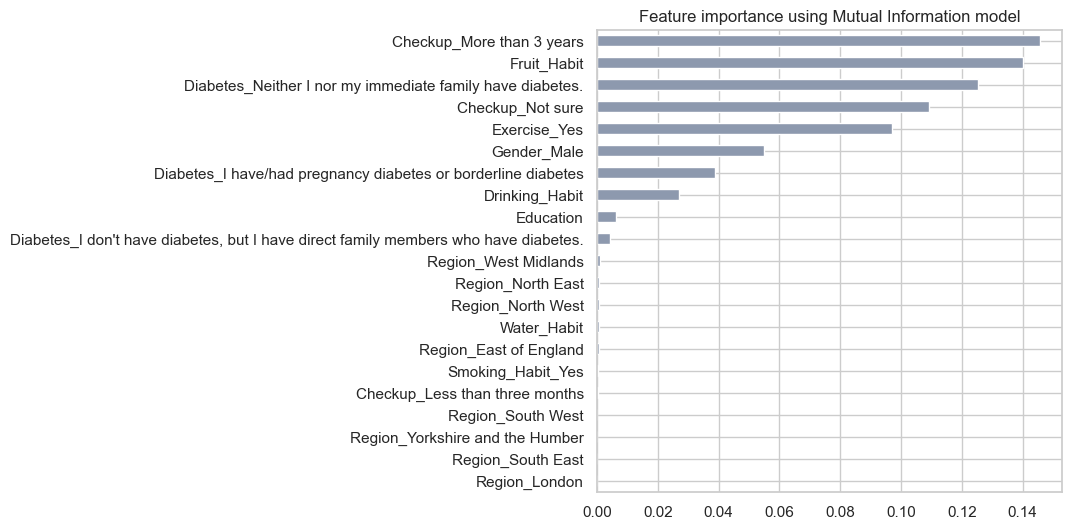

In [110]:
# applying our function

plot_importance(mi_coef, 'Mutual Information')

According to Mutual Information, we should discard `Water_Habit`, `Smoking_Habit`, and `Region`, since they have mutual information of 0, meaning that they are independent of the target. Also, we can look the same way for `Education` (with mutual information very close to 0). `Exercise` and `Fruit_Habit` seem the most important features regarding the mutual information coefficient. Also, `Diabetes` and `Checkup` behave in the same way, as they have two categories that are considered important and one category that is not considered important at all. Therefore, we should keep them.

<a id = "weight-dependent-variable"></a>

#### 4.1.7. Visualize the weight of the dependent variable in categorical data

We can create two plots to check the weight that the dependent variable has in the different labels of a categorical variable, for example the weight that `Disease` has in the different `Gender` categories. The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the dependent variable in each category.

In [111]:
def bar_charts_categorical(df, feature, target):
    
    # we are doing cross tabulation between the specific cathegorical variable and the target
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[: -1]
     
    # start of visualization
    fig = plt.figure(figsize = (15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color = '#8d99ae')
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom = cont_tab.iloc[:-1, 0], color = '#abebc6') 
    plt.legend((p2[0], p1[0]), ('Disease', 'No disease'))
    plt.title('Frequency bar chart')
    plt.xlabel(feature)
    plt.ylabel('$Frequency$')
    plt.xticks(rotation = 'vertical')

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color = '#8d99ae')
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom = obs_pct[0], color = '#abebc6')
    plt.legend((p2[0], p1[0]), ('Disease', 'No disease'))
    plt.title('Proportion bar chart')
    plt.xlabel(feature)
    plt.ylabel('$Proportion$')
    plt.xticks(rotation = 'vertical')

    plt.show()
    # end of visualization

In [112]:
# creating a dataframe with the non-metric features and the dependent variable

all_train_nnum = feat_x_train_nnum.iloc[:, 1:].join(feat_y_train)
all_train_nnum.head()

Region  \
PatientID                             
1961                  East Midlands   
1045                     South East   
2006       Yorkshire and the Humber   
1806                  West Midlands   
1134                  East Midlands   

                                             Education Smoking_Habit  \
PatientID                                                              
1961       High School Incomplete (10th to 11th grade)            No   
1045              Elementary School (1st to 9th grade)            No   
2006             University Complete (3 or more years)           Yes   
1806                              High School Graduate            No   
1134             University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1961        I consider myself a social drinker       No   
1045       I usually consume alcohol every day       No   
2006        I consider myself a social drinker       No   
1806        I consider myself a social drinker      Yes   
1134       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1961       Less than 1. I do not consume fruits every day.   
1045       Less than 1. I do not consume fruits every day.   
2006       Less than 1. I do not consume fruits every day.   
1806                     1 to 2 pieces of fruit in average   
1134       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  \
PatientID                                                   
1961                     Between one liter and two liters   
1045                     Between one liter and two liters   
2006       More than half a liter but less than one liter   
1806       More than half a liter but less than one liter   
1134                     Between one liter and two liters   

                                          Checkup  \
PatientID                                           
1961                            More than 3 years   
1045                            More than 3 years   
2006                            More than 3 years   
1806       Less than 3 years but more than 1 year   
1134                                     Not sure   

                                                    Diabetes  Gender  Disease  
PatientID                                                                      
1961        Neither I nor my immediate family have diabetes.  Female        1  
1045        Neither I nor my immediate family have diabetes.    Male        1  
2006       I have/had pregnancy diabetes or borderline di...    Male        1  
1806        Neither I nor my immediate family have diabetes.    Male        0  
1134                                      I do have diabetes    Male        1

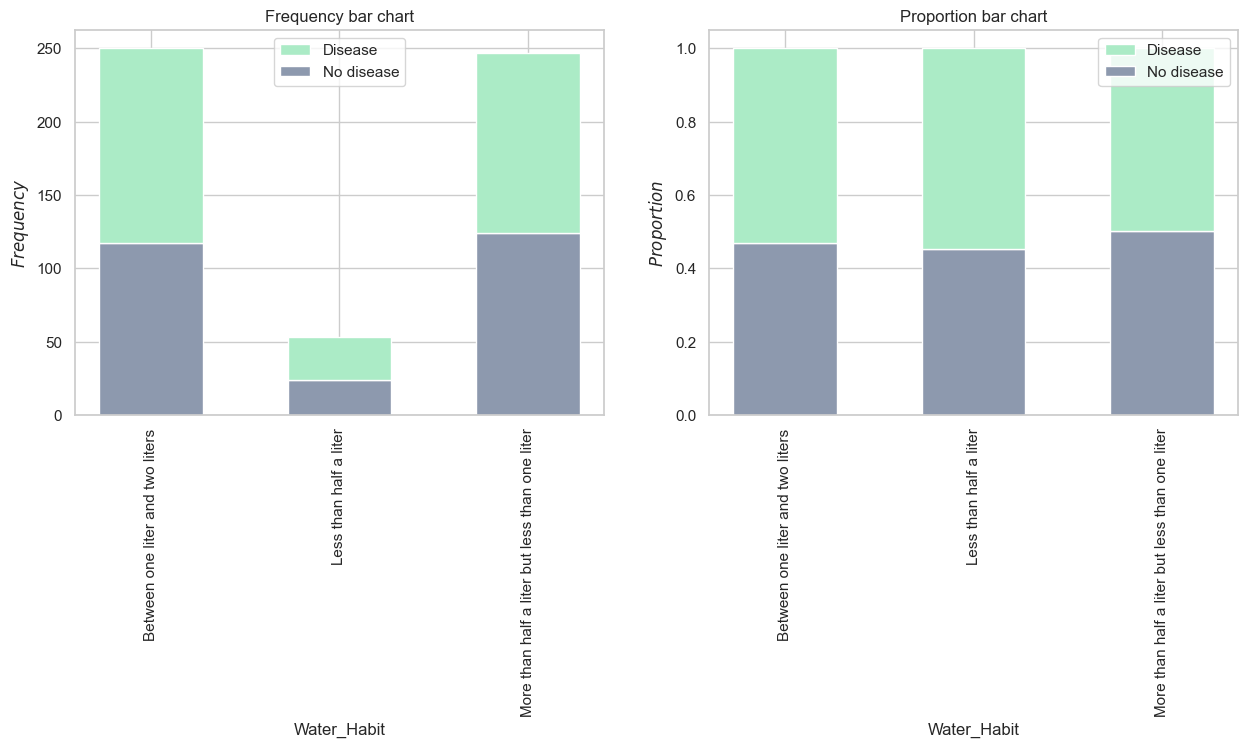

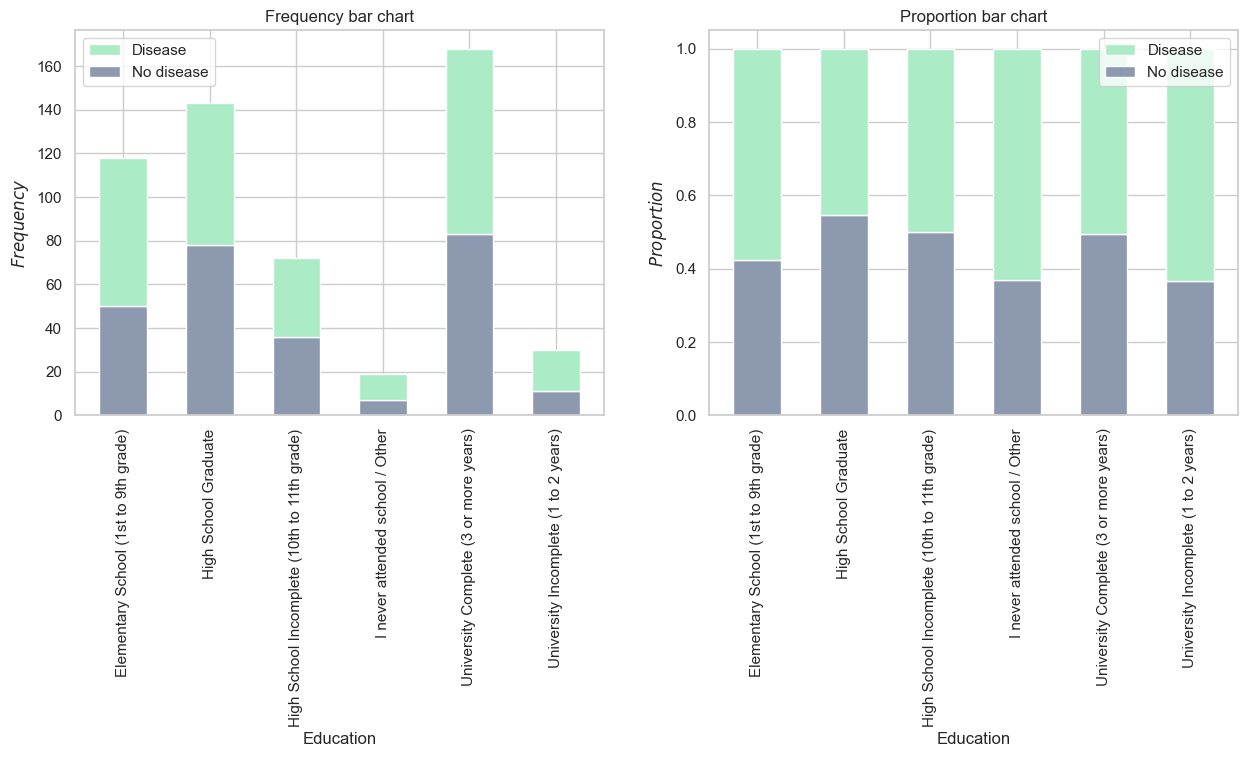

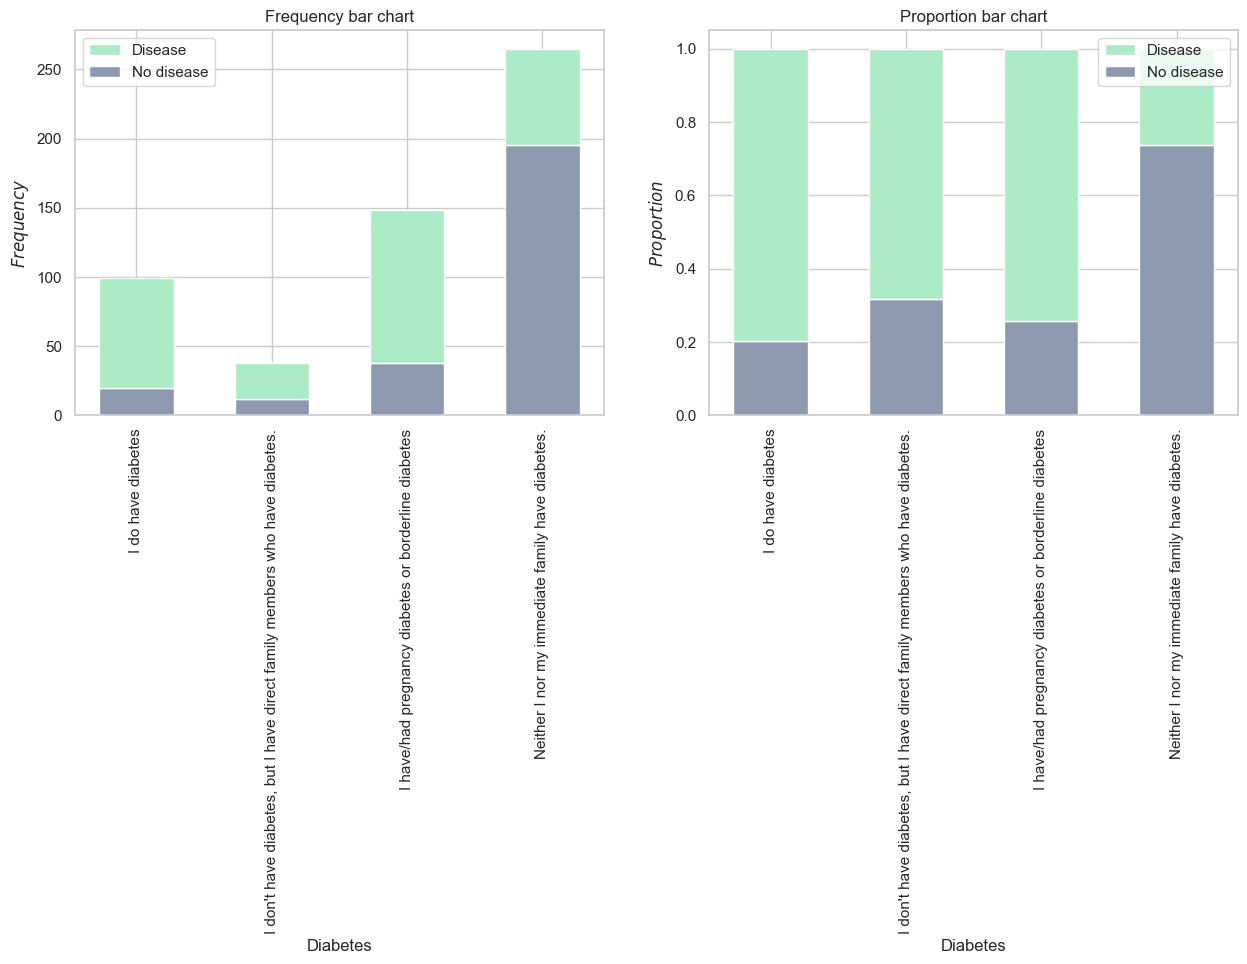

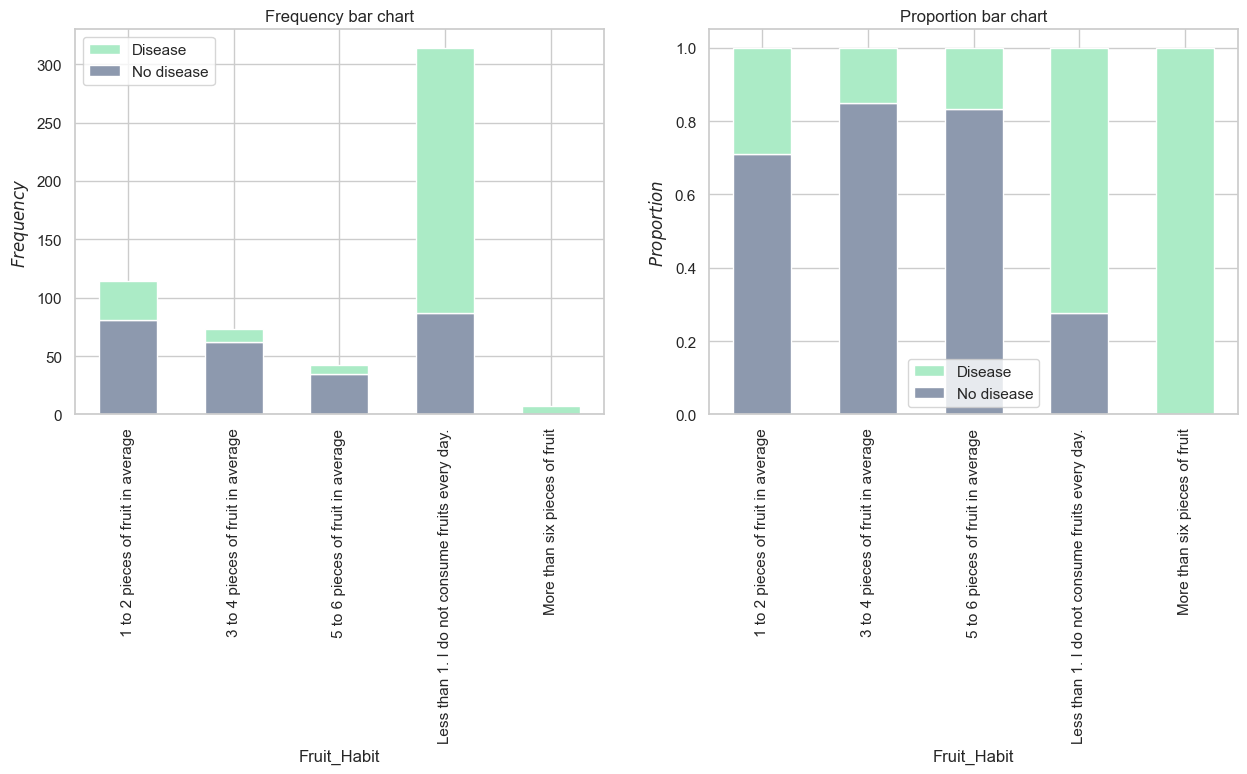

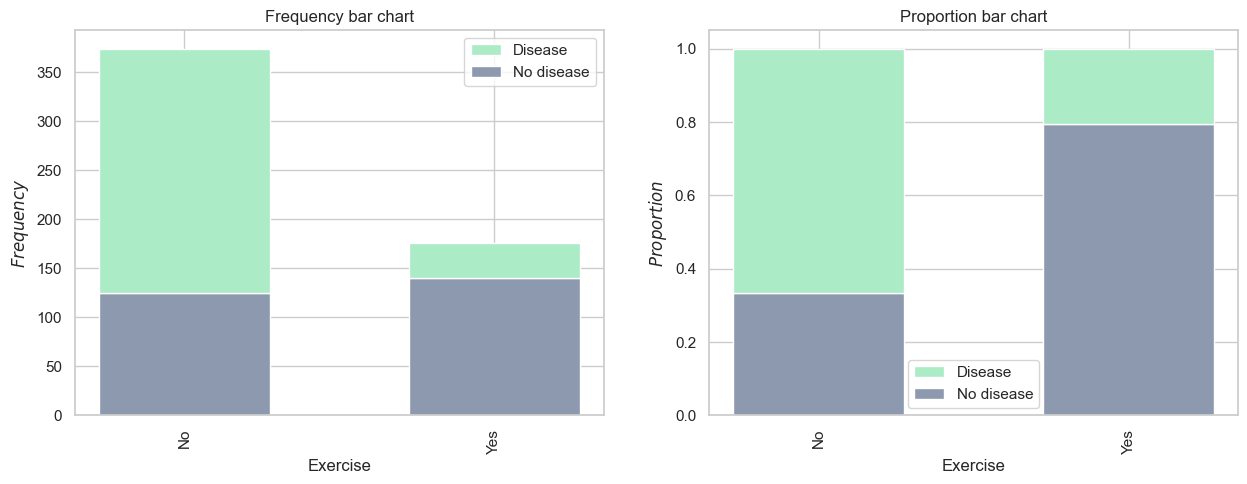

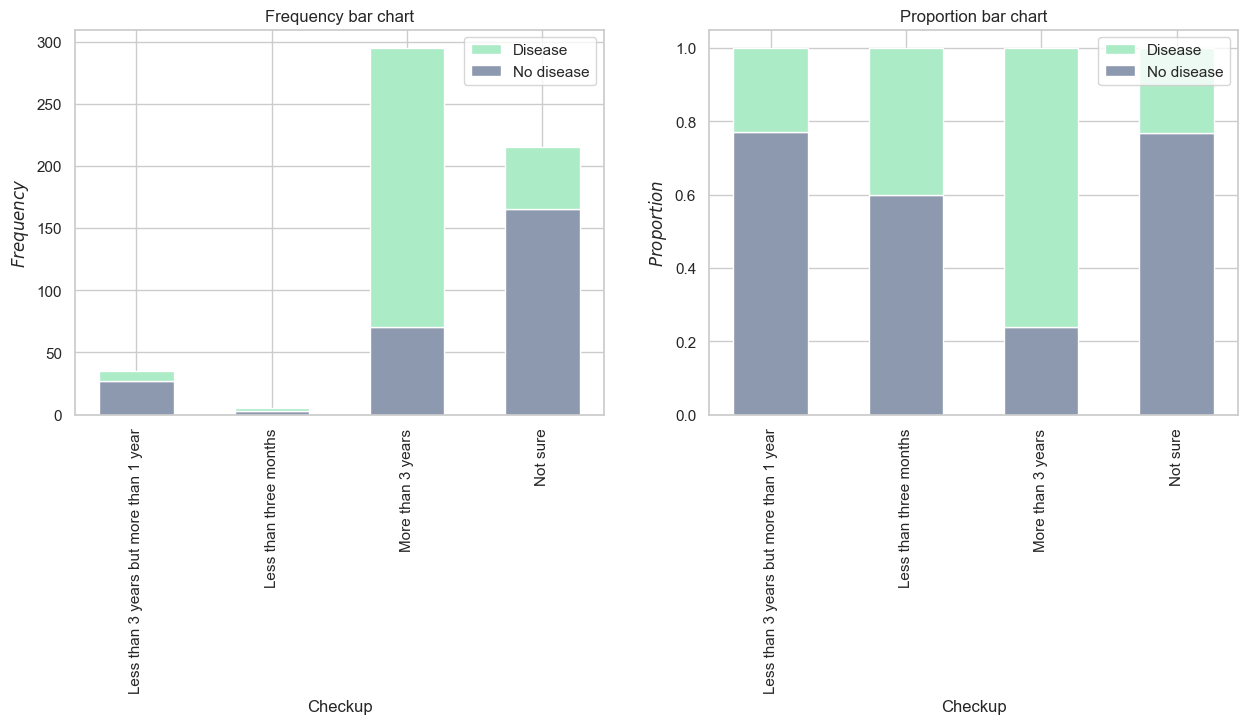

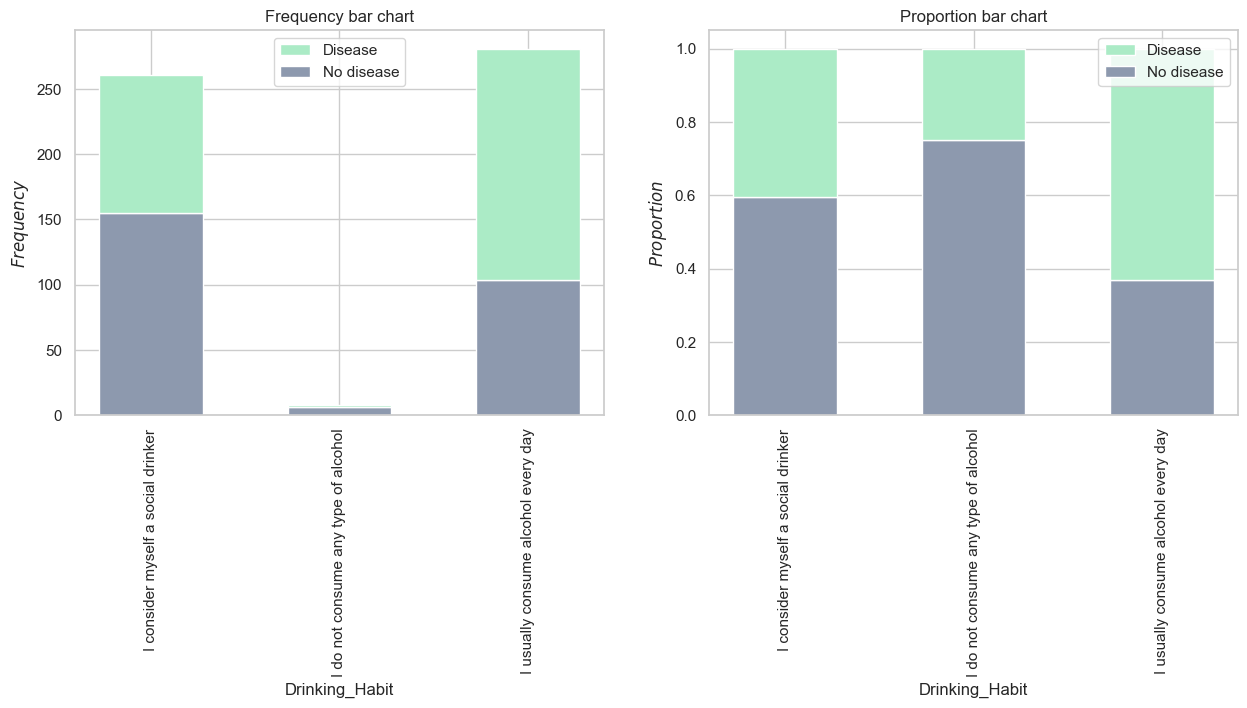

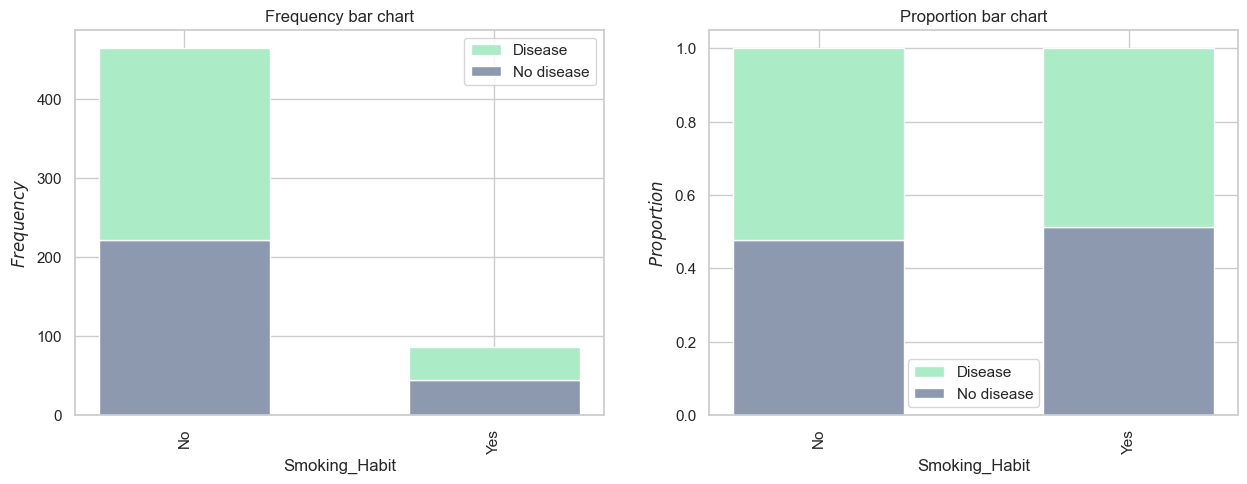

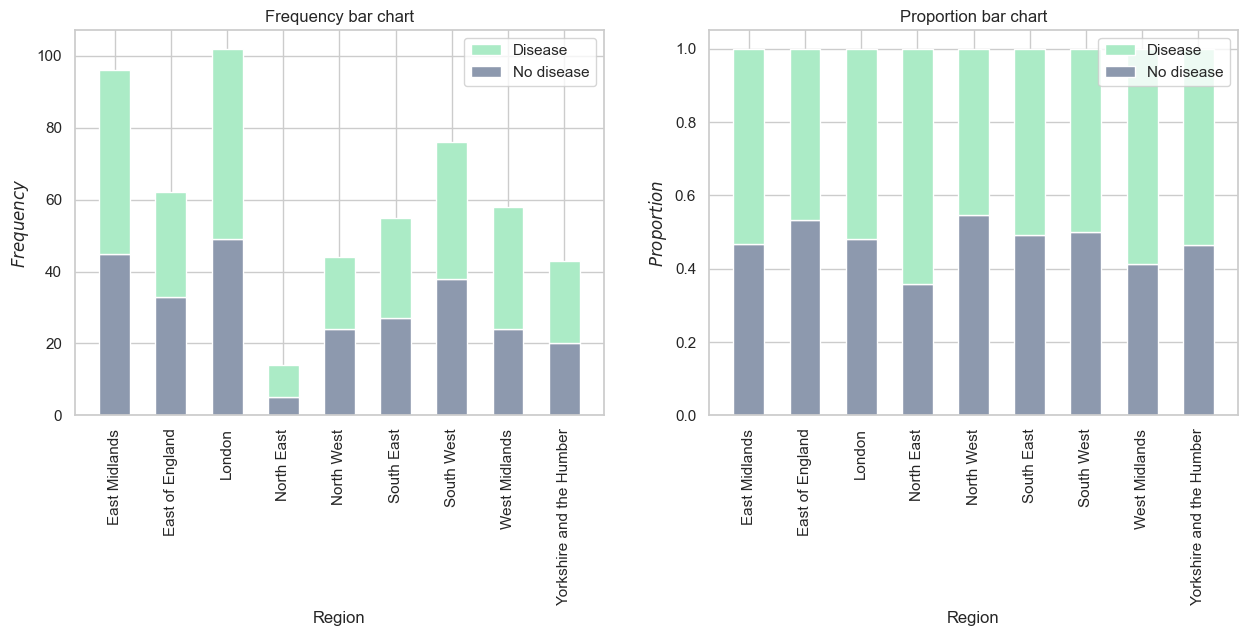

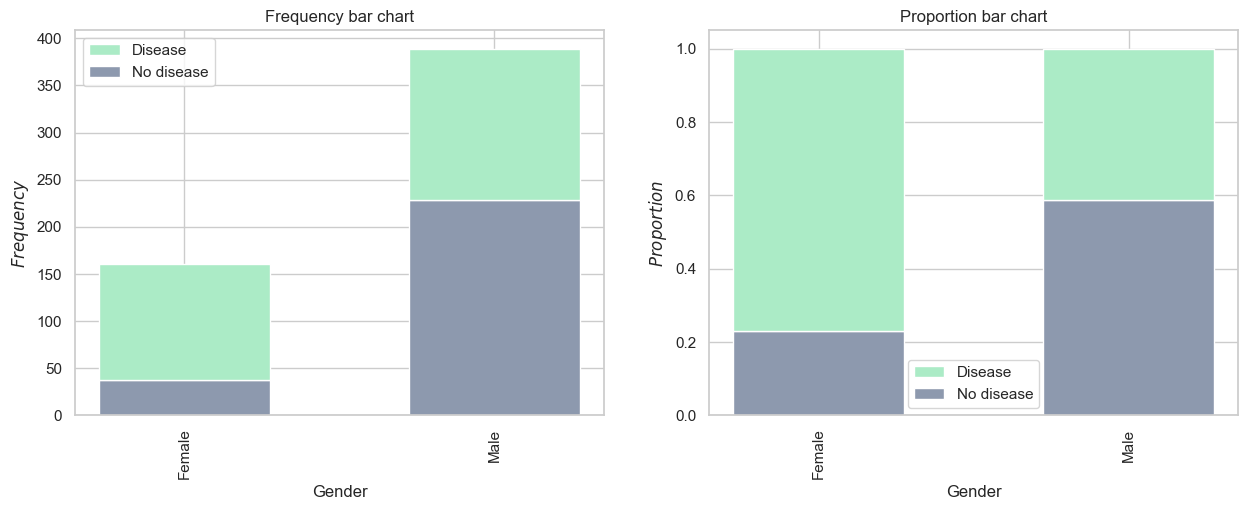

In [113]:
# applying the function

for feature in non_metric_features_name:
    bar_charts_categorical(all_train_nnum, feature, 'Disease')

Using this method we can see the proportion of disease in each category of the non metric features. So, for each variable we can see:
- For the alcohol, we can say that the group which consumes alcohol every day has a slightly bigger proportion of patients with the disease than the others, so maybe `Drinking_Habit` can help to predict the target.
- People that don't exercise at least 3 times per week have higher probability to have the disease than the ones that do so, therefore maybe `Exercise` is an important variable to predict the target.
- As we can see we do not have a specific type of water consuming that has significantly larger proportion of patients with the disease, so maybe `Water_Habit` is not an important variable to predict the target.
- The same happens with `Education`.
- The same happens with `Smoking_Habit`.
- As we can see we do not have a specific region that has significantly larger proportion of patients with the disease, so maybe `Region` is not an important variable to predict the target.
- People that do not visit the doctor for more than 3 years have higher probability to have the disease than the others, so maybe `Checkup` is an important variable to predict the target.
- People that eat lots of fruit per day and people that do not eat fruit at all are the two groups where the presence of the disease is higher (which is strange), so we can extrapolate that maybe `Fruit_Habit` can predict the target.
- For the variable diabetes, we cannot conclude clearly, since we have a specific group (the group that neither them or their family have diabetes) that clearly have a greater tendency for not having the disease, but the other groups are really tight in terms of performance. So, maybe `Diabetes` can be important to predict the target, but we cannot be sure.
- Finally, Females have higher probability to have the disease than males, so maybe `Gender` is an important variable to predict the target.

<a id = "wrapper-methods"></a>

### 4.2. Wrapper methods

<a id = "rfe-method"></a>

#### 4.2.1. RFE method

We don't know *apriori* the number of features to select, so we will use RFE (Recursive Feature Elimination) that will allow us to select the most important features to keep. We will create a loop to check the score of the estimator using a different number of features.

Given an external estimator that assigns weights to features (in this case we will use a logistic regression), the goal of recursive feature elimination is to select features by recursively considering smaller and smaller sets of features. First the model is trained with all the features available and then, by importance of the features, they are successively dropped until the desired number of features is reached.

In [114]:
# defining a function that, given a machine learning model, gives us the ideal number of features to use

def number_features(model):
    
    # number of features (we will try from using 1 feature to using 19 features)
    nof_list = list(range(1, 20))
    high_score = 0

    # variable to store the optimum features
    nof = 0           
    f1score_list = []

    for n in nof_list:

        # creating a RFE instance in which the estimator is our model passed to the function
        rfe = RFE(model, n_features_to_select = n).fit(feat_x_train_num_scaled, feat_y_train)

        # first we select the most important features and we got the most important features to keep in the model
        feat_x_train_rfe = rfe.transform(feat_x_train_num_scaled)
        feat_x_val_rfe = rfe.transform(feat_x_val_num_scaled)

        # then, knowing the features to keep, we apply the model with the desired variables
        model.fit(feat_x_train_rfe, feat_y_train)
        
        # getting the values that the model predicted for the validation dataset
        feat_y_val_pred = model.predict(feat_x_val_rfe)
        
        # calculating the f1 score for the model and storing it in the list
        value = f1_score(feat_y_val, feat_y_val_pred)
        f1score_list.append(value)
        
        # and we want to keep track of what is the model with the highest score, because that is the perfect number of features
        if(value > high_score):
            high_score = value
            nof = nof_list[n]

    print('Optimum number of features: %d' % nof)
    print('F1-score with %d features: %f' % (nof, high_score))

In [115]:
# defining a function that, given a machine learning model and the ideal number of features to use, gives us the features to keep

def select_features(number_features, model):
    
    # creating a RFE instance with number of features, since we aleady know that is the ideal number of features (previous func)
    rfe = RFE(estimator = model, n_features_to_select = number_features).fit(X = feat_x_train_num_scaled, y = feat_y_train)

    # then, we transform the data using RFE by applying the method fit_transform()
    feat_x_rfe = rfe.transform(feat_x_train_num_scaled)

    # we can see the variables that were selected by RFE as the most "important" ones by calling the attribute support_ 
    # and the feature ranking by calling the attribute ranking_
    selected_features = pd.DataFrame(np.concatenate((rfe.ranking_.reshape(-1, 1), rfe.support_.reshape(-1, 1)), axis = 1), 
                                     columns = ['Ranking', 'Selected'], index = feat_x_train_num_scaled.columns)
    return selected_features

In [116]:
# creating a logistic regression classifier instance
lr = LogisticRegression()

# calling the defined function to see what is the best number of features to keep
number_features(lr)

Optimum number of features: 7
F1-score with 7 features: 0.775194


In [117]:
# since we know the optimum number of features to keep is 8, we call the defined function to know what are the more important

select_features(7, lr)

Ranking  Selected
Birth_Year              2         0
Height                  1         1
Weight                  1         1
High_Cholesterol        1         1
Blood_Pressure          1         1
Mental_Health           1         1
Physical_Health         1         1
Age                     3         0
BMI                     1         1

According to RFE, combined with a logistic regression, the numerical variables that we should discard for the final model are `Birth_Year` and `Age`.

In [118]:
# creating a decision tree classifier instance
dt = DecisionTreeClassifier(random_state = 5)

# calling the defined function to see what is the best number of features to keep
number_features(dt)

Optimum number of features: 6
F1-score with 6 features: 0.968000


In [119]:
# since we know the optimum number of features to keep is 5, we call the defined function to know what are the more important

select_features(5, dt)

Ranking  Selected
Birth_Year              4         0
Height                  2         0
Weight                  5         0
High_Cholesterol        1         1
Blood_Pressure          1         1
Mental_Health           1         1
Physical_Health         1         1
Age                     1         1
BMI                     3         0

According to RFE, for a decision tree, the numerical variables that we should discard for the final model are `Height`, `Weight`, `Birth_Year` and `BMI`.

<a id = "embedded-methods"></a>

### 4.3. Embedded methods

<a id = "lasso-regression"></a>

#### 4.3.1. Lasso regression

The idea of using Lasso regression for feature selection purposes is: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0. By trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features (assigning their coefficients to 0).

In [120]:
# creating a lasso regression instance
lasso_reg = LassoCV(random_state = 5)

# fitting the data to reg
lasso_reg.fit(feat_x_train_num_scaled, feat_y_train)

# assigning the coefficients to the features in a pandas series
lasso_coef = pd.Series(lasso_reg.coef_, index = feat_x_train_num_scaled.columns)
lasso_coef

Birth_Year         -0.000000
Height             -0.261788
Weight              0.000000
High_Cholesterol   -0.207361
Blood_Pressure     -0.207994
Mental_Health       0.772835
Physical_Health    -0.828271
Age                 0.000000
BMI                 0.014607
dtype: float64

In [121]:
print('Lasso picked ' + str(sum(lasso_coef != 0)) + ' variables and eliminated the other ' +  str(sum(lasso_coef == 0)) + ' variables')

Lasso picked 6 variables and eliminated the other 3 variables


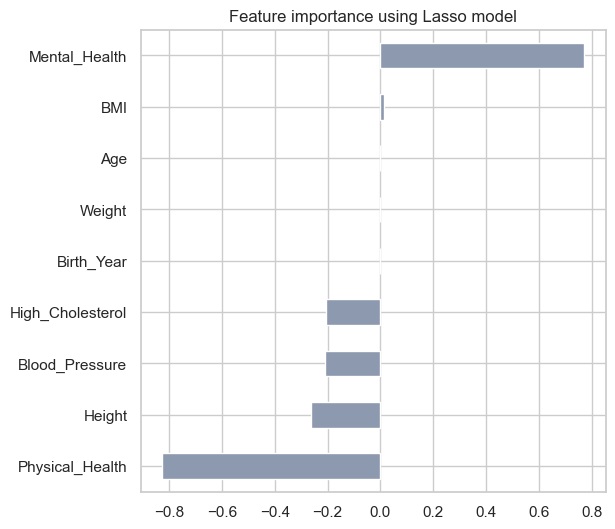

In [122]:
# calling the function to plot the importance of the features

plot_importance(lasso_coef, 'Lasso')

<a id = "ridge-regression"></a>

#### 4.3.2. Ridge regression

Ridge regression is a method to estimate the coefficient of multiple regression models. Both Lasso and Ridge regression work by penalizing the magnitude of coefficients of features along with minimizing the error between predictions and actual values or records, the biggest difference is that Lasso can reduce the coefficient of a feature to zero (elliminating it), while Ridge cannot. So, we find that Ridge regression performs better when the data consists of features which are sure to be more relevant and useful.
https://analyticsindiamag.com/a-hands-on-guide-to-ridge-regression-for-feature-selection/

According to Lasso, we should discard the `Weight`, `Birth_Year` and `Age`, but `BMI` seems also insignificant for the definition of the target comparing to the remaining predictors.

In [123]:
# creating a ridge regression instance
ridge_reg = Ridge(random_state = 5)

# fitting the data to reg
ridge_reg.fit(feat_x_train_num_scaled, feat_y_train)

# assigning the coefficients to the features in a pandas series
ridge_coef = pd.Series(ridge_reg.coef_, index = feat_x_train_num_scaled.columns)
ridge_coef

Birth_Year         -0.019552
Height             -0.248493
Weight             -0.054666
High_Cholesterol   -0.265134
Blood_Pressure     -0.241506
Mental_Health       0.775307
Physical_Health    -0.801283
Age                 0.019552
BMI                 0.071741
dtype: float64

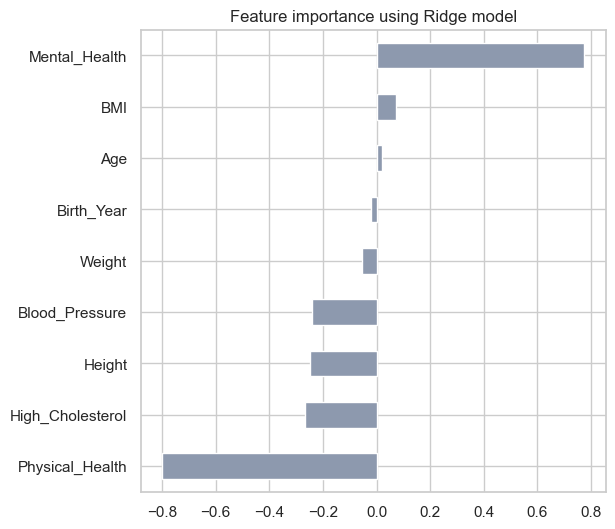

In [124]:
# calling the function to plot the importance of the features

plot_importance(ridge_coef, 'Ridge')

The conclusions are almost the same as in Lasso, as expected, meaning that the features with less importance in predicting our target are `Birth_Year` and `Age`, while `Weight` and `BMI` can be considered as not important as well.

<a id = "elastic-net"></a>

#### 4.3.3. Elastic net

Ridge regression added a term in ordinary least square error function that regularizes the value of coefficients of variables (L2), and Lasso regression is similar to Ridge regression except we add mean absolute value of coefficients in place of mean square value (L1). While in elastic net regularization we added the both terms of L1 and L2 to get the final loss function. We will use also elastic net, since it performs better than Ridge and Lasso Regression for most of the test cases. https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/
https://analyticsindiamag.com/hands-on-tutorial-on-elasticnet-regression/

In [125]:
# creating an elastic net instance
e_net = ElasticNet(alpha = 0.1, l1_ratio = 0.3, random_state = 5)

# fitting the data to the net
e_net.fit(feat_x_train_num_scaled, feat_y_train)

# assigning the coefficients to the features in a pandas series
enet_coef = pd.Series(e_net.coef_, index = feat_x_train_num_scaled.columns)
enet_coef

Birth_Year          0.000000
Height             -0.000000
Weight              0.000000
High_Cholesterol   -0.000000
Blood_Pressure     -0.000000
Mental_Health       0.050769
Physical_Health    -0.068436
Age                -0.000000
BMI                 0.048998
dtype: float64

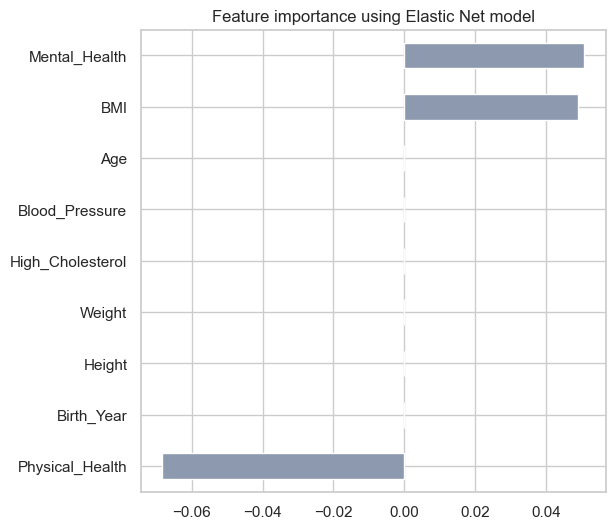

In [126]:
# calling the function to plot the importance of the features

plot_importance(enet_coef, 'Elastic Net')

With elastic net, we conclude that the features with less importance are `Age`, `Blood_Pressure`, `High_Cholesterol`, `Weight`, `Height` and `Birth_Year`, since these are the ones with coefficient equal to zero. 

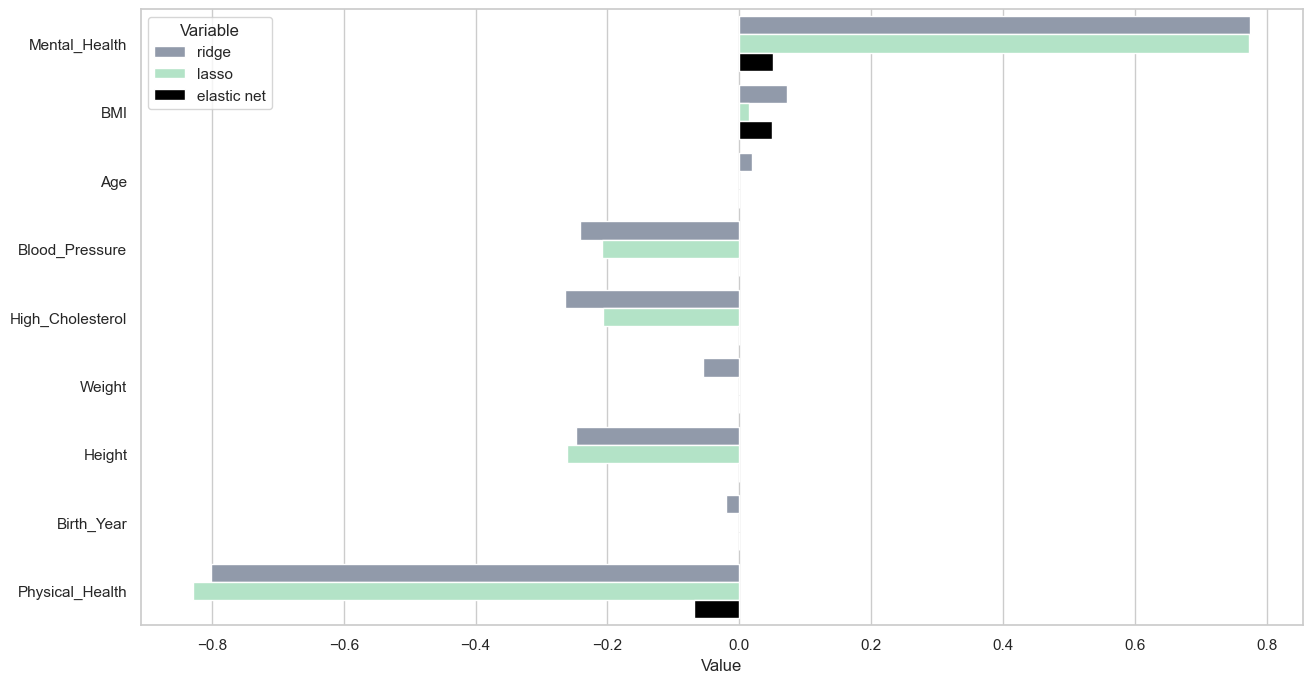

In [127]:
# plotting the results of these three embedded methods together

zippy = pd.DataFrame(zip(lasso_coef, ridge_coef, enet_coef), columns = ['lasso', 'ridge', 'elastic net'])
zippy['col'] = feat_x_train_num_scaled.columns
tidy = zippy.melt(id_vars = 'col').rename(columns = str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize = (15, 8))
plot = sns.barplot(y = 'Col', x = 'Value', hue = 'Variable', data = tidy, palette = ['#8d99ae', '#abebc6', '#000000'])
plot.set(ylabel = None)
plt.show()

<a id = "feature-decision-tree"></a>

#### 4.3.4. Decision tree

Decision trees can be used to calculate the feature importance. We have 2 methods of calculating it: **entropy** (the information gain is the decrease in entropy after the dataset is split on a feature) and **gini** (calculated as the decrease in node impurity weighted by the probability of reaching that node).

In [128]:
# calculating the feature importance using the split criteria 'gini' and 'entropy'
# we use ordinal encoding for all variables since decision trees do not work with distances

gini_importance = DecisionTreeClassifier(criterion = 'gini', random_state = 5).fit(oe(feat_x_train, non_metric_features_name).drop('Name', axis = 1), feat_y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion = 'entropy', random_state = 5).fit(oe(feat_x_train, non_metric_features_name).drop('Name', axis = 1), feat_y_train).feature_importances_

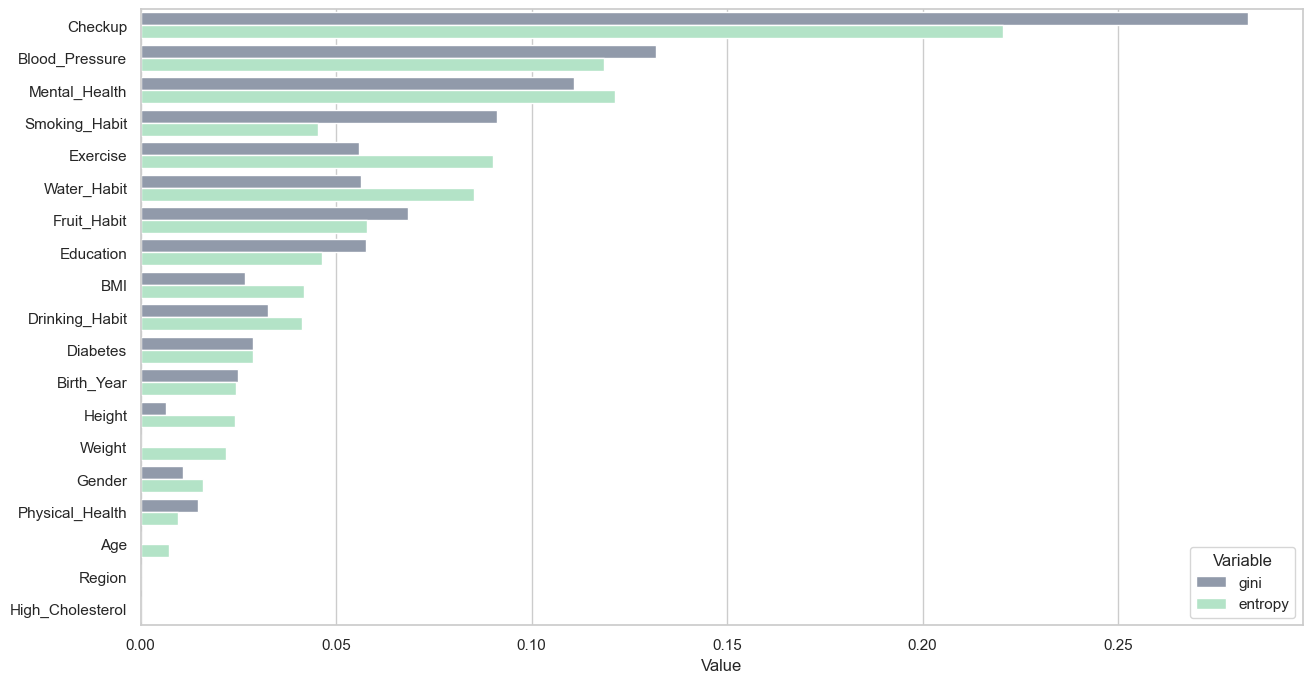

In [129]:
# ploting the feature importances for both criterions
# code from the classes

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini', 'entropy'])
zippy['col'] = feat_x_train.drop('Name', axis = 1).columns
tidy = zippy.melt(id_vars = 'col').rename(columns = str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize = (15, 8))
plot = sns.barplot(y = 'Col', x = 'Value', hue = 'Variable', data = tidy, palette = ['#8d99ae', '#abebc6'])
plot.set(ylabel = None)
plt.show()

As we can see in this graph, the results are quite similar for both criterions. If we define the threshold at 0.05, the variables we should keep are `Checkup`, `Blood_Pressure`, `Mental_Health`, `Smoking_Habit`, `Exercise`, `Water_Habit`, and `Fruit_Habit`.

<a id = "final-insights"></a>

### Final insights

#### Numerical Data

| Predictor | Spearman | ANOVA | Kendall | RFE - Logistic Regression | RFE - Decision Tree | Decision tree (Gini and Entropy) | Lasso | Ridge | Elastic Net | What to do? |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Birth_Year | Discard | Keep | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard |
| Height | Discard | Keep | Keep | Keep | Discard | Discard | Keep | Keep | Discard | Try with and without |
| Weight | Discard | Keep | Keep | Keep | Discard | Discard | Discard | Discard ? | Discard | Discard |
| High_Cholesterol | Discard | Discard | Keep | Keep | Keep | Discard | Keep | Keep | Discard | Try with and without |
| Blood_Pressure | Discard | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Discard | Include in the model |
| Mental_Health | Discard | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Include in the model |
| Physical_Health | Discard | Keep | Keep | Keep | Keep | Discard | Keep | Keep | Keep | Include in the model |
| Age | Discard | Keep | Keep | Discard | Keep | Discard | Discard | Discard | Discard | Discard |
| BMI | Discard | Keep | Keep | Keep | Discard | Discard | Discard ? | Discard ? | Keep | Try with and without |


#### Categorical Data

| Predictor | Kendall | Chi-square | Mutual information | Visualizing | Decision tree (Gini and Entropy) | What to do? |
| --- | --- | --- | --- | --- | --- | --- |
| Name | --- | Discard | --- | --- | --- | Discard |
| Region | --- | Discard | Discard | Discard | Discard | Discard | 
| Education | Discard | Discard | Discard | Discard | Discard | Discard |
| Smoking_Habit | --- | Discard | Discard | Discard | Keep | Discard |  
| Drinking_Habit | Keep | Keep | Keep | Keep | Discard | Include in the model |  
| Exercise | --- | Keep | Keep | Keep | Keep | Include in the model |  
| Fruit_Habit | Keep | Keep | Keep | Keep ? | Keep | Include in the model | 
| Water_Habit | Discard | Discard | Discard | Discard | Keep | Discard |  
| Checkup | --- | Keep | Keep | Keep | Keep | Include in the model |  
| Diabetes | --- | Keep | Keep | Keep ? | Discard | Include in the model |  
| Gender | --- | Keep | Keep | Keep | Discard | Include in the model | 

<div class="alert alert-block alert-success"> <a id = "modelling"></a>
    
## 5. Modelling

- [Base models](#base-models)
- [5.1. Logistic regression](#logistic-regression)
- [5.2. Naive bayes](#naive-bayes)
- [5.3. K-nearest neighbors](#k-nearest-neighbors)
- [5.4. Neural networks](#neural-networks)
- [5.5. Decision trees](#decision-trees)
- [5.6. Support vector machine](#support-vector-machine)
- [5.7. Ridge classifier](#ridge-classifier)
- [5.8. Ensemble methods](#ensemble-methods)
    - [5.8.1. Bagging](#bagging)
    - [5.8.2. Random forest](#random-forest)
    - [5.8.3. AdaBoost](#adaboost)
    - [5.8.4. GradientBoosting](#gradientboosting)
    - [5.8.5. Extra trees](#extra-trees)
    - [5.8.6. Stacking](#stacking)
- [Models with different combinations of preprocessing](#models-different-combinations-preprocessing)
- [Models without some features](#models-without-features)

[Back to TOC](#toc)

Since we already did the feature selection, we should update our `data` dataset to only contain the features we will use in the models, and, also, the lists containing the names of the used features `metric_features`, `non_metric_features`, `categorical_features` and `ordinal_features`.

In [130]:
metric_features_todrop = ['Birth_Year', 'Weight', 'Age']
non_metric_features_todrop = ['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit']
categorical_features_todrop = ['Smoking_Habit', 'Region']
ordinal_features_todrop = ['Education', 'Water_Habit']

data.drop(metric_features_todrop + non_metric_features_todrop, axis = 1, inplace = True)

upd_metric_features = list(set(metric_features) - set(metric_features_todrop))
upd_non_metric_features = list(set(non_metric_features) - set(non_metric_features_todrop))

upd_categorical_features = list(set(categorical_features) - set(categorical_features_todrop))
upd_ordinal_features = list(set(ordinal_features) - set(ordinal_features_todrop))

Since we dropped the variable `Education`, we do not need to fill the missing values that were present in this feature. Also, we dropped `Birth_Year` and `Age`, so the outliers we defined before do not apply.

The procedure here in the modelling phase is that first train the model by providing both features and target for some observations, and then test the model by only providing features and expecting it to predict the target. Therefore, we need to split the data into training and validation subsets. So we start by splitting the data.

If we split data using `train_test_split` (using a **hold-out method**), we can only train a model with the portion set aside for training, which cannot fully represent our dataset. So, we used **cross-validation**, where the dataset is divided into N sets: N-1 sets are used for training and the remaining set is used for testing. There are different methods to split data with cross validation in sklearn: K-Fold, Stratified K-Fold, Repeated K-Fold and Repeated Stratified K-Fold, for example. 

**KFold** divides the dataset into k folds, and when shuffle is set to True, then the splitting will be random.

In [131]:
# creating a kfold instance where the number of splits is 10

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

In **StratifiedKFold**, the class distribution in the dataset is preserved in the training and test splits, so in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold.

In [132]:
# creating a stratified kfold instance where the number of splits is 10

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

A single run of the KFold cross-validation procedure may result in a noisy estimate of model performance, since different splits of the data may result in very different results. **RepeatedKFold** cross-validation provides a way to improve the estimated performance of the model, by repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

In [133]:
# creating a repeated kfold instance where the number of splits is 10 and the number of times cross-validator needs to be
# repeated is 5, so we will obtain 50 models

rkf = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 5)

The same logic applies for the **RepeatedStratifiedKFold**. The main objective is to repeat the StratifiedKFold procedure to improve the calculation of the model's performance

In [134]:
# creating a stratified repeated kfold instance where the number of splits is 10 and the number of times cross-validator
# needs to be repeated is 5, so we will obtain 50 models

rskf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 5)

In any binary classification task, the model can only achieve two results: either our model is correct or incorrect in the prediction where we only have two classes. So, in order to evaluate the performance of our models, we should compare the target we have for the training/validation datasets with the respective predictions that the model made for the training/validation datasets. We can use 4 metrics (since our problem is a classification problem with only 2 possible classes): accuracy, precision, recall and f1_score.

- **Accuracy** measures how often the classifier correctly predicts.
- **Precision** explains how many of the correctly predicted cases actually turned out to be positive, so is useful in the cases where a false positive is a higher concern than a false negative.
- **Recall** (or sensitivity) explains how many of the actual positive cases the model was able to predict correctly, so is a useful metric in cases where a false negative is of higher concern than a false positive.
- **F1 Score** gives a combined idea about precision and recall metrics.

In [135]:
# defining a function that will return the metrics for a given split method and a given model


# encoder_list = [ohc, oe]
# so if we want to encode all non-metric features with one hot encoding, we pass to the function [True, False]
# if we want to properly encode the features, we pass to the function [True, True]
# if we do not want to encode the non-metric features, we pass to the function [False, False]
# and you get the idea

# scaling_list = [min-max, standard, robust]
# so if we want to scale the data using min-max method, we pass to the function [True, False, False]
# if we want to scale the data using standard method, we pass to the function [False, True, False]
# if we want to scale the data using robust method, we pass to the function [False, False, True]

def model_metrics(x, y, model, split_method, encoder_list, scaling_list, iqr):
    
    # these lists store the f1score for the training data and for the validation data, for each model
    f1_train = []
    f1_val = []
    
    # this list stores the time
    timer = []
    
    # -------------------------------------------------------------------------------------------------------------------------
    # ENCODING THE FEATURES
    # -------------------------------------------------------------------------------------------------------------------------
    # encoding all non-metric features with one-hot encoder
    if encoder_list[0] & ~encoder_list[1]:
        x, feat_encoded = ohc(x, upd_non_metric_features)

    # encoding all non-metric features with ordinal encoder    
    if ~encoder_list[0] & encoder_list[1]:
        x = oe(x, upd_non_metric_features)

    # encoding properly the non-metric features
    if encoder_list[0] & encoder_list[1]:
        x, feat_encoded = ohc(x, upd_categorical_features)
        x = oe(x, upd_ordinal_features)

    # one iteration for each model created for each fold of the dataset
    for train_index, val_index in split_method.split(x, y):
        
        # getting the index from the splits
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # -------------------------------------------------------------------------------------------------------------------------
        # SCALING THE FEATURES
        # -------------------------------------------------------------------------------------------------------------------------
        # a control to know if there are metric features in our dataset to scale
        metric_bool = True
        for feature in upd_metric_features:
            if feature not in x.columns:
                metric_bool = False
             
        if metric_bool & scaling_list[0]:
            # scaling the data with the min-max scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_metric_features)
            
        if metric_bool & scaling_list[1]:
            # scaling the data with the standard scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_standard_scaler(x_train, x_val, upd_metric_features)
            
        if metric_bool & scaling_list[2]:
            # scaling the data with the robust scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_robust_scaler(x_train, x_val, upd_metric_features)
            
        # -------------------------------------------------------------------------------------------------------------------------
        # REMOVING OUTLIERS
        # -------------------------------------------------------------------------------------------------------------------------
        if iqr:
            x_train, y_train = x_y_IQR_method(x_train, y_train, upd_metric_features)
        
        # -------------------------------------------------------------------------------------------------------------------------
        # MODELLING
        # -------------------------------------------------------------------------------------------------------------------------
        # start counting time
        begin = time.perf_counter()
        
        # fitting the model to the validation dataset
        model.fit(X = x_train, y = y_train)
        
        # finish counting time
        end = time.perf_counter()
        
        # getting the values that the model predicted
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        
        # calculating the f1 metric for the models we created in each iteration of the loop
        value_train = f1_score(y_train, y_train_pred)
        value_val = f1_score(y_val, y_val_pred)
                
        # storing the metrics for both training and validation datasets
        f1_train.append(value_train)
        f1_val.append(value_val)
        
        # storing the time
        timer.append(end - begin)
    
    # calculating the average and the standard deviation of f1 score for all models created
    train_average = round(np.mean(f1_train), 5)
    val_average = round(np.mean(f1_val), 5)
    train_std = round(np.std(f1_train), 5)
    val_std = round(np.std(f1_val), 5)
    
    time_average = round(np.mean(timer), 3)
    time_std = round(np.std(timer), 2)
    overfitting = round(train_average - val_average, 5)
    
    return str(train_average) + '+/-' + str(train_std), str(val_average) + '+/-' + str(val_std), str(time_average) + '+/-' + str(time_std), str(overfitting)

In [136]:
# defining a function that calls the model_metrics function to access our models

def show_results(df, *args):
    count = 0
    # for each model and the split method, the model, the encoded schema and the scaling schema are passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        train_average, val_average, time_average, overfitting = model_metrics(arg[0], arg[1], arg[2], arg[3], arg[4], arg[5], arg[6])
        
        # store the results in the right row
        df.iloc[count] = train_average, val_average, time_average, overfitting
        count += 1
        
    return df

In [137]:
# defining a function that searches for the best set of parameters

def best_parameters(x, y, model, parameters, encoder_list, scale_data):
    
    # encoding all non-metric features with one-hot encoder
    if encoder_list[0] & ~encoder_list[1]:
        x, feat_encoded = ohc(x, upd_non_metric_features)

    # encoding all non-metric features with ordinal encoder    
    if ~encoder_list[0] & encoder_list[1]:
        x = oe(x, upd_non_metric_features)

    # encoding properly the non-metric features
    if encoder_list[0] & encoder_list[1]:
        x, feat_encoded = ohc(x, upd_categorical_features)
        x = oe(x, upd_ordinal_features)
    
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 5, stratify = target, shuffle = True)
        
    # a control to know if there are metric features in our dataset to scale
    metric_bool = True
    for feature in upd_metric_features:
        if feature not in x.columns:
            metric_bool = False

    if metric_bool & scale_data:
        # scaling the data with the MinMax scaler using the function created before, only if there are metric features
        x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_metric_features)
    
    grid = GridSearchCV(model, parameters, scoring = 'f1', cv = skf, return_train_score = True, n_jobs = -1)
    grid.fit(x_train, y_train)
    
    # best parameter set
    print('------------------------------------------------------------------------------------------------------------------------')
    print('Best parameters found:\n', grid.best_params_)
    print('------------------------------------------------------------------------------------------------------------------------')

    # all results
    f1_val = grid.cv_results_['mean_test_score']
    std_val = grid.cv_results_['std_test_score']
    f1_train = grid.cv_results_['mean_train_score']
    parameters = grid.cv_results_['params']
    overfitting = np.abs(f1_val - f1_train)

    results = pd.DataFrame(zip(f1_val, std_val, f1_train, parameters, overfitting), columns = ['F1 Validation', 'Std Validation', 'F1 Train', 'Parameters', 'Overfitting'])
    results.sort_values(by = ['F1 Validation'], inplace = True, ascending = False)
    
    return results

<a id = "base-models"></a>

### Base models

Before we start with the tunning of each model applied, we can just define the instances for each model with the default parameters, to have an ideia of how are the models going to perform on this dataset, and what are the most suitable ones in this case.

In [138]:
# defining the objects for the base models

lr_base = LogisticRegression(random_state = 5)
nb_base = GaussianNB()
kn_base = KNeighborsClassifier()
nn_base = MLPClassifier(random_state = 5, max_iter = 5000)
dt_base = DecisionTreeClassifier(random_state = 5, max_depth = 3)
svc_base = SVC(random_state = 5)
rc_base = RidgeClassifier(random_state = 5)
bg_base = BaggingClassifier(random_state = 5)
rf_base = RandomForestClassifier(random_state = 5)
ab_base = AdaBoostClassifier(random_state = 5)
gb_base = GradientBoostingClassifier(random_state = 5)
et_base = ExtraTreesClassifier(random_state = 5)

In [219]:
# calling the defined function to see the performance of the base models

df_base = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                       index = ['Logistic Regression',
                                'Gaussian Naive Bayes',
                                'K Nearest Neighbors',
                                'Neural Network',
                                'Decision Tree',
                                'Support Vector Machine',
                                'Ridge',
                                'Bagging',
                                'Random Forest',
                                'AdaBoost',
                                'GradientBoosting',
                                'Extra-Trees']
                      )
show_results(df_base,
             [data, target, lr_base, skf, [True, True], [True, False, False], False],
             [data, target, nb_base, skf, [True, True], [True, False, False], False],
             [data[upd_metric_features], target, kn_base, skf, [False, False], [True, False, False], False],
             [data, target, nn_base, skf, [True, True], [True, False, False], False],
             [data, target, dt_base, skf, [True, True], [True, False, False], False],
             [data, target, svc_base, skf, [True, True], [True, False, False], False],
             [data, target, rc_base, skf, [True, True], [True, False, False], False],
             [data, target, bg_base, skf, [True, True], [True, False, False], False],
             [data, target, rf_base, skf, [True, True], [True, False, False], False],
             [data, target, ab_base, skf, [True, True], [True, False, False], False],
             [data, target, gb_base, skf, [True, True], [True, False, False], False],
             [data, target, et_base, skf, [True, True], [True, False, False], False]
            )

Train         Validation          Time  \
Logistic Regression      0.8677+/-0.00419  0.85645+/-0.03437   0.021+/-0.0   
Gaussian Naive Bayes    0.85731+/-0.00637  0.84984+/-0.02485   0.002+/-0.0   
K Nearest Neighbors     0.85456+/-0.00683  0.78141+/-0.04079   0.002+/-0.0   
Neural Network           0.99784+/-0.0015  0.96123+/-0.02354  7.914+/-0.42   
Decision Tree           0.85784+/-0.00392   0.8268+/-0.03354   0.003+/-0.0   
Support Vector Machine  0.90452+/-0.00604  0.87216+/-0.02377   0.013+/-0.0   
Ridge                   0.87169+/-0.00359  0.84862+/-0.03767   0.005+/-0.0   
Bagging                 0.99797+/-0.00125  0.95126+/-0.02912  0.034+/-0.01   
Random Forest                   1.0+/-0.0  0.98307+/-0.01818  0.159+/-0.01   
AdaBoost                  0.918+/-0.00468  0.88638+/-0.02435  0.092+/-0.02   
GradientBoosting        0.98546+/-0.00237  0.93574+/-0.02296  0.149+/-0.02   
Extra-Trees                     1.0+/-0.0   0.9915+/-0.01091  0.123+/-0.01   

                       Overfitting  
Logistic Regression        0.01125  
Gaussian Naive Bayes       0.00747  
K Nearest Neighbors        0.07315  
Neural Network             0.03661  
Decision Tree              0.03104  
Support Vector Machine     0.03236  
Ridge                      0.02307  
Bagging                    0.04671  
Random Forest              0.01693  
AdaBoost                   0.03162  
GradientBoosting           0.04972  
Extra-Trees                 0.0085

So, looking at these results we can say:
- Generally, the most simple models are the ones that take less time, but they are not performing that well compared to others.
- We are quite overfitting in almost every model we have here, since the difference between the training f1-score and the validation f1-score is quite high.
- Comparing this neural network and the bagging classifier, we conclude that the performance is almost the same, but the bagging classifier works much faster than the neural network, so we should prefer it.
- Also, we can say that since the KNN model has this kind of results with the default parameters, we can try to tune it and see if we can achieve better results with a really simple model.
- Lastly, our best models are: Bagging, Random Forest, Extra Trees and GradientBoosting.

<a id = "logistic-regression"></a>

### 5.1. Logistic regression

In our problem, the outcome that we are expecting is either 1 or 0 (whether the patient has or does not have the disease). So, with a logistic regression, we are going to get the probabilistic values (that range between 0 and 1), by fitting a 'S' shaped function (logistic function).

In [140]:
# defining an instance of a logistic regression

lr = LogisticRegression(random_state = 5)

In [141]:
# calling the defined function to see the performance of the logistic regression with the different split methods

df_lr = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                  index = ['KFold', 'StratifiedKFold', 'RepeatedKFold', 'RepeatedStratifiedKFold'])
show_results(df_lr, 
             [data, target, lr, kf, [True, True], [True, False, False], False],
             [data, target, lr, skf, [True, True], [True, False, False], False],
             [data, target, lr, rkf, [True, True], [True, False, False], False],
             [data, target, lr, rskf, [True, True], [True, False, False], False]
            )

Train         Validation          Time  \
KFold                    0.86723+/-0.00501    0.8589+/-0.0403   0.023+/-0.0   
StratifiedKFold           0.8677+/-0.00419  0.85645+/-0.03437   0.024+/-0.0   
RepeatedKFold            0.86749+/-0.00563   0.85602+/-0.0415  0.025+/-0.01   
RepeatedStratifiedKFold  0.86725+/-0.00445  0.85593+/-0.03921  0.025+/-0.01   

                        Overfitting  
KFold                       0.00833  
StratifiedKFold             0.01125  
RepeatedKFold               0.01147  
RepeatedStratifiedKFold     0.01132

As we can see, the results using different split methods do not change that much, so from now on we will use **RepeatedStratifiedKFold**. We can see that the results of our models do not have a big difference between the training dataset and the validation dataset, which means that we are not overfitting.

<a id = "naive-bayes"></a>

### 5.2. Naive bayes



Naive Bayes
https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea

The unique parameter that makes sense to change is **var_smoothing**, which is the "portion of the largest variance of all features that is added to variances for calculation stability" (sklearn). So we will try different values and see which one fits better.

In [142]:
# defining instances of a Gaussian naive bayes with different values for the parameter var_smoothing

gnb_var1 = GaussianNB(var_smoothing = 0.1)
gnb_var2 = GaussianNB(var_smoothing = 0.01)
gnb_var3 = GaussianNB(var_smoothing = 0.015)
gnb_var4 = GaussianNB(var_smoothing = 0.001)
gnb_var5 = GaussianNB(var_smoothing = 0.0001)
gnb_var6 = GaussianNB(var_smoothing = 0.00001)

In [143]:
# calling the defined function to see the performance of the naive bayes with the different parameters

df_gnb = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                      index = ['var_smoothing = 0.1', 
                               'var_smoothing = 0.01', 
                               'var_smoothing = 0.015', 
                               'var_smoothing = 0.001', 
                               'var_smoothing = 0.0001', 
                               'var_smoothing = 0.00001']
                     )
show_results(df_gnb, 
             [data, target, gnb_var1, rskf, [True, True], [True, False, False], False],
             [data, target, gnb_var2, rskf, [True, True], [True, False, False], False],
             [data, target, gnb_var3, rskf, [True, True], [True, False, False], False],
             [data, target, gnb_var4, rskf, [True, True], [True, False, False], False],
             [data, target, gnb_var5, rskf, [True, True], [True, False, False], False],
             [data, target, gnb_var6, rskf, [True, True], [True, False, False], False]
            )

Train         Validation         Time  \
var_smoothing = 0.1      0.84454+/-0.00585   0.8389+/-0.04383  0.002+/-0.0   
var_smoothing = 0.01     0.85334+/-0.00512  0.84661+/-0.03814  0.002+/-0.0   
var_smoothing = 0.015    0.85306+/-0.00516  0.84702+/-0.03695  0.002+/-0.0   
var_smoothing = 0.001    0.85808+/-0.00497  0.85304+/-0.03368  0.002+/-0.0   
var_smoothing = 0.0001   0.85834+/-0.00569  0.85246+/-0.03381  0.002+/-0.0   
var_smoothing = 0.00001   0.85834+/-0.0057  0.85246+/-0.03381  0.002+/-0.0   

                        Overfitting  
var_smoothing = 0.1         0.00564  
var_smoothing = 0.01        0.00673  
var_smoothing = 0.015       0.00604  
var_smoothing = 0.001       0.00504  
var_smoothing = 0.0001      0.00588  
var_smoothing = 0.00001     0.00588

As we can see the results are the best value for `var_smoothing` is 0.0001, so, in our model, we will add 0.001% of the largest variance of all features to variances for calculation stability.

In [144]:
# getting the model with the best set of parameters found above

gnb_with_best = GaussianNB(var_smoothing = 0.001)

In [145]:
# calling the defined function to see the performance of the gaussian naive bayes with the best parameters

df_gnb = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['gnb best parameters'])
show_results(df_gnb, [data, target, gnb_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation         Time  \
gnb best parameters  0.85808+/-0.00497  0.85304+/-0.03368  0.002+/-0.0   

                    Overfitting  
gnb best parameters     0.00504

As we can notice, our results from the training dataset are similar to the ones from the validation dataset, which implies that we are not overfitting. Considering the amount of assumptions we made in order to apply Guassian Naive Bayes to our dataset and the simplicity of this algorithm we can conclude that these are pretty good results. 

Here, we can also use only the metric features and apply **Gaussian Naive Bayes**, or we can use only the non metric features and apply **Categorical Naive Bayes** and see the results.

In [146]:
# defining an instance of Categorical naive bayes

cnb = CategoricalNB()

In [147]:
# calling the defined function to see the performance of the gaussian naive bayes and the categorical naive bayes

df_cnb = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], 
                      index = ['gaussian naive bayes - metric features', 'categorical naive bayes - non-metric features'])
show_results(df_cnb, 
             [data, target, gnb_with_best, rskf, [True, True], [True, False, False], False],
             [data[upd_non_metric_features], target, cnb, rskf, [False, True], [True, False, False], False]
            )

Train  \
gaussian naive bayes - metric features         0.85808+/-0.00497   
categorical naive bayes - non-metric features  0.85277+/-0.00509   

                                                      Validation         Time  \
gaussian naive bayes - metric features         0.85304+/-0.03368  0.002+/-0.0   
categorical naive bayes - non-metric features   0.84643+/-0.0319  0.003+/-0.0   

                                              Overfitting  
gaussian naive bayes - metric features            0.00504  
categorical naive bayes - non-metric features     0.00634

We use categorical features encoded with ordinal encoder because the algorithm categorical naive bayes does not work with distances. It only calculates probabilities by counting the number of observations of a certain value, so it does not give any meaning to the values themselves.

<a id = "k-nearest-neighbors"></a>

### 5.3. K-nearest neighbors

KNN is an algorithm of Instance Based Learning, which compares new problem instances with instances that have been seen in training. The basic idea is to compute the k most similar observations to the one we are analysing (with a distance) and then use class labels of nearest neighbors to determine the class label of the unknown record. Since we do not know *a priori* what is the optimal number of neighbors to use in the comparison, we can define a loop to identify it.

#### Optimal number of neighbors

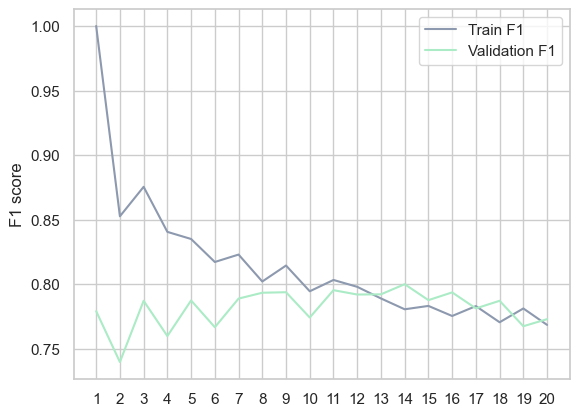

Best number of neighbors: 14
F1 score in train with 14 neighbors: 0.780570
F1 score in validation with 14 neighbors: 0.800000


In [148]:
numberK_list = np.arange(1, 21)
high_score = 0
non = 0

# creating lists to store the results from the different models
f1score_train = []
f1score_val = []

# since we only want the metric features we do a split containing only these variables
x_train, x_val, y_train, y_val = train_test_split(data[upd_metric_features], target, test_size = 0.3, random_state = 5, stratify = target, shuffle = True)
# and then we scale the data, using the function defined previously
x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_metric_features)

for n in numberK_list:
    
    # creating an instance of the KNeighborsClassifier with the number of neighbors defined with the iterator
    model = KNeighborsClassifier(n_neighbors = n)   
    # fit the model to the data
    model.fit(x_train, y_train)
    
    # getting the predictions for training dataset
    y_train_pred = model.predict(x_train)
    # getting the predictions for test dataset
    y_val_pred = model.predict(x_val)
    
    # check the f1score for the train
    value_train = f1_score(y_train, y_train_pred)
    # check the f1score for the test
    value_val = f1_score(y_val, y_val_pred)

    # append the f1scores in the corresponding list
    f1score_train.append(value_train)
    f1score_val.append(value_val)
    
    # we store the highest f1 score we have until now, and the best number of neighbors is the one that provides the best result
    if(value_val > high_score):
        high_score = value_val
        non = n
        
# starting the visualization
plt.plot(numberK_list, f1score_train, label = 'Train F1', color = '#8d99ae')
plt.plot(numberK_list, f1score_val, label = 'Validation F1', color = '#abebc6')
plt.xticks(numberK_list)
plt.legend()
plt.ylabel('F1 score')
plt.show()
        
print('Best number of neighbors: %d' %non)
print('F1 score in train with %d neighbors: %f' % (non, f1score_train[non - 1]))
print('F1 score in validation with %d neighbors: %f' % (non, high_score))

Our loop tells us that the best number of neigbors is `14`. So, we will use the 14 neighbors to build our KNN model, keeping in mind that this could be problematic, since we are using an even number of neighbors to predict a binary class, so we can fall in a situation where the number of neighbors for each class is the same. We must consider that the second best option is to use 9 or 11 neighbors.

We also can change the **weights**, this is the weight that each neighbor will have in the final prediction. We can weight observations by the inverse of their distance to the observation (meaning that the nearest neighbors have more impact on the prediction than the ones that are more distant), but we in this case we would worsen our problem with overfitting, since the closest observation would almost determine the prediction that we do.

Although here the dataset is relatively small, so we do not have the problem of computation power, in bigger datasets is usual to use **KD-Tree** instead of **Brute Force** to search for the nearest neighbour. Instead of using the whole dataset to search for the nearest neighbor, we just use the cluster where that observation is located. So, with KD-Tree we get not the closest observation from the one we are using, but the closest observation from the same cluster we are searching in. That can be a problem, since we can make wrong assignments of the observations to the clusters. So, we expect the f1-score to be lower using this technique, but the procedure faster.

For high dimensionality problems, sometimes the **Manhattan distance** is preferable over the **Euclidean distance**, so knowing that the **Minkowski metric** is equivalent to using manhattan_distance when $ p = 1 $ and is equivalent to using euclidean_distance when $ p = 2 $, we can check for this parameters.

In [149]:
# defining an instance of a KNeighborsClassifier with the default parameters

knn = KNeighborsClassifier()

In [150]:
# defining a dictionary with the possible values for the parameters that we want to test

knn_parameter_space = {
    'n_neighbors': [9, 11, 14],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['brute', 'kd_tree'],
    'metric': ['minkowski'],
    'p': [1, 2, 3]    
}

In [151]:
# calling the previous defined function that searches for the best combinations of parameters for our model

knn_best = best_parameters(data[upd_metric_features], target, knn, knn_parameter_space, [False, False], True)
knn_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
19       0.811772        0.054175  1.000000   
1        0.811772        0.054175  1.000000   
7        0.806591        0.050114  1.000000   
25       0.806591        0.050114  1.000000   
31       0.789577        0.051008  1.000000   
13       0.789577        0.051008  1.000000   
0        0.787396        0.057417  0.818032   
18       0.787396        0.057417  0.818032   
23       0.786880        0.060466  1.000000   
5        0.786880        0.060466  1.000000   
22       0.784637        0.062018  0.798398   
4        0.784637        0.062018  0.798398   
27       0.784473        0.048276  1.000000   
9        0.784473        0.048276  1.000000   
33       0.780984        0.051100  1.000000   
15       0.780984        0.051100  1.000000   
3        0.780369        0.058786  1.000000   
21       0.780369        0.058786  1.000000   
6        0.780049        0.059741  0.809004   
24       0.780049        0.059741  0.809004   
11       0.776758        0.063381  1.000000   
29       0.776758        0.063381  1.000000   
26       0.774991        0.048107  0.799342   
8        0.774991        0.048107  0.799342   
20       0.774046        0.059427  0.812599   
2        0.774046        0.059427  0.812599   
28       0.768373        0.066547  0.797195   
10       0.768373        0.066547  0.797195   
17       0.767755        0.048810  1.000000   
35       0.767755        0.048810  1.000000   
12       0.753475        0.057665  0.790453   
30       0.753475        0.057665  0.790453   
14       0.749594        0.068635  0.774681   
32       0.749594        0.068635  0.774681   
16       0.740746        0.076075  0.773435   
34       0.740746        0.076075  0.773435   

                                           Parameters  Overfitting  
19  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.188228  
1   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.188228  
7   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.193409  
25  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.193409  
31  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.210423  
13  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.210423  
0   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.030637  
18  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.030637  
23  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.213120  
5   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.213120  
22  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.013761  
4   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.013761  
27  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.215527  
9   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.215527  
33  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.219016  
15  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.219016  
3   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.219631  
21  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.219631  
6   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.028955  
24  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.028955  
11  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.223242  
29  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.223242  
26  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.024351  
8   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.024351  
20  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.038552  
2   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.038552  
28  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.028821  
10  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.028821  
17  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.232245  
35  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.232245  
12  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.036978  
30  {'algorithm': 'kd_tree', 'metric': 'minkowski'...   

As we can see, we are quite overfitting here, since the difference between the f1-score on the training dataset and on the validation dataset is almost 0.2. We can check the models with less degree of overfitting:

In [152]:
knn_best[knn_best['Overfitting'] < 0.1]

F1 Validation  Std Validation  F1 Train  \
0        0.787396        0.057417  0.818032   
18       0.787396        0.057417  0.818032   
22       0.784637        0.062018  0.798398   
4        0.784637        0.062018  0.798398   
6        0.780049        0.059741  0.809004   
24       0.780049        0.059741  0.809004   
26       0.774991        0.048107  0.799342   
8        0.774991        0.048107  0.799342   
20       0.774046        0.059427  0.812599   
2        0.774046        0.059427  0.812599   
28       0.768373        0.066547  0.797195   
10       0.768373        0.066547  0.797195   
12       0.753475        0.057665  0.790453   
30       0.753475        0.057665  0.790453   
14       0.749594        0.068635  0.774681   
32       0.749594        0.068635  0.774681   
16       0.740746        0.076075  0.773435   
34       0.740746        0.076075  0.773435   

                                           Parameters  Overfitting  
0   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.030637  
18  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.030637  
22  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.013761  
4   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.013761  
6   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.028955  
24  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.028955  
26  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.024351  
8   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.024351  
20  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.038552  
2   {'algorithm': 'brute', 'metric': 'minkowski', ...     0.038552  
28  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.028821  
10  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.028821  
12  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.036978  
30  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.036978  
14  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.025087  
32  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.025087  
16  {'algorithm': 'brute', 'metric': 'minkowski', ...     0.032689  
34  {'algorithm': 'kd_tree', 'metric': 'minkowski'...     0.032689

So, we will use the model in the index **number 0**, since it is the best among the ones that overfit less. 

In [153]:
# checking the best set of parameters found

knn_best.loc[0, 'Parameters']

{'algorithm': 'brute',
 'metric': 'minkowski',
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [154]:
# getting the model with the best set of parameters found above

knn_with_best = KNeighborsClassifier(algorithm = 'brute', metric = 'minkowski', n_neighbors = 9, p = 1, weights = 'uniform')

In [155]:
# calling the defined function to see the performance of knn with the best parameters

df_knn = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['knn best parameters'])
show_results(df_knn, [data[upd_metric_features], target, knn_with_best, rskf, [False, False], [True, False, False], False])

Train         Validation         Time  \
knn best parameters  0.83533+/-0.00589  0.79133+/-0.04342  0.002+/-0.0   

                    Overfitting  
knn best parameters       0.044

As we can see, we are still overfitting, since the difference between the f1-score on the training dataset and on the validation dataset is almost 0.05.

In the previous models we are just using the metric features, in order to calculate properly the distances with the Minkowski formula, but we can use the non-metric features selected and use **Jaccard similarity** instead of the Euclidean/Manhattan distance to compute the similarity between observations.

In [156]:
# defining an instance of a KNeighborsClassifier with 9 neighbors and the Jaccard similarity as the used metric

knn_js = KNeighborsClassifier(n_neighbors = 9, metric = jaccard)

In [157]:
# calling the defined function to see the performance of the knn with Jaccard similarity as the used metric

df_knnjs = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                        index = ['knn best parameters (metric features)', 'knn categorical features'])
show_results(df_knnjs, 
             [data[upd_metric_features], target, knn_with_best, skf, [False, False], [True, False, False], False],
             [data[upd_non_metric_features], target, knn_js, skf, [True, False], [True, False, False], False]
            )

Train         Validation  \
knn best parameters (metric features)  0.83344+/-0.00602  0.78746+/-0.03901   
knn categorical features               0.85997+/-0.01009   0.82614+/-0.0387   

                                              Time Overfitting  
knn best parameters (metric features)  0.001+/-0.0     0.04598  
knn categorical features               0.05+/-0.01     0.03383

As we can see, the results do not differ significantly, but the model that only includes the non-metric featured provides better results.

<a id = "neural-networks"></a>

### 5.4. Neural networks

https://stats.stackexchange.com/questions/349655/handle-categorical-class-labels-for-scikit-learn-mlpclassifier. Here we can see that we should encode the non-metric features, so the models can use them. Therefore, we should use the ordinal features encoded with OrdinalEncoder and the categorical features encoded with the OneHotEncoder as we can see here (https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest/5229#5229).

The first parameter we can change is the **hidden_layer_sizes**, this is the number of neurons (and the number of hidden layers) in each hidden layer. We have 16 input layers (the same number as the number of input features) and 1 output layer (since we have one binary classification problem). So, we know that the number of hidden neurons should be:

- between the size of the input layer and the size of the output layer ($ 1 < hn < 16 $);
- 2/3 the size of the input layer, plus the size of the output layer ($ hn = 12 $);
- less than twice the size of the input layer ($ hn < 32 $).

In [158]:
# just to test some hidden layer sizes

nn_test1 = MLPClassifier(hidden_layer_sizes = (1))
nn_test2 = MLPClassifier(hidden_layer_sizes = (9))
nn_test3 = MLPClassifier(hidden_layer_sizes = (16, 16))
nn_test4 = MLPClassifier(hidden_layer_sizes = (16))
nn_test5 = MLPClassifier(hidden_layer_sizes = (8, 8, 7, 7))
nn_test6 = MLPClassifier(hidden_layer_sizes = (7, 7, 14))

In [159]:
df_nntest = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], 
                         index = ['test1', 'test2', 'test3', 'test4', 'test5', 'test6'])
show_results(df_nntest,
             [data, target, nn_test1, skf, [True, True], [True, False, False], False],
             [data, target, nn_test2, skf, [True, True], [True, False, False], False],
             [data, target, nn_test3, skf, [True, True], [True, False, False], False],
             [data, target, nn_test4, skf, [True, True], [True, False, False], False],
             [data, target, nn_test5, skf, [True, True], [True, False, False], False],
             [data, target, nn_test6, skf, [True, True], [True, False, False], False]
            )

Train         Validation          Time Overfitting
test1  0.65876+/-0.33353  0.65549+/-0.33172  0.206+/-0.06     0.00327
test2  0.87301+/-0.00563  0.85177+/-0.03498  0.253+/-0.03     0.02124
test3  0.91184+/-0.01239   0.8722+/-0.03976  0.348+/-0.01     0.03964
test4  0.87568+/-0.00553  0.86136+/-0.03576   0.252+/-0.0     0.01432
test5  0.90085+/-0.01441  0.88277+/-0.03624  0.442+/-0.01     0.01808
test6  0.89814+/-0.00818  0.87307+/-0.03119  0.396+/-0.01     0.02507

In order to see the optimal parameters for our neural network, we can use **GridSearchCV** (with the function that we defined above).

In [160]:
# defining an instance of MLPClassifier that iterates until convergence or until it reaches the 1000 iterations

nn = MLPClassifier(max_iter = 1000, random_state = 5)

The **activation function** transforms the summed weighted input into an output value to be fed to the next layer, and adds non-linearity to the neural network. In sklearn we have 4 types of activation functions: (https://www.v7labs.com/blog/neural-networks-activation-functions)
   - `identity` which is a linear function, and has the problem that the algorithm cannot use backpropagation since its derivative is constant and has no relation to the input, so we will not test this.
   - `logistic` can overcome the previous problem, because now the derivative function is related to the input, so the algorithm can go back and understand which weights can provide a better prediction. It is also useful, because we want to predict a probability and we are on the right range with a sigmoid function.
   - `tanh`, the hyperbolic tan function has the same problem as the logistic one, which is for very high or very low values of the input, there is almost no change to the prediction, causing a vanishing gradient problem.
   - `relu` is the rectified linear unit function. The relu function does not activate all the neurons at the same time, since they will only be deactivated if the output of the linear transformation is less than 0.

The **solver** parameter defines the solver for weight optimization. We know that `L-BFGS` is a good option for low dimensional models and for sparse data, so we will not use it. If generalization is more important than time processing, we should use `SGD`. `Adam` computes individual adaptive learning rates for different parameters, so we can use one of the last two.

Talking about the **learning_rate**, we know that if the learning rate is `invscaling`, it gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’, so it will decrease rapidly. Therefore, we consider that this is not the best option, and we will test the learning rate as `constant` or as `adaptative`.

The value of **learning_rate_init** should be small enough to make sure that the algorithm do not diverge from the optimal solution, and should be big enough to make sure that the steps we are taking do not make the algorithm stuck in a suboptimal point or not converging at all. 

The **batch_size** defines the number of samples that will be propagated through the network. Knowing that the smaller the batch_size, the bigger the computation time and the slower the convergence, we will try to use a big enough batch_size. When this parameter is higher, the comoutation time is lower because the algorithm will make less updates (the algorithm will present more samples to the network before it makes the updates on the weights). Also, the smaller the batch the less accurate the estimate of the gradient will be (https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network).

In [161]:
# defining a dictionary with the possible values for the parameters that we want to test

nn_parameter_space = {
    'hidden_layer_sizes': [(8, 8, 16), (16, 16), (8, 8, 8, 8), (12), (8, 8)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.00001, 0.001],
    'learning_rate': ['adaptive', 'constant'],
    'learning_rate_init': [0.1, 0.01, 0.001, 0.0001],
    'batch_size': [100, 200, len(data)]
}

In [162]:
# calling the previous defined function that searches for the best combinations of parameters for our model

nn_best = best_parameters(data, target, nn, nn_parameter_space, [True, True], True)
nn_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'relu', 'alpha': 1e-05, 'batch_size': 200, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
586        0.938586        0.044373  0.995438   
578        0.938586        0.044373  0.995438   
580        0.938551        0.033576  0.995773   
588        0.938551        0.033576  0.995773   
658        0.937182        0.036577  1.000000   
...             ...             ...       ...   
1207       0.000000        0.000000  0.000000   
1206       0.000000        0.000000  0.000000   
1151       0.000000        0.000000  0.000000   
1150       0.000000        0.000000  0.000000   
1125       0.000000        0.000000  0.000000   

                                             Parameters  Overfitting  
586   {'activation': 'relu', 'alpha': 1e-05, 'batch_...     0.056852  
578   {'activation': 'relu', 'alpha': 1e-05, 'batch_...     0.056852  
580   {'activation': 'relu', 'alpha': 1e-05, 'batch_...     0.057222  
588   {'activation': 'relu', 'alpha': 1e-05, 'batch_...     0.057222  
658   {'activation': 'relu', 'alpha': 1e-05, 'batch_...     0.062818  
...                                                 ...          ...  
1207  {'activation': 'logistic', 'alpha': 0.001, 'ba...     0.000000  
1206  {'activation': 'logistic', 'alpha': 0.001, 'ba...     0.000000  
1151  {'activation': 'logistic', 'alpha': 1e-05, 'ba...     0.000000  
1150  {'activation': 'logistic', 'alpha': 1e-05, 'ba...     0.000000  
1125  {'activation': 'logistic', 'alpha': 1e-05, 'ba...     0.000000  

[1440 rows x 5 columns]

So, we found the best combination of parameters, that maximizes the f1 score for the validation dataset. We can run a neural network with those parameters and see the performance of the algorithm.

In [163]:
# defining an instance of MLPClassifier with the best set of parameters found above

nn_with_best = MLPClassifier(max_iter = 1000, random_state = 5, activation = 'relu', alpha = 1e-05, batch_size = 200, 
                             hidden_layer_sizes = (16, 16), learning_rate = 'adaptive', learning_rate_init = 0.01,
                             solver = 'adam')

In [164]:
# calling the defined function to see the performance of the neural network with the set parameters found

df_nn = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['neural network best parameters'])
show_results(df_nn, [data, target, nn_with_best, skf, [True, True], [True, False, False], False])

Train         Validation  \
neural network best parameters  0.98707+/-0.0128  0.95222+/-0.02059   

                                        Time Overfitting  
neural network best parameters  0.356+/-0.12     0.03485

<a id = "decision-trees"></a>

### 5.5. Decision trees

Decision trees use simple decision rules inferred from the data features to learn the patterns. Decision trees' main advantages are that they are easy to understand and interpret (as they can be visualized), and they accept all kinds of features (both numerical and categorical/ordinal data). The problem with this type of algorithm is that they do not generalize the data well, meaning that they tend to overfit to the training data, which is a disadvantage unless we cut the tree, and they are unstable since small variations in the data usually lead to completely different trees.

In [165]:
# defining a function to plot the trees that we are going to create

def plot_tree(model, df):
    dot_data = export_graphviz(model,
                               feature_names = df.columns,  
                               class_names = ['No disease', 'Disease'],
                               filled = True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20, 20"')
    
    return graphviz.Source(pydot_graph.to_string())

In [166]:
# defining an instance of a DecisionTreeClassifier

dt_test = DecisionTreeClassifier(random_state = 5)

In [167]:
# calling the defined function to see the performance of the Decision Tree with both split criteria

df_dttest = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                         index = ['Ordinal endoded', 'One hot encoded', 'Properly encoded variables'])
show_results(df_dttest,
             [data, target, dt_test, rskf, [False, True], [True, False, False], False],
             [data, target, dt_test, rskf, [True, False], [True, False, False], False],
             [data, target, dt_test, rskf, [True, True], [True, False, False], False]
            )

Train         Validation         Time  \
Ordinal endoded             1.0+/-0.0  0.95441+/-0.03007  0.003+/-0.0   
One hot encoded             1.0+/-0.0  0.95651+/-0.02851  0.003+/-0.0   
Properly encoded variables  1.0+/-0.0   0.9563+/-0.02993  0.003+/-0.0   

                           Overfitting  
Ordinal endoded                0.04559  
One hot encoded                0.04349  
Properly encoded variables      0.0437

As we can see in the results, the Decision Tree works better when the ordinal variables are encoded with OrdinalEncoder and the categorical variables are encoded with OneHotEncoder. We can also see that we are quite overfitting to our training dataset (that has maximum f1-score value) using both criteria. The problem arises because we are building a full tree, only with pure leafs (with only one category). So, we can reduce the overfitting, by **prepruning a tree** (where we do not build the whole tree) or by **postpruning a tree** (where we build the whole tree but then cut it). We start by prepruning the tree, since it consumes less time (we only build part of the tree), keeping in mind that it is hard to define the initial thresholds, so we may have to try different parameters and see which one suits our data well.

*Visualizing the tree*:

In [168]:
# encoding the categorical features with the one hot encoder and the ordinal features with the ordinal encoding

data_encoded, upd_encoded_categorical_features = ohc(data, upd_categorical_features)
data_encoded = oe(data_encoded, upd_ordinal_features)

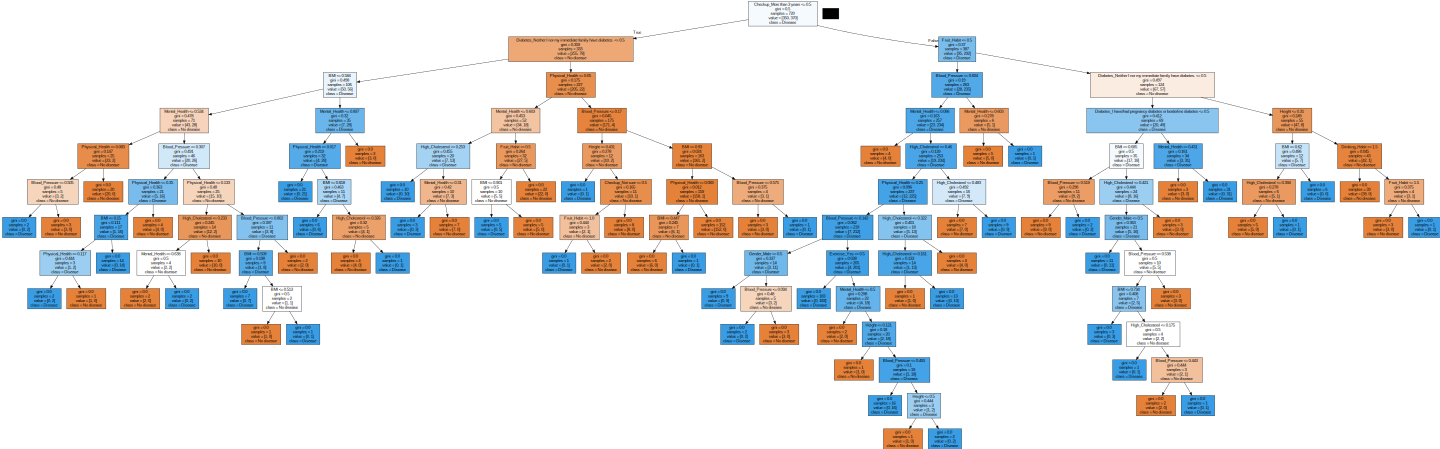

In [169]:
# plotting the tree

plot_tree(dt_test, data_encoded)

We start by deciding what should be the **maximum_depth** for our decision tree. To do that, we can plot the average f1-score for train and validation dataset for trees where the depth range from 1 to 20 levels (almost the same as we did with KNN).

#### Optimal maximum depth

The best f1-score for train is 0.955 for the depth of 20
The best f1-score for validation is 0.906 for the depth of 20


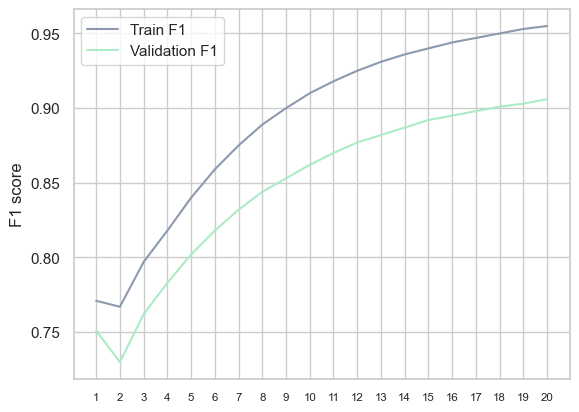

In [170]:
interval = range(1, 21)

# creating lists to store the results from the different models for the same max_depth
dt_f1score_train = []
dt_f1score_val = []

# creating lists to store the average results from the different models with number of depths
avg_dt_f1score_train = []
avg_dt_f1score_val = []

for value in interval:    
    for train_index, val_index in skf.split(data_encoded, target):
        # getting the indexes of the observations assigned for each partition
        x_train, x_val = data_encoded.iloc[train_index], data_encoded.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        
        # scaling the data with the MinMax scaler using the function created before
        x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_metric_features)

        # creating an instance of the DecisionTreeClassifier with the parameter defined
        model = DecisionTreeClassifier(max_depth = value)            
        # fit the model to the data
        model.fit(x_train, y_train)

        # getting the predictions for training dataset
        y_train_pred = model.predict(x_train)
        # getting the predictions for validation dataset
        y_val_pred = model.predict(x_val)

        # check the f1score for the train
        value_train = f1_score(y_train, y_train_pred)
        # check the f1score for the validation
        value_val = f1_score(y_val, y_val_pred)

        # append the f1scores in the corresponding list
        dt_f1score_train.append(value_train)
        dt_f1score_val.append(value_val)

    # calculate the average and the std for f1-score
    avg_dt_f1score_train.append(round(np.mean(dt_f1score_train), 3))
    avg_dt_f1score_val.append(round(np.mean(dt_f1score_val), 3))

print('The best f1-score for train is ' + str(max(avg_dt_f1score_train)) + ' for the depth of ' + str(avg_dt_f1score_train.index(max(avg_dt_f1score_train)) + 1))
print('The best f1-score for validation is ' + str(max(avg_dt_f1score_val)) + ' for the depth of ' + str(avg_dt_f1score_val.index(max(avg_dt_f1score_val)) + 1))

plt.plot(interval, avg_dt_f1score_train, label = 'Train F1', color = '#8d99ae')
plt.plot(interval, avg_dt_f1score_val, label = 'Validation F1', color = '#abebc6')
plt.xticks(interval, fontsize = 'x-small')
plt.legend()
plt.ylabel('F1 score')
plt.show()

The deeper we allow the tree to grow, the more complex the model will be, but the more overfitting we will have, since the leafs will be pure. So, we can control the maximum depth of the tree, by changing **max_depth** parameter. High depth causes overfitting (as explained) and low depth causes under fitting, so we will try numbers that seem acceptable given our model.

In decision trees, input data is partitioned recursively based on selected attributes, and the selection is made based on an impurity measure that can be `gini`, `entropy`, `log_loss`. So, we can compare the two first **criterion**.

We know that the **splitter** (the strategy used to choose the split at each node) can be random or best. If it is `random`, then it selects a random feature and a random split (making the process less computation intensive), if it is `best`, then it selects the best split, so it is more prone to overfitting.

**min_samples_split** represents the minimum number of samples required to split an internal node. High values can prevent a model from learning specific relations to the particular sample selected for a tree (overfitting), but on the other hand, too high values can lead to underfitting.

**min_samples_leaf** is the minimum number of samples required to be at a leaf node. So, if we increase this parameter we will make sure that each leaf has more than one element. Again, high values acn lead to overfitting, while low values can lead to under fitting.

Sometimes it is not possible to look to all features at the same time we are building a tree. To solve this we have the parameter **max_features**, that controls the number of features to consider when looking for the best split. We can use a `float`, where the defined value will be multiplied by the number of features (and those are considered to each split); `auto` where the number of features considered is equal to sqrt(total number of features); `log2`, where the number of features considered is equal to log2(total number of features); and we have other options in sklearn. We will start by using log2 (use 4 features), and then change the value according to the results (using 10 features).

Lastly, we can define the maximum number of leafs that we want to have. A leaf is a node without children, so we are literally cutting directly the tree by changing **max_leaf_nodes**.

We know that changing all these parameters at the same time to preprune a tree can lead to the tree being too small, so we tried to control for that.

In [171]:
# defining an instance of DecisionTreeClassifier with the default parameters, except random_state in order to replicate results

dt = DecisionTreeClassifier(random_state = 5)

In [172]:
# defining a dictionary with the possible values for the parameters that we want to test

dt_parameter_space = {
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [50, 100, 200],
    'max_features': ['log2', 10, None],
    'max_leaf_nodes': [4, 8, None]
}

In [173]:
# calling the previous defined function that searches for the best combinations of parameters for our model

dt_best = best_parameters(data, target, dt, dt_parameter_space, [True, True], True)
dt_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 50, 'splitter': 'best'}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
156       0.846579        0.030557  0.856117   
102       0.846579        0.030557  0.856117   
210       0.846579        0.030557  0.856117   
48        0.845042        0.031708  0.855330   
120       0.842900        0.053641  0.856084   
..             ...             ...       ...   
256       0.712769        0.088883  0.757016   
148       0.712769        0.088883  0.757016   
310       0.712769        0.088883  0.757016   
322       0.712769        0.088883  0.757016   
316       0.712769        0.088883  0.757016   

                                            Parameters  Overfitting  
156  {'criterion': 'gini', 'max_depth': 7, 'max_fea...     0.009538  
102  {'criterion': 'gini', 'max_depth': 6, 'max_fea...     0.009538  
210  {'criterion': 'gini', 'max_depth': 8, 'max_fea...     0.009538  
48   {'criterion': 'gini', 'max_depth': 5, 'max_fea...     0.010288  
120  {'criterion': 'gini', 'max_depth': 7, 'max_fea...     0.013184  
..                                                 ...          ...  
256  {'criterion': 'entropy', 'max_depth': 5, 'max_...     0.044246  
148  {'criterion': 'gini', 'max_depth': 7, 'max_fea...     0.044246  
310  {'criterion': 'entropy', 'max_depth': 6, 'max_...     0.044246  
322  {'criterion': 'entropy', 'max_depth': 6, 'max_...     0.044246  
316  {'criterion': 'entropy', 'max_depth': 6, 'max_...     0.044246  

[432 rows x 5 columns]

So, we found the best parameters for a Decision Tree that was prepruned (see results in the last table of these section), and now we can try the postprunning methods. We used `cost_complexity_pruning_path` that do the pruning and returns the alphas (or the complexity parameters).

In [174]:
# splitting the dataset in two, in order to access the performance of the trees
x_train, x_val, y_train, y_val = train_test_split(data_encoded, target, test_size = 0.3, random_state = 5, shuffle = True, 
                                                  stratify = target)

# defining a decision tree instance
dt_ccalpha = DecisionTreeClassifier(random_state = 5)

In [175]:
# we use cost_complexity_pruning_path method from DecisionTreeClassifier that implements the prunning process and return all alphas
path = dt_ccalpha.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# then we create one tree for each value of ccp_alpha to compare the performances
trees = []
for ccp_alpha in ccp_alphas:
    dt_ccalpha = DecisionTreeClassifier(random_state = 5, ccp_alpha = ccp_alpha).fit(x_train, y_train)
    trees.append(dt_ccalpha)

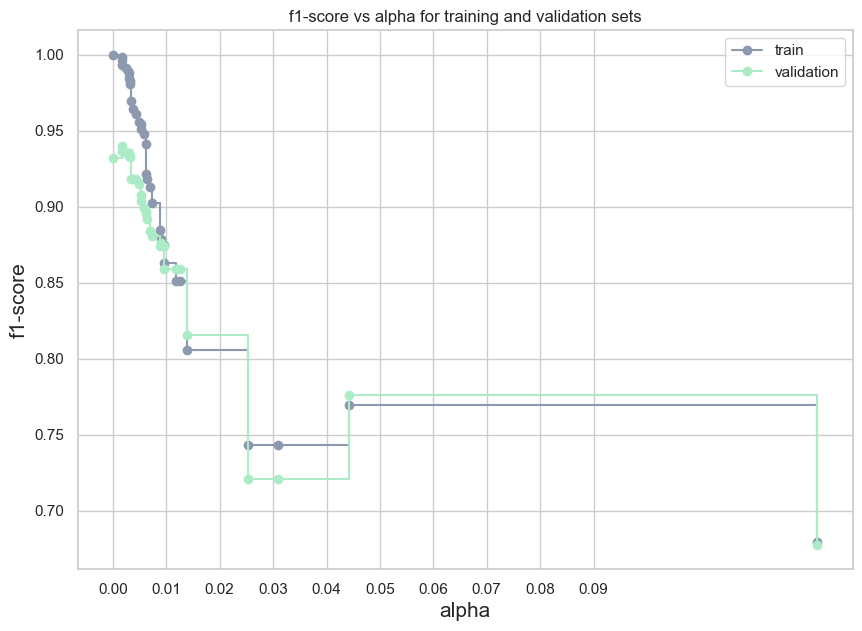

In [176]:
# evaluating the different trees for the different ccp_alphas and plotting the results
f1score_train = []
f1score_val = []
overfitting = []

for tree in trees:
    # getting the predictions for training dataset
    y_train_pred = tree.predict(x_train)
    # getting the predictions for validation dataset
    y_val_pred = tree.predict(x_val)

    # checking the f1score for training
    value_train = f1_score(y_train, y_train_pred)
    # checking the f1score for validation
    value_val = f1_score(y_val, y_val_pred)

    # appending f1scores in the corresponding list
    f1score_train.append(value_train)
    f1score_val.append(value_val)
    overfitting.append(value_train - value_val)
    
# transforming the values into a pandas dataframe for better understanding
ccp_scores = pd.DataFrame({'f1score_train': f1score_train, 'f1score_val': f1score_val, 'overfitting': overfitting}, index = trees)

# ploting the f1-scores fot the different alphas
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_xlabel('alpha', fontsize = 15)
ax.set_ylabel('f1-score', fontsize = 15)
ax.set_title('f1-score vs alpha for training and validation sets')
ax.plot(ccp_alphas, f1score_train, marker = 'o', label = 'train', drawstyle = 'steps-post', color = '#8d99ae')
ax.plot(ccp_alphas, f1score_val, marker = 'o', label = 'validation', drawstyle = 'steps-post', color = '#abebc6')
plt.xticks(np.arange(0, 0.1, 0.01))
ax.legend()
plt.show()

In the plot, we can see that the 0 alpha corresponds to the unprunned tree, and when the alpha increases, the f1-score will decrease since the tree will become much shorter and more impure. We must chose an alpha that simultaneosly maximizes the f1-score for the validation dataset and minimizes the overfitting value (the difference between the f1-score for validation and training dataset). So, looking at the dataframe that is shown below, we would chose `ccp_alpha` = 0.008771929824561401

In [177]:
ccp_scores

f1score_train  \
DecisionTreeClassifier(random_state=5)                   1.000000   
DecisionTreeClassifier(ccp_alpha=0.001674107142...       0.998267   
DecisionTreeClassifier(ccp_alpha=0.001719576719...       0.996528   
DecisionTreeClassifier(ccp_alpha=0.001756440281...       0.993031   
DecisionTreeClassifier(ccp_alpha=0.002380952380...       0.991274   
DecisionTreeClassifier(ccp_alpha=0.002857142857...       0.989547   
DecisionTreeClassifier(ccp_alpha=0.002954306722...       0.987826   
DecisionTreeClassifier(ccp_alpha=0.003039215686...       0.984402   
DecisionTreeClassifier(ccp_alpha=0.003174603174...       0.982759   
DecisionTreeClassifier(ccp_alpha=0.003193499622...       0.981002   
DecisionTreeClassifier(ccp_alpha=0.003428571428...       0.969283   
DecisionTreeClassifier(ccp_alpha=0.003809523809...       0.964346   
DecisionTreeClassifier(ccp_alpha=0.004285714285...       0.960818   
DecisionTreeClassifier(ccp_alpha=0.004861111111...       0.955932   
DecisionTreeClassifier(ccp_alpha=0.005341889880...       0.954622   
DecisionTreeClassifier(ccp_alpha=0.005357142857...       0.951096   
DecisionTreeClassifier(ccp_alpha=0.005748299319...       0.947547   
DecisionTreeClassifier(ccp_alpha=0.006181318681...       0.941569   
DecisionTreeClassifier(ccp_alpha=0.006218112244...       0.921569   
DecisionTreeClassifier(ccp_alpha=0.006471338535...       0.918567   
DecisionTreeClassifier(ccp_alpha=0.007032967032...       0.912972   
DecisionTreeClassifier(ccp_alpha=0.007391304347...       0.902597   
DecisionTreeClassifier(ccp_alpha=0.008771929824...       0.884488   
DecisionTreeClassifier(ccp_alpha=0.009103396603...       0.878837   
DecisionTreeClassifier(ccp_alpha=0.009484265734...       0.874587   
DecisionTreeClassifier(ccp_alpha=0.009490925740...       0.863014   
DecisionTreeClassifier(ccp_alpha=0.011814856150...       0.851351   
DecisionTreeClassifier(ccp_alpha=0.012556309104...       0.851351   
DecisionTreeClassifier(ccp_alpha=0.013901601830...       0.805861   
DecisionTreeClassifier(ccp_alpha=0.025222297052...       0.743434   
DecisionTreeClassifier(ccp_alpha=0.030900828655...       0.743434   
DecisionTreeClassifier(ccp_alpha=0.044260305841...       0.769492   
DecisionTreeClassifier(ccp_alpha=0.131907224001...       0.679245   

                                                    f1score_val  overfitting  
DecisionTreeClassifier(random_state=5)                 0.932271     0.067729  
DecisionTreeClassifier(ccp_alpha=0.001674107142...     0.936508     0.061759  
DecisionTreeClassifier(ccp_alpha=0.001719576719...     0.936508     0.060020  
DecisionTreeClassifier(ccp_alpha=0.001756440281...     0.939759     0.053272  
DecisionTreeClassifier(ccp_alpha=0.002380952380...     0.935484     0.055790  
DecisionTreeClassifier(ccp_alpha=0.002857142857...     0.935484     0.054063  
DecisionTreeClassifier(ccp_alpha=0.002954306722...     0.935484     0.052342  
DecisionTreeClassifier(ccp_alpha=0.003039215686...     0.935484     0.048918  
DecisionTreeClassifier(ccp_alpha=0.003174603174...     0.932806     0.049952  
DecisionTreeClassifier(ccp_alpha=0.003193499622...     0.932806     0.048195  
DecisionTreeClassifier(ccp_alpha=0.003428571428...     0.918288     0.050995  
DecisionTreeClassifier(ccp_alpha=0.003809523809...     0.918288     0.046058  
DecisionTreeClassifier(ccp_alpha=0.004285714285...     0.918288     0.042530  
DecisionTreeClassifier(ccp_alpha=0.004861111111...     0.914729     0.041204  
DecisionTreeClassifier(ccp_alpha=0.005341889880...     0.907692     0.046930  
DecisionTreeClassifier(ccp_alpha=0.005357142857...     0.903475     0.047621  
DecisionTreeClassifier(ccp_alpha=0.005748299319...     0.899225     0.048322  
DecisionTreeClassifier(ccp_alpha=0.006181318681...     0.896552     0.045018  
DecisionTreeClassifier(ccp_alpha=0.006218112244...     0.895522     0.026046  
DecisionTreeClassifier(ccp_alpha=0.006471338535...     0.892193     0.026373  
DecisionTreeClassifier(ccp_alpha=0.00703296703

Looking at the prepruning results and the postpruning results we can see that the better ones are resulting from postpruning techniques. Although we should keep in mind that this method takes more time, since it has to grow the full tree and then cut it, and the overfitting is bigger.
So, we found the best combination of parameters, that maximizes the f1-score for the validation dataset. We can run a decision tree classifier with those parameters and see the performance of the algorithm.

In [178]:
# defining an instance of MLPClassifier with the best set of parameters found above

dt_with_best = DecisionTreeClassifier(random_state = 5, criterion = 'gini', max_depth = 6, max_features = None,
                                      max_leaf_nodes = None, min_samples_leaf = 50, splitter = 'best')
dt_with_best2 = DecisionTreeClassifier(random_state = 5, ccp_alpha = 0.008771929824561401)

In [179]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_dt = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], 
                     index = ['decision tree best parameters (prepruning)', 'decision tree best parameters (postpruning)'])
show_results(df_dt, 
             [data, target, dt_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, dt_with_best2, rskf, [True, True], [True, False, False], False]
            )

Train  \
decision tree best parameters (prepruning)    0.84705+/-0.0065   
decision tree best parameters (postpruning)  0.88216+/-0.01214   

                                                    Validation         Time  \
decision tree best parameters (prepruning)   0.83362+/-0.03689  0.002+/-0.0   
decision tree best parameters (postpruning)  0.84416+/-0.03519  0.004+/-0.0   

                                            Overfitting  
decision tree best parameters (prepruning)      0.01343  
decision tree best parameters (postpruning)       0.038

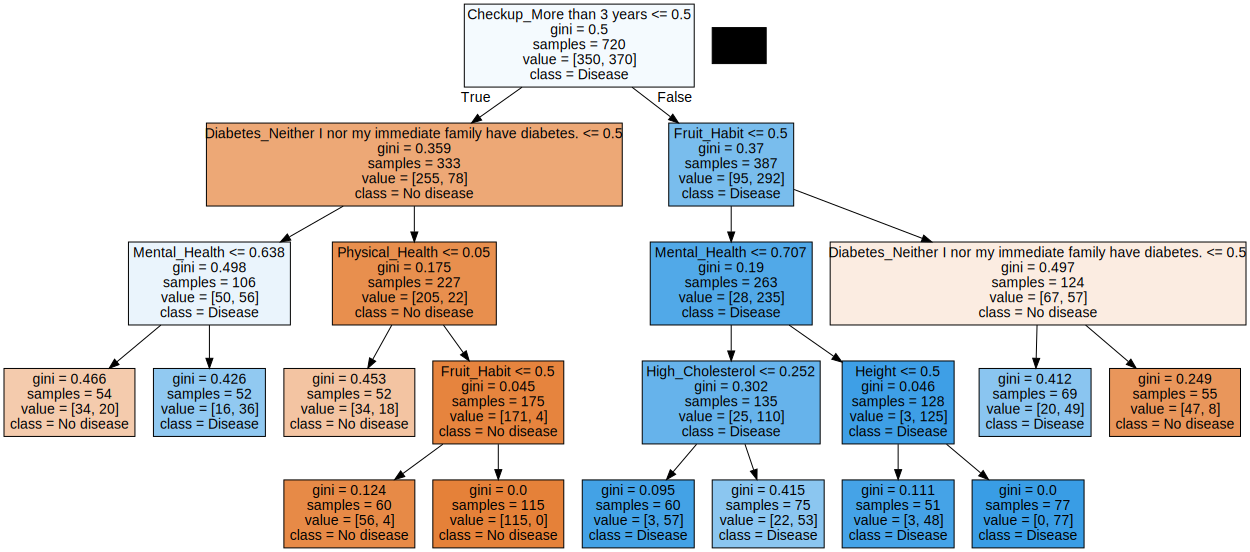

In [180]:
plot_tree(dt_with_best, data_encoded)

<a id = "support-vector-machine"></a>

### 5.6. Support vector machine

Support vector machines (SVMs) are a set of supervised learning methods considered to be a classification approach but can be employed in both types of classification, regression problems and outliers detection. It can easily handle multiple continuous and categorical variables.

These methods are effective in high dimensional spaces and in cases where number of dimensions is greater than the number of samples. The name comes from the support vectors, a subset of tr that are used in the decision. Some disadvantages of the model are that in the case of number of features being greater than the number of samples, there is a big chance of overfitting and SVMs need a five fold cross-validation to make the estimated probabilities.

SVMs are particularly effective in cases where the data is linearly separable, but they can also be used in non-linear ck«ases by using the kernel trick, which maps the data into a higher-dimensional space where it becomes linearly separable. It is a versatile method as we can use different Kernel functions for the decision function (like linear, polynomial, Radial Basis Function, etc.), and there is even the possibility to use custom kernels. 

The main idea behind SVM classifier is to find a hyperplane that maximally separates the data points of different classes. In other words, we are looking for the largest margin between the two classes, so a line that maximizes the margins between the line and the closest data points.

It was not one of the best models with the default parameters, so we choose not to tune it.

<a id = "ridge-classifier"></a>

### 5.7. Ridge classifier

This algorithm starts by converting binary the two classes in the target to {-1, 1}, and then trats the problem as a regression problem, minimizing a penalized residual sum of squares. If the regressor's prediction is positive, then the label of the observation will be 1, if the regressor's prediction is negative, the label of the observation will be -1. Ridge classifier is similar to a logistic regression, but it is faster and can be very versatile, as it allows different numerical solvers. Usually, the main reason of overfitting is the model complexity, and regularization can control the model complexity, because it penalizes higher terms in the model, meaning that when a regularization term is added, the model will minimize not only the loss function, but also the complexity. So, Ridge classifier introduces the L2 regularization. Instead of minimizing the cost function of the logistic regression, Ridge cassifier penalizes the sum of the squared values of the weights, so if the weights take large values the optimization function is penalized.

$$ \min_{w} C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) + r(w) $$

, where $ r(w) $ is in this case:

$$ \frac{1}{2}\|w\|_2^2 = \frac{1}{2}w^T w $$

Although our model was not performing that well using the default parameters, we can try to tune it. The first parameter we can change is **alpha**, which is a regularizaion strenght that reduces the variance of the estimates. Larger values specify stronger regularization, so it can be a solution for overfitting.

Solving a Ridge classifier is an optimization problem, as the algorithm tries to find the parameter weights that minimize a cost function. Scikit-learn provides different **solvers**:
- `svd` uses a Singular Value Decomposition of X to derive the coefficients.
- `cholesky` calculates the hessian matrix and solves the resulting linear system.
- `sparse_cg` more apporpriate than the last one for large-scale data.
- `lsqr`it is the fastest.
- `sag` uses a Stochastic Average Gradient descent. It is faster than the other solvers for large datasets (both large number of samples and large number of features).
- `saga` is almost the same as the above, but it is an unbiased and more flixible version. These two solvers need the features to be approximately in the same scale in order to guarantee fast convergence.
- `lbfgs` its performance is affected by poorly scaled datasets and by datasets with one-hot encoded categorical features with rare categories.
We still have the option to choose `auto`, and the algorithm chooses the solver automatically based on the type of data.

Other parameter we can change is **class_weight** which controls the weights associated with classes. If we set it to `balanced`, the values of y are used to automatically adjust weights inversely proportional to class frequencies in the training data, otherwise, all classes have weight one.

https://www.youtube.com/watch?v=N7O8nqZ2CKg

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

https://www.cis.uni-muenchen.de/~stef/seminare/klassifikation_2021/referate/LogisticRegressionRidgeClassifier.pdf

https://stackoverflow.com/questions/53911663/what-does-sklearn-ridgeclassifier-do

In [181]:
# defining an instance of RidgeClassifier with the default parameters, except random_state in order to replicate results

rc = RidgeClassifier(random_state = 5)

In [182]:
# defining a dictionary with the possible values for the parameters that we want to test

rc_parameter_space = {
    'alpha': [0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

In [183]:
# calling the previous defined function that searches for the best combinations of parameters for our model

rc_best = best_parameters(data, target, rc, rc_parameter_space, [True, True], True)
rc_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'alpha': 0.4, 'class_weight': None, 'solver': 'svd'}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
47       0.855858        0.040808  0.861470   
42       0.855858        0.040808  0.861682   
46       0.855858        0.040808  0.861476   
71       0.855858        0.040808  0.862536   
66       0.855858        0.040808  0.862536   
..            ...             ...       ...   
50       0.851598        0.037478  0.860700   
51       0.851598        0.037478  0.861288   
52       0.851598        0.037478  0.860860   
53       0.851598        0.037478  0.860860   
48       0.851598        0.037478  0.860860   

                                           Parameters  Overfitting  
47  {'alpha': 0.4, 'class_weight': None, 'solver':...     0.005613  
42  {'alpha': 0.4, 'class_weight': None, 'solver':...     0.005824  
46  {'alpha': 0.4, 'class_weight': None, 'solver':...     0.005618  
71  {'alpha': 0.6, 'class_weight': None, 'solver':...     0.006679  
66  {'alpha': 0.6, 'class_weight': None, 'solver':...     0.006679  
..                                                ...          ...  
50  {'alpha': 0.5, 'class_weight': 'balanced', 'so...     0.009102  
51  {'alpha': 0.5, 'class_weight': 'balanced', 'so...     0.009690  
52  {'alpha': 0.5, 'class_weight': 'balanced', 'so...     0.009262  
53  {'alpha': 0.5, 'class_weight': 'balanced', 'so...     0.009262  
48  {'alpha': 0.5, 'class_weight': 'balanced', 'so...     0.009262  

[96 rows x 5 columns]

In [184]:
# defining an instance of RidgeClassifier with the best set of parameters found above

rc_with_best = RidgeClassifier(random_state = 5, alpha = 0.4, class_weight = None, solver = 'svd')

In [185]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_rc = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['ridge best parameters'])
show_results(df_rc, [data, target, rc_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation         Time  \
ridge best parameters  0.87178+/-0.00424  0.85729+/-0.03964  0.005+/-0.0   

                      Overfitting  
ridge best parameters     0.01449

Given the simplicity of the model, and the time it took to train it, these are good results, even if they are not the best, when compared to other complex algorithms we can use.

<a id = "ensemble-methods"></a>

### 5.8. Ensemble methods

Ensemble methods are a machine learning technique that combines the predictions of multiple individual models to make more accurate predictions than any of the individual models alone. The basic idea is to train several models independently on the same dataset, and then combine their predictions to obtain a more accurate prediction. Usually they can improve the predictive performance of a model by reducing overfitting and increasing the generalization ability of the model. There are several ways to combine the predictions of multiple models, including: voting, averaging and weighted averaging.

<a id = "bagging"></a>

#### 5.8.1. Bagging

A Bagging classifier is an ensemble method that fits independent base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.

We can change the base classifiers we are going to use to bagging, by changing the parameter **estimator**. Usually we use KNN or a Decision Tree. Decision Trees are the most common algorithm used in bagging, since they perform well in general and they have high variance in the results (if we slightly change our data, the results from a Decision Tree will be completly different), which is good in bagging. But, other algorithms can be used like, for example, k-nearest neighbors algorithm where k is low, in order to maximize the variance.

By deafult, we use 10 models in bagging, but we can change the parameter **n_estimators**. Usually increasing the number of estimators on the bagging leads to improves in the model's performance, until it reaches a certain point and it stabilizes.

The **max_samples** is the number of samples to draw from the independent variables to train each base estimator (with replacement by default). As we decrease the number of observations used, the variance in the results will be higher, which can lead to better performance in the final essemble model. 

Changing the **max_features** parameter will change the number of features used to train each model inside the bagging algorithm. So, if we change the number of features used, and apply the bagging with a Decision Tree we will get a Random Forest, that is why we will not change jointly this parameter.

**Bootstrap** and **bootstrap_features** control whether samples and features are drawn with or withour replacement.

In [186]:
# defining an instance of BaggingClassifier with the default parameters, except random_state in order to replicate results

bg = BaggingClassifier(random_state = 5, n_jobs = -1) 

In [187]:
# defining a dictionary with the possible values for the parameters that we want to test

bg_parameter_space = {
    'base_estimator': [DecisionTreeClassifier(random_state = 5), KNeighborsClassifier()],
    'n_estimators': [2, 5, 10, 20, 30, 50, 100, 150, 200],
    'max_samples': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
    'max_features': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [188]:
# calling the previous defined function that searches for the best combinations of parameters for our model

bg_best = best_parameters(data, target, bg, bg_parameter_space, [True, True], True)
bg_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'base_estimator': DecisionTreeClassifier(random_state=5), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
1239       0.966804        0.018624  1.000000   
1240       0.965052        0.019364  1.000000   
849        0.964814        0.019462  0.999807   
915        0.963421        0.016745  1.000000   
1241       0.963416        0.019938  1.000000   
...             ...             ...       ...   
1647       0.555114        0.301682  0.545681   
2277       0.551848        0.219657  0.563180   
1665       0.551691        0.297898  0.522532   
2268       0.541885        0.244243  0.576795   
2304       0.533099        0.222863  0.550167   

                                             Parameters  Overfitting  
1239  {'base_estimator': DecisionTreeClassifier(rand...     0.033196  
1240  {'base_estimator': DecisionTreeClassifier(rand...     0.034948  
849   {'base_estimator': DecisionTreeClassifier(rand...     0.034993  
915   {'base_estimator': DecisionTreeClassifier(rand...     0.036579  
1241  {'base_estimator': DecisionTreeClassifier(rand...     0.036584  
...                                                 ...          ...  
1647  {'base_estimator': KNeighborsClassifier(), 'bo...     0.009432  
2277  {'base_estimator': KNeighborsClassifier(), 'bo...     0.011332  
1665  {'base_estimator': KNeighborsClassifier(), 'bo...     0.029158  
2268  {'base_estimator': KNeighborsClassifier(), 'bo...     0.034911  
2304  {'base_estimator': KNeighborsClassifier(), 'bo...     0.017069  

[2592 rows x 5 columns]

In [189]:
# defining an instance of BaggingClassifier with the best set of parameters found above

bg_with_best = BaggingClassifier(random_state = 5, base_estimator = DecisionTreeClassifier(random_state = 5), bootstrap = False,
                                 bootstrap_features = False, max_features = 0.8, max_samples = 1.0, n_estimators = 100)

In [190]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_bg = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['bagging best parameters'])
show_results(df_bg, [data, target, bg_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation          Time  \
bagging best parameters  1.0+/-0.0  0.98348+/-0.01757  0.263+/-0.02   

                        Overfitting  
bagging best parameters     0.01652

<a id = "random-forest"></a>

#### 5.8.2. Random forest

A Random Forest is an ensemble method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting.

The sub-sample size is controlled with the **max_samples** parameter if **bootstrap** = True (default), otherwise the whole dataset is used to build each tree (**bootstrap** = False).

There are many parameters we can tune in this method but the main ones are the number of trees in the forest **n_estimators** and the number of features considered for splitting at each leaf node **max_features**.

We can also change the parameters controlling the size of the trees (**max_depth**, **min_samples_leaf**, etc.), to prevent a high memory consumption and complexity that derives from fully grown and unpruned trees that come from the default parameters, that tend to be very large on a dataset like ours.

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

By default, we use 100 trees in random forests, but we can change the parameter **n_estimators**. It is natural that the score of the random forest will stabilize after increasing this parameter up to a certain value.

The maximum depth of the tree is controlled by **max_depth**. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than **min_samples_split** samples.

In [191]:
# defining an instance of RandomForestClassifier with the default parameters, except random_state in order to replicate results

rf = RandomForestClassifier(random_state = 5, n_jobs = -1)

In [192]:
# defining a dictionary with the possible values for the parameters that we want to test

rf_parameter_space = {
    'bootstrap': [True, False], 
    'max_depth': [2, 6, 10, 15, 20, 60, 80, None], #default is none
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [40, 80, 100, 200, 300], # default is 100
    'min_samples_split': [5, 10, 25, 50, 100, 200]
}

In [193]:
# calling the previous defined function that searches for the best combinations of parameters for our model

rf_best = best_parameters(data, target, rf, rf_parameter_space, [True, True], True)
rf_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
1354       0.953157        0.027371  1.000000   
1204       0.953157        0.027371  1.000000   
1084       0.953157        0.027371  1.000000   
1083       0.953157        0.027371  1.000000   
994        0.953157        0.027371  1.000000   
...             ...             ...       ...   
785        0.712769        0.088883  0.757016   
784        0.712769        0.088883  0.757016   
783        0.712769        0.088883  0.757016   
782        0.712769        0.088883  0.757016   
1439       0.712769        0.088883  0.757016   

                                             Parameters  Overfitting  
1354  {'bootstrap': False, 'max_depth': None, 'max_f...     0.046843  
1204  {'bootstrap': False, 'max_depth': 60, 'max_fea...     0.046843  
1084  {'bootstrap': False, 'max_depth': 20, 'max_fea...     0.046843  
1083  {'bootstrap': False, 'max_depth': 20, 'max_fea...     0.046843  
994   {'bootstrap': False, 'max_depth': 15, 'max_fea...     0.046843  
...                                                 ...          ...  
785   {'bootstrap': False, 'max_depth': 2, 'max_feat...     0.044246  
784   {'bootstrap': False, 'max_depth': 2, 'max_feat...     0.044246  
783   {'bootstrap': False, 'max_depth': 2, 'max_feat...     0.044246  
782   {'bootstrap': False, 'max_depth': 2, 'max_feat...     0.044246  
1439  {'bootstrap': False, 'max_depth': None, 'max_f...     0.044246  

[1440 rows x 5 columns]

In [194]:
# defining an instance of RandomForestClassifier with the best set of parameters found above

rf_with_best = RandomForestClassifier(random_state = 5, bootstrap = False, max_depth = 15, max_features = 'sqrt',
                                      min_samples_split = 5, n_estimators = 200)

In [195]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_rf = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['random forest best parameters'])
show_results(df_rf, [data, target, rf_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation          Time  \
random forest best parameters  1.0+/-0.0  0.98611+/-0.01467  0.274+/-0.01   

                              Overfitting  
random forest best parameters     0.01389

<a id = "adaboost"></a>

#### 5.8.3. AdaBoost

AdaBoost (Adaptive Boosting) is an ensemble method, which means that it combines the predictions of multiple "weak" models to create a stronger one. The weak models are typically stumps (decicion trees with only one split and two leafs), and the final prediction is made by combining the predictions of all of the weak models. During the training process, AdaBoost assigns higher weights to the training examples that are misclassified by the previous models, so that the next model in the ensemble focuses more on these difficult examples. It is a model that is relatively resistant to overfitting.

There are some differences between AdaBoost and GradientBoosting, which are: the objective function in AdaBoost is to minimize an exponential loss function, while in GradientBoosting it minimizes a differentiable loss function; the weak learners in AdaBoost are stumps as mentioned before, while GradientBoosting can use a variety of different models as weak learners, including decision trees, linear models, etc. AdaBoost tends to produce relatively simple models, as it only uses a small number of weak learners, while Gradient boosting, on the other hand, can produce more complex models by using a larger number of weak learners and allowing them to make more splits.

We can change the number of weak learners that are used in the AdaBoost ensemble, by changing **n_estimators**. Increasing the value of this parameter will generally improve the performance of the model, but at the cost of increased computational time. The **learning_rate** controls the scaling factor that is applied to the weights of the weak learners, and increasing this value will incease the influence of each weak learner, but this situation can lead to overfitting. 

We can also change the **base_estimator** (which by default is a decision tree with a depth of 1, this is, a stump) and change the parameters of this estimator by using **base_estimator__parameter_name**. 

It was not one of the best models with the default parameters, so we choose not to tune it.

<a id = "gradientboosting"></a>

#### 5.8.4. GradientBoosting

In GradientBoosting classifiers, weak learners are combined sequentially, where each of which is trained to correct the mistakes of the previous models, to create a strong predictive model. The objective of this classifier is to train a sequence of decision trees. The training process involves minimizing the loss (this is, the difference between the actual target value and the predicted value for the training data), by operating similarly to gradient descent in neural networks. Because of this, the loss function must be differentiable.

GradientBoosting algorithms use decision trees, and as they are added to the model over time, the values of the previous trees are left unchanged. And the final model is a weighted sum of the individual decision trees.

One key parameter that can be specified when creating an instance of this class is **loss**, which represents the loss function to be minimized. `log_loss` is the same as used in logistic regression and it is a good choice for classification problems with probabilistic outputs. When loss is `exponential` this algorithm recovers the AdaBoost algorithm.

The **learning rate** shrinks the contribution of each tree by this factor (it scales the step length the gradient descent procedure). A smaller learning rate means that the model will require more trees to model the data, but the predictions will usually be more accurate.

The parameter **n_estimators** controls the number of weak learners (decision trees) to fit. Scikit learn documentation says that "Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance".

The number of features to consider when looking for the best split are changed by changing **max_features**. This can be used to control the complexity of the decision trees. If `sqrt`, then max_features = sqrt(n_features); if `log2`, then max_features = log2(n_features); if `None`, then it uses all the features; and we can also provide the number of features we want to use or a percentage of the features we want.

The maximum depth of the individual decision trees can be controled using `max_depth`. Deeper trees can model more complex relationships in the data, but can also be more prone to overfitting, although the best value depends on the interaction of the input variables. When `None`, this classifier grows full trees.

In [196]:
# defining an instance of GradientBoostingClassifier with the default parameters, except random_state in order to replicate results

gb = GradientBoostingClassifier(random_state = 5)

In [197]:
# defining a dictionary with the possible values for the parameters that we want to test

gb_parameter_space = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.3, 0.4, 0.5, 0.7, 1],
    'n_estimators': [40, 80, 100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2, 6, 10, 15, 20, 60, 80, None]
}

In [198]:
# calling the previous defined function that searches for the best combinations of parameters for our model

gb_best = best_parameters(data, target, gb, gb_parameter_space, [True, True], True)
gb_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 40}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
252       0.968828        0.020367  1.000000   
222       0.968828        0.020367  1.000000   
276       0.968828        0.020367  1.000000   
270       0.968828        0.020367  1.000000   
258       0.968828        0.020367  1.000000   
..             ...             ...       ...   
14        0.846334        0.042165  0.858752   
157       0.845574        0.041720  0.853584   
158       0.844288        0.044155  0.859311   
12        0.831297        0.045683  0.841739   
156       0.828665        0.046245  0.841449   

                                            Parameters  Overfitting  
252  {'learning_rate': 0.01, 'loss': 'exponential',...     0.031172  
222  {'learning_rate': 0.01, 'loss': 'exponential',...     0.031172  
276  {'learning_rate': 0.01, 'loss': 'exponential',...     0.031172  
270  {'learning_rate': 0.01, 'loss': 'exponential',...     0.031172  
258  {'learning_rate': 0.01, 'loss': 'exponential',...     0.031172  
..                                                 ...          ...  
14   {'learning_rate': 0.01, 'loss': 'log_loss', 'm...     0.012418  
157  {'learning_rate': 0.01, 'loss': 'exponential',...     0.008010  
158  {'learning_rate': 0.01, 'loss': 'exponential',...     0.015023  
12   {'learning_rate': 0.01, 'loss': 'log_loss', 'm...     0.010442  
156  {'learning_rate': 0.01, 'loss': 'exponential',...     0.012784  

[2016 rows x 5 columns]

In [199]:
# defining an instance of GradientBoostingClassifier with the best set of parameters found above

gb_with_best = GradientBoostingClassifier(random_state = 5, learning_rate = 0.01, loss = 'exponential', max_depth = 20, 
                                          max_features = 'sqrt', n_estimators = 40)

In [200]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_gb = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['gradientboosting best parameters'])
show_results(df_gb, [data, target, gb_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation          Time  \
gradientboosting best parameters  1.0+/-0.0  0.98715+/-0.01469  0.161+/-0.01   

                                 Overfitting  
gradientboosting best parameters     0.01285

<a id = "extra-trees"></a>

#### 5.8.5. Extra trees

Extra trees classifier is an ensemble learning method that constructs a multitude of decision trees (combination of multiple decision trees) during training and the output is the class that corresponds to the model of the classes (majority vote). 

Extra trees and random forests have a lot in common, as both of them are composed by numerous decision trees, the final decision is obtained taking into account the prediction of every tree, and when selecting the partition of each node, both of them randomly choose a subset of features. However, there are two major differences between these two algorithms:
1. Random forest uses subsamples of the data (bootstrap samples) to train the model, making sure that the decision trees are sufficiently different. Extra trees uses the entire dataset (we can change the parameter bootstrap, but by default the sklearn implementation usesthe entire input sample).
1. Extra trees randomly selects the value to split nodes, while random forest chooses the optimum split. But, once the split points are selected, both methods choose the best one between all the subset of features.

Knowing these differences, extra trees algorithm is faster since it randomly chooses the split point instead of calculating the optimal one. The decision trees in extra trees are usually bigger having more levels and nodes.

For fine-tune the model's performance we can change some parameters, like for example **n_estimators**. Increasing the number of trees will typically improve the model's performance, but it may also increase the training time and make the model more prone to overfitting, as in the others tree based models. As in decision trees and random forests, we can preprune and postprune the trees by changing some parameters like: **max_depth**, **min_samples_split**, **min_samples_leaf**, **max_leaf_nodes**, etc.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c

https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/

https://www.kaggle.com/code/hkapoor/random-forest-vs-extra-trees/notebook

In [201]:
# defining an instance of ExtraTreesClassifier with the default parameters, except random_state in order to replicate results

et = ExtraTreesClassifier(random_state = 5, n_jobs = -1)

In [202]:
# defining a dictionary with the possible values for the parameters that we want to test

et_parameter_space = {
    'n_estimators': [40, 80, 100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 6, 10, 15, 20, 60, 80, None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'min_samples_split': [5, 10, 25, 50, 100, 200]
}

In [203]:
# calling the previous defined function that searches for the best combinations of parameters for our model

et_best = best_parameters(data, target, et, et_parameter_space, [True, True], True)
et_best

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 80}
------------------------------------------------------------------------------------------------------------------------


F1 Validation  Std Validation  F1 Train  \
3121       0.960576        0.025368  0.998461   
3841       0.960576        0.025368  0.998461   
2674       0.959907        0.026129  0.999230   
2853       0.959907        0.026129  0.999230   
2584       0.959907        0.026129  0.999230   
...             ...             ...       ...   
449        0.740885        0.066850  0.772883   
359        0.740885        0.066850  0.772883   
1077       0.740885        0.066850  0.772883   
269        0.740885        0.066850  0.772883   
1259       0.740885        0.066850  0.772883   

                                             Parameters  Overfitting  
3121  {'bootstrap': False, 'criterion': 'entropy', '...     0.037885  
3841  {'bootstrap': False, 'criterion': 'log_loss', ...     0.037885  
2674  {'bootstrap': False, 'criterion': 'gini', 'max...     0.039323  
2853  {'bootstrap': False, 'criterion': 'gini', 'max...     0.039323  
2584  {'bootstrap': False, 'criterion': 'gini', 'max...     0.039323  
...                                                 ...          ...  
449   {'bootstrap': True, 'criterion': 'gini', 'max_...     0.031998  
359   {'bootstrap': True, 'criterion': 'gini', 'max_...     0.031998  
1077  {'bootstrap': True, 'criterion': 'entropy', 'm...     0.031998  
269   {'bootstrap': True, 'criterion': 'gini', 'max_...     0.031998  
1259  {'bootstrap': True, 'criterion': 'entropy', 'm...     0.031998  

[4320 rows x 5 columns]

In [204]:
# defining an instance of ExtraTreesClassifier with the best set of parameters found above

et_with_best = ExtraTreesClassifier(random_state = 5, n_jobs = -1, bootstrap = False, criterion = 'entropy', max_depth = 10,
                                    max_features = None, min_samples_split = 5, n_estimators = 80)

In [205]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_et = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['extra trees best parameters'])
show_results(df_et, [data, target, et_with_best, rskf, [True, True], [True, False, False], False])

Train         Validation  \
extra trees best parameters  0.99906+/-0.00124  0.98428+/-0.01531   

                                     Time Overfitting  
extra trees best parameters  0.097+/-0.01     0.01478

<a id = "stacking"></a>

#### 5.8.6. Stacking

Stacking is a method of ensemble learning in machine learning, where multiple models are trained and their predictions are combined to produce a final prediction. The motivation for stacking is to leverage the strengths of different models in order to improve the overall performance of the ensemble.

https://towardsdatascience.com/stacked-ensembles-improving-model-performance-on-a-higher-level-99ffc4ea5523

Stacking is a useful technique when the base models have complementary strengths, such as when some models are better at handling certain types of data or making certain types of predictions. By combining the predictions of these models, the ensemble can often achieve better performance than any individual model.

This method works by training a meta-model that combines the predictions of several base models. The base models are trained on the original training data, and then they make predictions on a separate holdout set. These predictions, along with the original input features, are used as input to the meta-model, which is trained to make the final prediction. (*Mastering Machine Learning with Python in Six Steps*)

Since our best previous **estimators** were GradientBoosting, Random Forest, Extra Trees and Bagging, so these are the models we are going to stack together, trying different combinations.

The **final_estimator** parameter specifies the model that is used as the meta-model in the stacking ensemble. As default it is a `LogisticRegression`, which takes as input the predictions of the base models, along with the original input features, and makes a final prediction based on this combined information.

Other parameters can be changed like **cv** which determines the cross-validation splitting strategy to train the final_estimator; or like the **stack_method** which specifies the method used to combine the predictions of the base models when training the meta-model. When the final_estimator is a classifier, this parameter should be `predict_proba` (which is our case), and when the final_estimator is a regressor, this parameter should be `predict`.

In [206]:
# creating a list of the two best estimators obtained before

estimators1 = [('gb', gb_with_best),
               ('rf', rf_with_best)]

estimators2 = [('gb', gb_with_best),
               ('et', et_with_best)]

estimators3 = [('gb', gb_with_best),
               ('bg', bg_with_best)]

estimators4 = [('rf', rf_with_best),
               ('et', et_with_best)]

estimators5 = [('rf', rf_with_best),
               ('bg', bg_with_best)]

estimators6 = [('et', et_with_best),
               ('bg', bg_with_best)]

In [207]:
# defining an instance of StackingClassifier with the default parameters, except random_state in order to replicate results

s1 = StackingClassifier(estimators = estimators1, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)
s2 = StackingClassifier(estimators = estimators2, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)
s3 = StackingClassifier(estimators = estimators3, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)
s4 = StackingClassifier(estimators = estimators4, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)
s5 = StackingClassifier(estimators = estimators5, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)
s6 = StackingClassifier(estimators = estimators6, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf)

In [208]:
# calling the defined function to see the performance of the decision tree with the set parameters found

df_s = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], 
                    index = ['stacking: gradient boosting and random forest', 
                             'stacking: gradient boosting and extra trees', 
                             'stacking: gradient boosting and bagging', 
                             'stacking: random forest and extra trees', 
                             'stacking: random forest and bagging', 
                             'stacking: extra trees and bagging']
                   )
show_results(df_s, 
             [data, target, s1, rskf, [True, True], [True, False, False], False],
             [data, target, s2, rskf, [True, True], [True, False, False], False],
             [data, target, s3, rskf, [True, True], [True, False, False], False],
             [data, target, s4, rskf, [True, True], [True, False, False], False],
             [data, target, s5, rskf, [True, True], [True, False, False], False],
             [data, target, s6, rskf, [True, True], [True, False, False], False]
            )

Train  \
stacking: gradient boosting and random forest          1.0+/-0.0   
stacking: gradient boosting and extra trees    0.99992+/-0.00032   
stacking: gradient boosting and bagging                1.0+/-0.0   
stacking: random forest and extra trees        0.99995+/-0.00026   
stacking: random forest and bagging                    1.0+/-0.0   
stacking: extra trees and bagging                      1.0+/-0.0   

                                                      Validation  \
stacking: gradient boosting and random forest  0.98587+/-0.01512   
stacking: gradient boosting and extra trees    0.98472+/-0.01626   
stacking: gradient boosting and bagging        0.98494+/-0.01651   
stacking: random forest and extra trees         0.9847+/-0.01629   
stacking: random forest and bagging            0.98611+/-0.01503   
stacking: extra trees and bagging              0.98638+/-0.01533   

                                                       Time Overfitting  
stacking: gradient boosting and random forest  3.992+/-0.27     0.01413  
stacking: gradient boosting and extra trees    3.352+/-0.03      0.0152  
stacking: gradient boosting and bagging        3.786+/-0.18     0.01506  
stacking: random forest and extra trees        3.103+/-0.07     0.01525  
stacking: random forest and bagging            3.448+/-0.02     0.01389  
stacking: extra trees and bagging              3.205+/-0.83     0.01362

In [209]:
# combining in a dataframe the validation results for the individual models and for the stacking models

stacking = pd.concat([df_gb['Validation'], df_rf['Validation'], df_et['Validation'], df_bg['Validation'], df_s['Validation']],
                     axis = 0)\
                    .to_frame(name = 'Validation').sort_values(by = 'Validation', ascending = False)
stacking

Validation
gradientboosting best parameters               0.98715+/-0.01469
stacking: extra trees and bagging              0.98638+/-0.01533
stacking: random forest and bagging            0.98611+/-0.01503
random forest best parameters                  0.98611+/-0.01467
stacking: gradient boosting and random forest  0.98587+/-0.01512
stacking: gradient boosting and bagging        0.98494+/-0.01651
stacking: gradient boosting and extra trees    0.98472+/-0.01626
stacking: random forest and extra trees         0.9847+/-0.01629
extra trees best parameters                    0.98428+/-0.01531
bagging best parameters                        0.98348+/-0.01757

So, the best option to combine two models using a stacking technique is to use bagging and extra trees, but the differences between our best models and the stacking ones are not that big. 

One reason why stacking can be effective is that it allows the base models to focus on what they do best, while the second-level model can learn to combine their predictions in a way that is more accurate overall. This can be particularly useful when the base models are diverse, because it can help to reduce the chances of overfitting. That is why there is not a big difference between using Extra Trees and Random Forests alone or using them combined with a Stacking algorithm, as these two models are similar. 

<a id = "models-different-combinations-preprocessing"></a>

### Models with different combinations of preprocessing

Preprocessing can have a significant impact on the performance of the models, and different preprocessing steps can be more or less effective depending on the specific dataset and model being used. It is often useful to try a few different combinations and compare the results to see which combination of preprocessing steps works best for this particular dataset and models.

So, we will try the differnt scaling methods, for the metric_features, and also to remove the outliers with IQR method (that was excluded during the preprocessing phase, because it deleted a high number of observations). 

In [210]:
df_preprocessing = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                                index = ['gradientboosting: iqr outlier removal, min-max scaler',
                                         'random forest: iqr outlier removal, min-max scaler',
                                         'extra trees: iqr outlier removal, min-max scaler',
                                         'bagging: iqr outlier removal, min-max scaler',
                                         'gradientboosting: iqr outlier removal, standard scaler',
                                         'random forest: iqr outlier removal, standard scaler',
                                         'extra trees: iqr outlier removal, standard scaler',
                                         'bagging: iqr outlier removal, standard scaler',
                                         'gradientboosting: iqr outlier removal, robust scaler',
                                         'random forest: iqr outlier removal, robust scaler',
                                         'extra trees: iqr outlier removal, robust scaler',
                                         'bagging: iqr outlier removal, robust scaler',
                                         'gradientboosting: with outliers, min-max scaler',
                                         'random forest: with outliers, min-max scaler',
                                         'extra trees: with outliers, min-max scaler',
                                         'bagging: with outliers, min-max scaler',
                                         'gradientboosting: with outliers, standard scaler',
                                         'random forest: with outliers, standard scaler',
                                         'extra trees: with outliers, standard scaler',
                                         'bagging: with outliers, standard scaler',
                                         'gradientboosting: with outliers, robust scaler',
                                         'random forest: with outliers, robust scaler',
                                         'extra trees: with outliers, robust scaler',
                                         'bagging: with outliers, robust scaler'])
show_results(df_preprocessing,
             [data, target, gb_with_best, rskf, [True, True], [True, False, False], True],
             [data, target, rf_with_best, rskf, [True, True], [True, False, False], True],
             [data, target, et_with_best, rskf, [True, True], [True, False, False], True],
             [data, target, bg_with_best, rskf, [True, True], [True, False, False], True],
             [data, target, gb_with_best, rskf, [True, True], [False, True, False], True],
             [data, target, rf_with_best, rskf, [True, True], [False, True, False], True],
             [data, target, et_with_best, rskf, [True, True], [False, True, False], True],
             [data, target, bg_with_best, rskf, [True, True], [False, True, False], True],
             [data, target, gb_with_best, rskf, [True, True], [False, False, True], True],
             [data, target, rf_with_best, rskf, [True, True], [False, False, True], True],
             [data, target, et_with_best, rskf, [True, True], [False, False, True], True],
             [data, target, bg_with_best, rskf, [True, True], [False, False, True], True],
             [data, target, gb_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, rf_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, et_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, bg_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, gb_with_best, rskf, [True, True], [False, True, False], False],
             [data, target, rf_with_best, rskf, [True, True], [False, True, False], False],
             [data, target, et_with_best, rskf, [True, True], [False, True, False], False],
             [data, target, bg_with_best, rskf, [True, True], [False, True, False], False],
             [data, target, gb_with_best, rskf, [True, True], [False, False, True], False],
             [data, target, rf_with_best, rskf, [True, True], [False, False, True], False],
             [data, target, et_with_best, rskf, [True, True], [False, False, True], False],
             [data, target, bg_with_best, rskf, [True, True], [False, False, True], False]
            )

Train  \
gradientboosting: iqr outlier removal, min-max ...          1.0+/-0.0   
random forest: iqr outlier removal, min-max scaler          1.0+/-0.0   
extra trees: iqr outlier removal, min-max scaler    0.99958+/-0.00084   
bagging: iqr outlier removal, min-max scaler                1.0+/-0.0   
gradientboosting: iqr outlier removal, standard...          1.0+/-0.0   
random forest: iqr outlier removal, standard sc...          1.0+/-0.0   
extra trees: iqr outlier removal, standard scaler   0.99956+/-0.00085   
bagging: iqr outlier removal, standard scaler               1.0+/-0.0   
gradientboosting: iqr outlier removal, robust s...          1.0+/-0.0   
random forest: iqr outlier removal, robust scaler           1.0+/-0.0   
extra trees: iqr outlier removal, robust scaler     0.99958+/-0.00084   
bagging: iqr outlier removal, robust scaler                 1.0+/-0.0   
gradientboosting: with outliers, min-max scaler             1.0+/-0.0   
random forest: with outliers, min-max scaler                1.0+/-0.0   
extra trees: with outliers, min-max scaler          0.99906+/-0.00124   
bagging: with outliers, min-max scaler                      1.0+/-0.0   
gradientboosting: with outliers, standard scaler            1.0+/-0.0   
random forest: with outliers, standard scaler               1.0+/-0.0   
extra trees: with outliers, standard scaler         0.99906+/-0.00124   
bagging: with outliers, standard scaler                     1.0+/-0.0   
gradientboosting: with outliers, robust scaler              1.0+/-0.0   
random forest: with outliers, robust scaler                 1.0+/-0.0   
extra trees: with outliers, robust scaler           0.99906+/-0.00124   
bagging: with outliers, robust scaler                       1.0+/-0.0   

                                                           Validation  \
gradientboosting: iqr outlier removal, min-max ...  0.97286+/-0.01253   
random forest: iqr outlier removal, min-max scaler  0.97472+/-0.01765   
extra trees: iqr outlier removal, min-max scaler     0.97334+/-0.0167   
bagging: iqr outlier removal, min-max scaler        0.96896+/-0.01885   
gradientboosting: iqr outlier removal, standard...   0.9713+/-0.01309   
random forest: iqr outlier removal, standard sc...  0.97403+/-0.01797   
extra trees: iqr outlier removal, standard scaler   0.97244+/-0.01696   
bagging: iqr outlier removal, standard scaler       0.96801+/-0.02013   
gradientboosting: iqr outlier removal, robust s...  0.97286+/-0.01317   
random forest: iqr outlier removal, robust scaler   0.97472+/-0.01765   
extra trees: iqr outlier removal, robust scaler      0.97334+/-0.0167   
bagging: iqr outlier removal, robust scaler         0.96946+/-0.01902   
gradientboosting: with outliers, min-max scaler     0.98715+/-0.01469   
random forest: with outliers, min-max scaler        0.98611+/-0.01467   
extra trees: with outliers, min-max scaler          0.98428+/-0.01531   
bagging: with outliers, min-max scaler              0.98348+/-0.01757   
gradientboosting: with outliers, standard scaler    0.98763+/-0.01471   
random forest: with outliers, standard scaler       0.98638+/-0.01449   
extra trees: with outliers, standard scaler         0.98428+/-0.01531   
bagging: with outliers, standard scaler             0.98393+/-0.01675   
gradientboosting: with outliers, robust scaler       0.98739+/-0.0146   
random forest: with outliers, robust scaler         0.98587+/-0.01492   
extra trees: with outliers, robust scaler           0.98428+/-0.01531   
bagging: with outliers, robust scaler               0.98348+/-0.01757   

                                                            Time Overfitting  
gradientboosting: iqr outlier removal, min-max ...  0.172+/-0.02     0.02714  
random forest: iqr outlier removal, min-max scaler  0.265+/-0.02     0.02528  
extra trees: iqr outlier removal, min-max scaler    0.094+/-0.01     0.02624  
bagging: iqr outlier removal, min-max scaler        0.255+/-0.02     0.03104  
gradientboosting:

As we can see the results are better when we do not remove the outliers. Regarding the scalers, the differences are not significant, as expected because scaled data is not needed for tree-based models, so we decided to keep our initial choice.

<a id = "models-without-features"></a>

### Models without some features

As we saw in the feature selection, the conclusion about whether we should discard or keep some features was dubious. Until here we have used all the features (except the ones that were obvious to discard), and further on we will try our best models only with the features we are sure about. So, we should again update our `data` dataset to only contain the features we will use in the models, and, also, the lists containing the names of the used features (namely, `upd_metric_features`).

In [211]:
upd_metric_features_todrop = ['Height', 'High_Cholesterol', 'BMI']

upd_data = data.copy()
upd_data.drop(upd_metric_features_todrop, axis = 1, inplace = True)

upd_upd_metric_features = list(set(upd_metric_features) - set(upd_metric_features_todrop))
upd_upd_non_metric_features = upd_non_metric_features

In [212]:
# defining a function that will return the metrics for a given split method and a given model but, for the updated features


# encoder_list = [ohc, oe]
# so if we want to encode all non-metric features with one hot encoding, we pass to the function [True, False]
# if we want to properly encode the features, we pass to the function [True, True]
# if we do not want to encode the non-metric features, we pass to the function [False, False]
# and you get the idea

# scaling_list = [min-max, standard, robust]
# so if we want to scale the data using min-max method, we pass to the function [True, False, False]
# if we want to scale the data using standard method, we pass to the function [False, True, False]
# if we want to scale the data using robust method, we pass to the function [False, False, True]

def upd_model_metrics(x, y, model, split_method, encoder_list, scaling_list, iqr):
    
    # these lists store the f1score for the training data and for the validation data, for each model
    f1_train = []
    f1_val = []
    
    # this list stores the time
    timer = []
    
    # -------------------------------------------------------------------------------------------------------------------------
    # ENCODING THE FEATURES
    # -------------------------------------------------------------------------------------------------------------------------
    # encoding all non-metric features with one-hot encoder
    if encoder_list[0] & ~encoder_list[1]:
        x, feat_encoded = ohc(x, upd_upd_non_metric_features)

    # encoding all non-metric features with ordinal encoder    
    if ~encoder_list[0] & encoder_list[1]:
        x = oe(x, upd_upd_non_metric_features)

    # encoding properly the non-metric features
    if encoder_list[0] & encoder_list[1]:
        x, feat_encoded = ohc(x, upd_categorical_features)
        x = oe(x, upd_ordinal_features)

    # one iteration for each model created for each fold of the dataset
    for train_index, val_index in split_method.split(x, y):
        
        # getting the index from the splits
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # -------------------------------------------------------------------------------------------------------------------------
        # SCALING THE FEATURES
        # -------------------------------------------------------------------------------------------------------------------------
        # a control to know if there are metric features in our dataset to scale
        metric_bool = True
        for feature in upd_upd_metric_features:
            if feature not in x.columns:
                metric_bool = False
             
        if metric_bool & scaling_list[0]:
            # scaling the data with the min-max scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_upd_metric_features)
            
        if metric_bool & scaling_list[1]:
            # scaling the data with the standard scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_standard_scaler(x_train, x_val, upd_upd_metric_features)
            
        if metric_bool & scaling_list[2]:
            # scaling the data with the robust scaler using the function created before, only if there are metric features
            x_train, x_val = train_val_robust_scaler(x_train, x_val, upd_upd_metric_features)
            
        # -------------------------------------------------------------------------------------------------------------------------
        # REMOVING OUTLIERS
        # -------------------------------------------------------------------------------------------------------------------------
        if iqr:
            x_train, y_train = x_y_IQR_method(x_train, y_train, upd_upd_metric_features)
        
        # -------------------------------------------------------------------------------------------------------------------------
        # MODELLING
        # -------------------------------------------------------------------------------------------------------------------------
        # start counting time
        begin = time.perf_counter()
        
        # fitting the model to the validation dataset
        model.fit(X = x_train, y = y_train)
        
        # finish counting time
        end = time.perf_counter()
        
        # getting the values that the model predicted
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        
        # calculating the f1 metric for the models we created in each iteration of the loop
        value_train = f1_score(y_train, y_train_pred)
        value_val = f1_score(y_val, y_val_pred)
                
        # storing the metrics for both training and validation datasets
        f1_train.append(value_train)
        f1_val.append(value_val)
        
        # storing the time
        timer.append(end - begin)
    
    # calculating the average and the standard deviation of f1 score for all models created
    train_average = round(np.mean(f1_train), 5)
    val_average = round(np.mean(f1_val), 5)
    train_std = round(np.std(f1_train), 5)
    val_std = round(np.std(f1_val), 5)
    
    time_average = round(np.mean(timer), 3)
    time_std = round(np.std(timer), 2)
    overfitting = round(train_average - val_average, 5)
    
    return str(train_average) + '+/-' + str(train_std), str(val_average) + '+/-' + str(val_std), str(time_average) + '+/-' + str(time_std), str(overfitting)

In [213]:
# defining a function that calls the model_metrics function to access our models

def upd_show_results(df, *args):
    count = 0
    # for each model and the split method, the model, the encoded schema and the scaling schema are passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        train_average, val_average, time_average, overfitting = upd_model_metrics(arg[0], arg[1], arg[2], arg[3], arg[4], arg[5], arg[6])
        
        # store the results in the right row
        df.iloc[count] = train_average, val_average, time_average, overfitting
        count += 1
        
    return df

In [214]:
# calling the defined function to see the performance of our best models when we do not include the features that were to 
# "try with and without"

upd_df = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], index = ['gradientboosting without features', 'random forest without features', 'extra trees without features', 'bagging without features'])
upd_show_results(upd_df,
                 [upd_data, target, gb_with_best, rskf, [True, True], [True, False, False], False],
                 [upd_data, target, rf_with_best, rskf, [True, True], [True, False, False], False],
                 [upd_data, target, et_with_best, rskf, [True, True], [True, False, False], False],
                 [upd_data, target, bg_with_best, rskf, [True, True], [True, False, False], False]
                )

Train         Validation  \
gradientboosting without features         1.0+/-0.0   0.9886+/-0.01463   
random forest without features            1.0+/-0.0  0.98834+/-0.01366   
extra trees without features       0.99771+/-0.0023  0.98215+/-0.01341   
bagging without features                  1.0+/-0.0  0.98661+/-0.01459   

                                           Time Overfitting  
gradientboosting without features  0.153+/-0.01      0.0114  
random forest without features     0.237+/-0.03     0.01166  
extra trees without features       0.107+/-0.02     0.01556  
bagging without features           0.198+/-0.01     0.01339

In [215]:
# to compare the previous results

df_features = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'], 
                           index = ['gradientboosting with features', 
                                    'random forest with features',
                                    'extra trees with features',
                                    'bagging with features']
                          )

show_results(df_features,
             [data, target, gb_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, rf_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, et_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, bg_with_best, rskf, [True, True], [True, False, False], False]
            )

Train         Validation  \
gradientboosting with features          1.0+/-0.0  0.98715+/-0.01469   
random forest with features             1.0+/-0.0  0.98611+/-0.01467   
extra trees with features       0.99906+/-0.00124  0.98428+/-0.01531   
bagging with features                   1.0+/-0.0  0.98348+/-0.01757   

                                        Time Overfitting  
gradientboosting with features  0.179+/-0.03     0.01285  
random forest with features     0.307+/-0.05     0.01389  
extra trees with features       0.106+/-0.02     0.01478  
bagging with features           0.282+/-0.04     0.01652

As we can see the results are slightly better when we use all features that were potentially selected using the methods from feature selection, so we will keep them.

<div class="alert alert-block alert-success"> <a id = "assessment"></a>
    
## 6. Assessment

- [6.1. Metrics summary](#metrics-summary)
- [6.2. ROC and AUC](#roc-auc)
- [6.3. Best model](#best-model)
- [Results submission](#results-submission)

[Back to TOC](#toc)

<a id = "metrics-summary"></a>

### 6.1. Metrics summary

We can compare the different models that we tuned in the modelling phase to decide which one is the best.

In [216]:
df_summary = pd.DataFrame(columns = ['Train', 'Validation', 'Time', 'Overfitting'],
                          index = ['Gaussian Naive Bayes',
                                   'K Nearest Neighbors',
                                   'Neural Network',
                                   'Decision Tree',
                                   'Ridge',
                                   'Bagging',
                                   'Random Forest',
                                   'GradientBoosting',
                                   'Extra-Trees',
                                   'Stacking']
                         )

show_results(df_summary, 
             [data, target, gnb_with_best, rskf, [True, True], [True, False, False], False],
             [data[upd_metric_features], target, knn_with_best, rskf, [False, False], [True, False, False], False],
             [data, target, nn_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, dt_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, rc_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, bg_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, rf_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, gb_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, et_with_best, rskf, [True, True], [True, False, False], False],
             [data, target, s6, rskf, [True, True], [True, False, False], False]
            )

Train         Validation          Time  \
Gaussian Naive Bayes  0.85808+/-0.00497  0.85304+/-0.03368   0.002+/-0.0   
K Nearest Neighbors   0.83533+/-0.00589  0.79133+/-0.04342   0.002+/-0.0   
Neural Network        0.98616+/-0.01308   0.94658+/-0.0284  0.329+/-0.09   
Decision Tree          0.84705+/-0.0065  0.83362+/-0.03689   0.003+/-0.0   
Ridge                 0.87178+/-0.00424  0.85729+/-0.03964   0.005+/-0.0   
Bagging                       1.0+/-0.0  0.98348+/-0.01757  0.278+/-0.04   
Random Forest                 1.0+/-0.0  0.98611+/-0.01467  0.264+/-0.01   
GradientBoosting              1.0+/-0.0  0.98715+/-0.01469  0.222+/-0.08   
Extra-Trees           0.99906+/-0.00124  0.98428+/-0.01531  0.114+/-0.02   
Stacking                      1.0+/-0.0  0.98638+/-0.01533  3.205+/-0.92   

                     Overfitting  
Gaussian Naive Bayes     0.00504  
K Nearest Neighbors        0.044  
Neural Network           0.03958  
Decision Tree            0.01343  
Ridge                    0.01449  
Bagging                  0.01652  
Random Forest            0.01389  
GradientBoosting         0.01285  
Extra-Trees              0.01478  
Stacking                 0.01362

<a id = "roc-auc"></a>

### 6.2. ROC and AUC

The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (also known as sensitivity or recall) against the false positive rate (also known as the fall-out) at various classification thresholds. The true positive rate is the proportion of positive instances that are correctly classified as positive, while the false positive rate is the proportion of negative instances that are incorrectly classified as positive.

The Area Under the Curve (AUC) "indicates that the probability of a randomly selected positive example will be scored higher by the classifier than a randomly selected negative example" (*Mastering Machine Learning with Python in Six Steps*). The AUC ranges from 0 to 1, with a value of 0.5 indicating a random classifier and a value of 1 indicating a perfect classifier. A classifier with a high AUC has a good balance between the true positive rate and the false positive rate, so it should be preferable, however we must keep in mind that these metrics are not sensitive to the cost of misclassification.

In [217]:
# splitting the dataset to plot the ROC curves
x_train, x_val, y_train, y_val = train_test_split(data, target, test_size = 0.3, random_state = 5, stratify = target,
                                                  shuffle = True)

# scaling the data with the MinMax scaler using the function created before
x_train, x_val = train_val_minmax_scaler(x_train, x_val, upd_metric_features)

# encoding the data with the functions
x_train, upd_encoded_categorical_features = ohc(x_train, upd_categorical_features)
x_val, upd_encoded_categorical_features = ohc(x_val, upd_categorical_features)
x_train = oe(x_train, upd_ordinal_features)
x_val = oe(x_val, upd_ordinal_features)

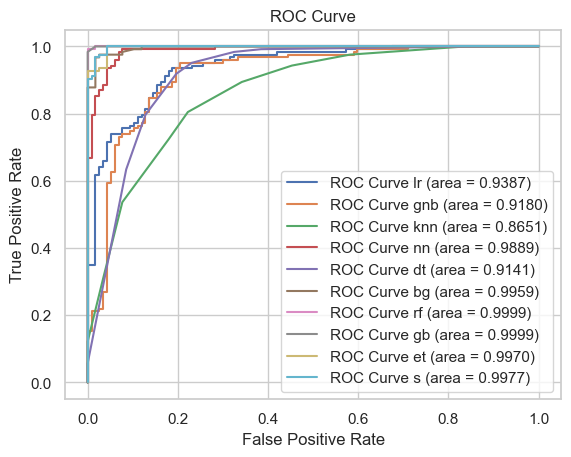

In [218]:
# models already fitted to the training dataset
lr_fitted = LogisticRegression(random_state = 5).fit(x_train, y_train)
gnb_fitted = GaussianNB(var_smoothing = 0.001).fit(x_train, y_train)
knn_fitted = KNeighborsClassifier(algorithm = 'brute', metric = 'minkowski', n_neighbors = 9, p = 1, weights = 'uniform').fit(x_train[upd_metric_features], y_train)
nn_fitted = MLPClassifier(max_iter = 1000, random_state = 5, activation = 'relu', alpha = 1e-05, batch_size = 200, hidden_layer_sizes = (16, 16), learning_rate = 'adaptive', learning_rate_init = 0.01, solver = 'adam').fit(x_train, y_train)
dt_fitted = DecisionTreeClassifier(random_state = 5, ccp_alpha = 0.008771929824561401).fit(x_train, y_train)
bg_fitted = BaggingClassifier(random_state = 5, base_estimator = DecisionTreeClassifier(random_state = 5), bootstrap = False, bootstrap_features = False, max_features = 0.8, max_samples = 1.0, n_estimators = 100).fit(x_train, y_train)
rf_fitted = RandomForestClassifier(random_state = 5, bootstrap = False, max_depth = 15, max_features = 'sqrt', min_samples_split = 5, n_estimators = 200).fit(x_train, y_train)
gb_fitted = GradientBoostingClassifier(random_state = 5, learning_rate = 0.01, loss = 'exponential', max_depth = 20, max_features = 'sqrt', n_estimators = 40).fit(x_train, y_train)
et_fitted = ExtraTreesClassifier(random_state = 5, n_jobs = -1, bootstrap = False, criterion = 'entropy', max_depth = 10, max_features = None, min_samples_split = 5, n_estimators = 80).fit(x_train, y_train)
s_fitted = StackingClassifier(estimators = estimators6, final_estimator = LogisticRegression(random_state = 5), stack_method = 'predict_proba',  n_jobs = -1, cv = skf).fit(x_train, y_train)

# obtaining the probability estimates for the validation dataset
prob_lr_fitted = lr_fitted.predict_proba(x_val)
prob_gnb_fitted = gnb_fitted.predict_proba(x_val)
prob_knn_fitted = knn_fitted.predict_proba(x_val[upd_metric_features])
prob_nn_fitted = nn_fitted.predict_proba(x_val)
prob_dt_fitted = dt_fitted.predict_proba(x_val)
prob_bg_fitted = bg_fitted.predict_proba(x_val)
prob_rf_fitted = rf_fitted.predict_proba(x_val)
prob_gb_fitted = gb_fitted.predict_proba(x_val)
prob_et_fitted = et_fitted.predict_proba(x_val)
prob_s_fitted = s_fitted.predict_proba(x_val)

# creating the roc curve objects for every model (false positive rates and true positive rates)
fpr_lr_fitted, tpr_lr_fitted, thresholds_lr_fitted = roc_curve(y_val, prob_lr_fitted[:, 1])
fpr_gnb_fitted, tpr_gnb_fitted, thresholds_gnb_fitted = roc_curve(y_val, prob_gnb_fitted[:, 1])
fpr_knn_fitted, tpr_knn_fitted, thresholds_knn_fitted = roc_curve(y_val, prob_knn_fitted[:, 1])
fpr_nn_fitted, tpr_nn_fitted, thresholds_nn_fitted = roc_curve(y_val, prob_nn_fitted[:, 1])
fpr_dt_fitted, tpr_dt_fitted, thresholds_dt_fitted = roc_curve(y_val, prob_dt_fitted[:, 1])
fpr_bg_fitted, tpr_bg_fitted, thresholds_bg_fitted = roc_curve(y_val, prob_bg_fitted[:, 1])
fpr_rf_fitted, tpr_rf_fitted, thresholds_rf_fitted = roc_curve(y_val, prob_rf_fitted[:, 1])
fpr_gb_fitted, tpr_gb_fitted, thresholds_gb_fitted = roc_curve(y_val, prob_gb_fitted[:, 1])
fpr_et_fitted, tpr_et_fitted, thresholds_et_fitted = roc_curve(y_val, prob_et_fitted[:, 1])
fpr_s_fitted, tpr_s_fitted, thresholds_s_fitted = roc_curve(y_val, prob_s_fitted[:, 1])

# calculating the area under the curve for every model
roc_auc_lr_fitted = auc(fpr_lr_fitted, tpr_lr_fitted)
roc_auc_gnb_fitted = auc(fpr_gnb_fitted, tpr_gnb_fitted)
roc_auc_knn_fitted = auc(fpr_knn_fitted, tpr_knn_fitted)
roc_auc_nn_fitted = auc(fpr_nn_fitted, tpr_nn_fitted)
roc_auc_dt_fitted = auc(fpr_dt_fitted, tpr_dt_fitted)
roc_auc_bg_fitted = auc(fpr_bg_fitted, tpr_bg_fitted)
roc_auc_rf_fitted = auc(fpr_rf_fitted, tpr_rf_fitted)
roc_auc_gb_fitted = auc(fpr_gb_fitted, tpr_gb_fitted)
roc_auc_et_fitted = auc(fpr_et_fitted, tpr_et_fitted)
roc_auc_s_fitted = auc(fpr_s_fitted, tpr_s_fitted)

# plotting the ROC curves in the same plot
plt.figure()
plt.plot(fpr_lr_fitted, tpr_lr_fitted, label = 'ROC Curve lr (area = %0.4f)' % roc_auc_lr_fitted)
plt.plot(fpr_gnb_fitted, tpr_gnb_fitted, label = 'ROC Curve gnb (area = %0.4f)' % roc_auc_gnb_fitted)
plt.plot(fpr_knn_fitted, tpr_knn_fitted, label = 'ROC Curve knn (area = %0.4f)' % roc_auc_knn_fitted)
plt.plot(fpr_nn_fitted, tpr_nn_fitted, label = 'ROC Curve nn (area = %0.4f)' % roc_auc_nn_fitted)
plt.plot(fpr_dt_fitted, tpr_dt_fitted, label = 'ROC Curve dt (area = %0.4f)' % roc_auc_dt_fitted)
plt.plot(fpr_bg_fitted, tpr_bg_fitted, label = 'ROC Curve bg (area = %0.4f)' % roc_auc_bg_fitted)
plt.plot(fpr_rf_fitted, tpr_rf_fitted, label = 'ROC Curve rf (area = %0.4f)' % roc_auc_rf_fitted)
plt.plot(fpr_gb_fitted, tpr_gb_fitted, label = 'ROC Curve gb (area = %0.4f)' % roc_auc_gb_fitted)
plt.plot(fpr_et_fitted, tpr_et_fitted, label = 'ROC Curve et (area = %0.4f)' % roc_auc_et_fitted)
plt.plot(fpr_s_fitted, tpr_s_fitted, label = 'ROC Curve s (area = %0.4f)' % roc_auc_s_fitted)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

So, as we can see the model with the higher AUC is **GradientBoosting**. The AUC is 1 meaning that the probability that this model will assign a higher rank to a randomly selected positive instance than to a randomly selected negative instance is 1. For this model, we can plot the precision-recall curve, that plots precision against recall for different classification thresholds. Precision is the proportion of predicted positive instances that are actually positive, while recall is the proportion of actual positive instances that are correctly classified as positive. Also, we can find what is the best threshold to use in order to maximize the f1-score. 

Best threshold=0.504289, f1-score=0.992


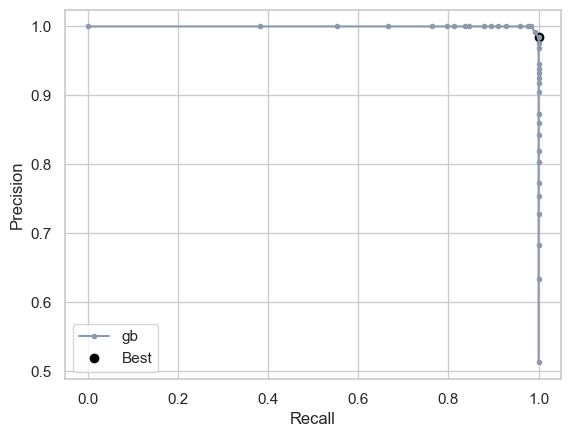

In [220]:
# getting the right metrics
precision, recall, thresholds = precision_recall_curve(y_val, prob_gb_fitted[:, 1])

# calculating f1-score
fscore = (2 * precision * recall) / (precision + recall) # list for the f1 score for each possible threeshold
# locate the index of the largest f1-score
ix = np.argmax(fscore)
print('Best threshold=%f, f1-score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker = '.', label = 'gb', color = '#8d99ae')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'black', label = 'Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

As we can see, the best threshold to decide whether our model will consider an observation to have a target value of 1 or a target value of 0 is 0.504289 (usually the threshold used by the models is 0.5). We can compare the f1-scores for each threshold.

Knowing that the f1-score measures the harmonic mean of precision and recall (tending towards the smaller values, so it can be less sensitive to large outliers than the arithmetic mean) (*Fundamentals of Machine Learning for Predictive Data Analytics*) we can also calculate other measures to evaluate the performance of our model, like precision, recall, accuracy, etc. However, "these measures place less emphasis on the performance of the model on the negative target level" (*Fundamentals of Machine Learning for Predictive Data Analytics*), which is good in this case, as the prediction that a patient has the Smith parasite is more improtant than the prediction that a patient does not.

<a id = "best-model"></a>

### 6.3. Best model

After comparing the performance of out algorithms, as seen before, and after pondering the specific characteristics of the data and the goals of the model, we decided that the best model found was **GradientBoosting**. We can check its metrics for the training and for the validation split that we made to plot the ROC curve.

In [223]:
# defining a function to show the metrics of our models

def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train, digits = 4))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val, digits = 4))
    print(confusion_matrix(y_val, pred_val))

In [224]:
metrics(y_train, gb_fitted.predict(x_train), y_val, gb_fitted.predict(x_val))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       272
           1     1.0000    1.0000    1.0000       288

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

[[272   0]
 [  0 288]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

Here we can see the confusion matrices for the training dataset and for the validation dataset, and also the other metrics that can be used, like accuracy, precision and recall. 

<a id = "results-submission"></a>

### Results submission

In order to submit our predictions to Kaggle, we must fit the model to our entire training dataset (since we already used validation to assess the performance).

In the test dataset we must apply the same preprocessing steps we applied to the training dataset (creating new features, replacing the incoherences in the `Region` variable, dropping the variables that were not used, scaling the metric features, and encoding the non-metric features). 

The best model is: `GradientBoostingClassifier(random_state = 5, learning_rate = 0.01, loss = 'exponential', max_depth = 20, max_features = 'sqrt', n_estimators = 40)`

In [225]:
# creating copies of the training dataset

target_final = target.copy()
data_final = data.copy()

In [226]:
# creating the features we added also in the test dataset
test = creating_new_features(test)

# replacing the incoherences in Region also in the test dataset
test = replace_region(test)

# updating our test dataset to only contain the features we will use in the models
test.drop(metric_features_todrop + non_metric_features_todrop, axis = 1, inplace = True)

In [227]:
# scaling the data using the function created above, making sure that we only use the training information into the test
# we scale using the minimum and the maximum values from the training dataset and not from the test dataset
data_final, test = train_val_minmax_scaler(data_final, test, upd_metric_features)

# encoding the test dataset using the functions created above
test, upd_encoded_categorical_features = ohc(test, upd_categorical_features)
test = oe(test, upd_ordinal_features)

In [228]:
# encoding the training with the one hot encoder and the ordinal features with the ordinal encoding

data_final, upd_encoded_categorical_features = ohc(data_final, upd_categorical_features)
data_final = oe(data_final, upd_ordinal_features)

In [229]:
# checking if the two datasets have the same number of columns (features)

print(data_final.shape)
print(test.shape)

(800, 16)
(225, 16)


In [230]:
# seeing some rows of the data to check if everything is ok

data_final.head()

Height  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                              
1167       0.137931          0.520548        0.245283       0.724138   
1805       0.758621          0.228311        0.452830       0.310345   
1557       0.379310          0.219178        0.264151       0.896552   
1658       1.000000          0.417808        0.292453       0.448276   
1544       1.000000          0.335616        0.292453       0.620690   

           Physical_Health       BMI  Checkup_Less than three months  \
PatientID                                                              
1167              0.066667  0.830206                             0.0   
1805              0.000000  0.945490                             0.0   
1557              0.000000  0.679802                             0.0   
1658              0.266667  0.258296                             0.0   
1544              0.066667  0.070444                             0.0   

           Checkup_More than 3 years  Checkup_Not sure  Exercise_Yes  \
PatientID                                                              
1167                             1.0               0.0           1.0   
1805                             0.0               1.0           1.0   
1557                             1.0               0.0           0.0   
1658                             0.0               1.0           1.0   
1544                             1.0               0.0           0.0   

           Gender_Male  \
PatientID                
1167               0.0   
1805               1.0   
1557               1.0   
1658               1.0   
1544               1.0   

           Diabetes_I don't have diabetes, but I have direct family members who have diabetes.  \
PatientID                                                                                        
1167                                                     0.0                                     
1805                                                     0.0                                     
1557                                                     0.0                                     
1658                                                     0.0                                     
1544                                                     0.0                                     

           Diabetes_I have/had pregnancy diabetes or borderline diabetes  \
PatientID                                                                  
1167                                                     0.0               
1805                                                     0.0               
1557                                                     0.0               
1658                                                     1.0               
1544                                                     1.0               

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1167                                                     1.0           
1805                                                     1.0           
1557                                                     1.0           
1658                                                     0.0           
1544                                                     0.0           

           Fruit_Habit  Drinking_Habit  
PatientID                               
1167               0.0             2.0  
1805               0.0             1.0  
1557               0.0             1.0  
1658               0.0             2.0  
1544               1.0             1.0

In [231]:
# seeing some rows of the test to check if everything is ok

test.head()

Height  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                              
1343       0.724138          0.166667        0.735849       0.689655   
1727       0.689655          0.216895        0.339623       0.724138   
1828       0.689655          0.244292        0.339623       0.827586   
1155       0.793103          0.417808        0.132075       0.655172   
1020       0.724138          0.134703        0.433962       0.655172   

           Physical_Health       BMI  Checkup_Less than three months  \
PatientID                                                              
1343              0.066667  0.765845                             0.0   
1727              0.000000  0.789977                             0.0   
1828              0.033333  0.737941                             0.0   
1155              0.000000  0.894723                             0.0   
1020              0.466667  0.148648                             0.0   

           Checkup_More than 3 years  Checkup_Not sure  Exercise_Yes  \
PatientID                                                              
1343                             0.0               1.0           0.0   
1727                             0.0               1.0           0.0   
1828                             1.0               0.0           1.0   
1155                             0.0               1.0           0.0   
1020                             1.0               0.0           0.0   

           Gender_Male  \
PatientID                
1343               1.0   
1727               1.0   
1828               1.0   
1155               1.0   
1020               1.0   

           Diabetes_I don't have diabetes, but I have direct family members who have diabetes.  \
PatientID                                                                                        
1343                                                     0.0                                     
1727                                                     0.0                                     
1828                                                     0.0                                     
1155                                                     0.0                                     
1020                                                     0.0                                     

           Diabetes_I have/had pregnancy diabetes or borderline diabetes  \
PatientID                                                                  
1343                                                     1.0               
1727                                                     0.0               
1828                                                     1.0               
1155                                                     0.0               
1020                                                     1.0               

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1343                                                     0.0           
1727                                                     0.0           
1828                                                     0.0           
1155                                                     0.0           
1020                                                     0.0           

           Fruit_Habit  Drinking_Habit  
PatientID                               
1343               0.0             2.0  
1727               0.0             1.0  
1828               0.0             2.0  
1155               0.0             2.0  
1020               0.0             1.0

In [232]:
# creating and fitting the best model to the training data

best_model_fitted = GradientBoostingClassifier(random_state = 5, learning_rate = 0.01, loss = 'exponential', max_depth = 20, max_features = 'sqrt', n_estimators = 40).fit(data_final, target_final)

In [233]:
# prediction using the best model
test['Disease'] = best_model_fitted.predict(test)

# seeing some rows of the test to check if everything is ok
test.head()

Height  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                              
1343       0.724138          0.166667        0.735849       0.689655   
1727       0.689655          0.216895        0.339623       0.724138   
1828       0.689655          0.244292        0.339623       0.827586   
1155       0.793103          0.417808        0.132075       0.655172   
1020       0.724138          0.134703        0.433962       0.655172   

           Physical_Health       BMI  Checkup_Less than three months  \
PatientID                                                              
1343              0.066667  0.765845                             0.0   
1727              0.000000  0.789977                             0.0   
1828              0.033333  0.737941                             0.0   
1155              0.000000  0.894723                             0.0   
1020              0.466667  0.148648                             0.0   

           Checkup_More than 3 years  Checkup_Not sure  Exercise_Yes  \
PatientID                                                              
1343                             0.0               1.0           0.0   
1727                             0.0               1.0           0.0   
1828                             1.0               0.0           1.0   
1155                             0.0               1.0           0.0   
1020                             1.0               0.0           0.0   

           Gender_Male  \
PatientID                
1343               1.0   
1727               1.0   
1828               1.0   
1155               1.0   
1020               1.0   

           Diabetes_I don't have diabetes, but I have direct family members who have diabetes.  \
PatientID                                                                                        
1343                                                     0.0                                     
1727                                                     0.0                                     
1828                                                     0.0                                     
1155                                                     0.0                                     
1020                                                     0.0                                     

           Diabetes_I have/had pregnancy diabetes or borderline diabetes  \
PatientID                                                                  
1343                                                     1.0               
1727                                                     0.0               
1828                                                     1.0               
1155                                                     0.0               
1020                                                     1.0               

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1343                                                     0.0           
1727                                                     0.0           
1828                                                     0.0           
1155                                                     0.0           
1020                                                     0.0           

           Fruit_Habit  Drinking_Habit  Disease  
PatientID                                        
1343               0.0             2.0        1  
1727               0.0             1.0        1  
1828               0.0             2.0        1  
1155               0.0             2.0        1  
1020               0.0             1.0        0

In [234]:
# checking how many patients were predicted to have the disease in the test dataset

test['Disease'].value_counts()

1    115
0    110
Name: Disease, dtype: int64

In [235]:
# assigning the column of the prediction to a new object called sample_submission

sample_submission = test['Disease']
sample_submission.head()

PatientID
1343    1
1727    1
1828    1
1155    1
1020    0
Name: Disease, dtype: int64

In [236]:
# exporting the predictions to a csv file

sample_submission.to_csv(r'./submissions/subfinal.csv', index = True, sep = ',')